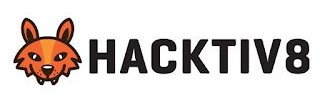

# Final Project 2 Logistic Regression dan Support Vector Machine

# Tim - Project Kelompok 6



    Anggota :

    Ahmad Fadillah (PYTN-KS17-06)
    Felic Wicent (PYTN-KS17-025)
    Haniefa Aulia Rahma (PYTN-KS17-01)

    Instructor : Chamdan L Abdulbaaqiy
    Project : Logistic Regression dan Support Vector Machine pada dataset Rain in Australia
    Batch : 5


# A. Perkenalan

## A.1 Latar Belakang

Cuaca adalah faktor penting dalam kehidupan sehari-hari kami dan memiliki dampak yang signifikan pada berbagai aspek. Dengan prediksi cuaca dalam kehidupan sehari-hari akan berdampak pada berbagai keputusan dan aktivitas. Melalui dataset "weatherAUS.csv" yang menyediakan informasi cuaca harian di berbagai lokasi di Australia, termasuk atribut "RainTomorrow" yang menunjukkan apakah akan hujan besok. Kemampuan untuk memprediksi hujan besok memiliki signifikansi dalam banyak konteks, seperti perencanaan luar ruangan, pertanian, dan manajemen sumber daya alam.

Salah satu pendekatan yang umum digunakan dalam analisis data cuaca adalah regresi logistik (logistic regression), merupakan teknik machine learning yang dapat memodelkan hubungan antara atribut-atribut cuaca dan probabilitas hujan besok. Dengan memahami faktor-faktor yang berkontribusi pada hujan besok, kami dapat meningkatkan pemahaman kami tentang cuaca dan memberikan informasi berharga bagi individu dan organisasi.

Proyek ini bertujuan untuk menerapkan regresi logistik pada dataset ini, memproses data dengan mengatasi masalah data yang hilang, outlier, dan normalisasi, dan mengukur kinerja model. Hasil dari analisis ini akan memberikan pemahaman yang lebih baik tentang sejauh mana prediksi cuaca dapat digunakan untuk memberikan informasi berharga dalam pengambilan keputusan sehari-hari. Dengan menggunakan teknik machine learning seperti Logistic Regression dan SVM, kami dapat lebih memahami dan memanfaatkan data cuaca untuk tujuan prediksi cuaca yang lebih akurat dan manajemen risiko cuaca yang lebih baik.

## A.2 Dataset

Final project ini menggunakan machine learnig Logistic Regression dan Support Vector Machine (SVM), Dataset yang digunakan berasal dari 'kaggle'. Dalam dataset yang digunakan dengan memiliki entitias sebanyak 145460 dan 23 attributes. Adapun tujuannya untuk melakukan classification 

## A.3 Informasi Atribute Dataset

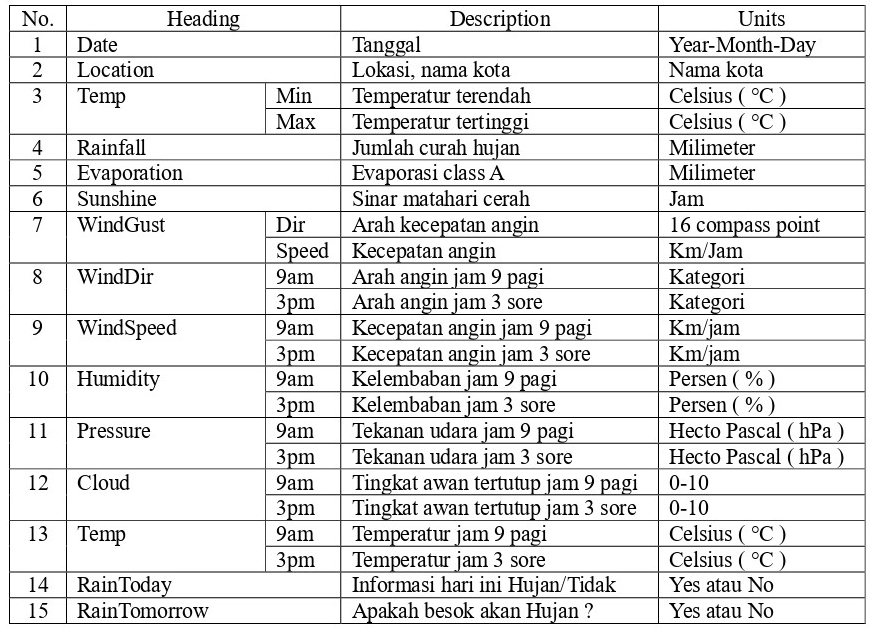

1. **Date**: Tanggal hari itu
2. **Location**: Lokasi, nama kota di Australia
3. **MinTemp**: Temperatur terendah hari itu dalam celcius
4. **MaxTemp**: Temperatur tertinggi hari itu dalam celcius
5. **Rainfall**: Jumlah curah hujan hari itu dalam mm
6. **Evaporation**: Jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. **Sunshine**: Jumlah jam hari itu cerah dengan cahaya matahari
8. **WindGustDir**: Arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. **WindGustSpeed**: Kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. **WindDir9am**: Arah angin jam 9 pagi
11. **WindDir3pm**: Arah angin jam 3 sore
12. **WindSpeed9am**: Kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. **WindSpeed3pm**: Kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. **Humidity9am**: Humiditas jam 9 pagi dalam persen
15. **Humidity3pm**: Humiditas jam 3 sore dalam persen
16. **Pressure9am**: Tekanan udara jam 9 pagi dalam hpa
17. **Pressure3pm**: Tekanan udara jam 3 sore dalam hpa
18. **Cloud9am**: Persentase langit yang tertutup awan jam 9 pagi. Dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. **Cloud3pm**: Persentase langit yang tertutup awan jam 3 sore
20. **Temp9am**: Temperatur jam 9 pagi dalam celcius
21. **Temp3pm**: Temperatur jam 3 sore dalam celcius
22. **RainToday**: Apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai 0
23. **RainTomorrow**: Variable yang mau diprediksi, apakah akan hujan besok.


## A.4 Objectif

Adapun Objektif yang ingin dicapai:
1. Memprediksi hujan besok secara akurat berdasarkan data cuaca harian.
2. Mengidentifikasi faktor-faktor kunci yang memengaruhi prediksi hujan besok.
3. Menilai kinerja berbagai model machine learning, termasuk Logistic Regression dan Support Vector Machine (SVM), dalam prediksi cuaca.
4. Menyoroti dampak positif dari prediksi cuaca yang akurat dalam berbagai konteks.
5. Maksimalkan manfaat data cuaca untuk pengambilan keputusan yang lebih baik.

# B. Import Package

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import pickle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# C. Data Loading

In [2]:
# Membuka File dataset rideshare_kaggle.csv dengan Pandas

# df = pd.read_csv('weatherAUS.csv')
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
pd.set_option('display.max_columns', None)
df.reset_index(drop=True)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [3]:
# Cek jumlah baris dan kolom

row, col = df.shape
cek_baris_kolom = pd.DataFrame({'Jumlah Baris': [row], 'Jumlah Kolom': [col]})
cek_baris_kolom

Jumlah Baris  Jumlah Kolom
0        145460            23

# D. Data Cleaning

## D.1 Check dan Cleaning

In [4]:
# Cek nunique value pada attribute

cek_nunique = df.nunique()
cek_nunique = cek_nunique.to_frame(name='Jumlah')
cek_nunique.reset_index(inplace=True)
cek_nunique.rename(columns={'index': 'Kolom'}, inplace=True)
cek_nunique

Kolom  Jumlah
0            Date    3436
1        Location      49
2         MinTemp     389
3         MaxTemp     505
4        Rainfall     681
5     Evaporation     358
6        Sunshine     145
7     WindGustDir      16
8   WindGustSpeed      67
9      WindDir9am      16
10     WindDir3pm      16
11   WindSpeed9am      43
12   WindSpeed3pm      44
13    Humidity9am     101
14    Humidity3pm     101
15    Pressure9am     546
16    Pressure3pm     549
17       Cloud9am      10
18       Cloud3pm      10
19        Temp9am     441
20        Temp3pm     502
21      RainToday       2
22   RainTomorrow       2

In [5]:
# Cek jumlah Duplikat yang sama persis

df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

In [6]:
# Menyesuaikan Dtype Attribute

# Location hanya terdiri dari lokasi 49 nama unik
df['Location'] = df['Location'].astype('category')

# RainTomorrow dan RainToday hanya berisi Yes dan No dan dirubah menjadi Yes:1 dan No:0
df['RainTomorrow'] = (df['RainTomorrow'].replace(
    {'Yes': 1, 'No': 0})).astype('float')
df['RainToday'] = (df['RainToday'].replace(
    {'Yes': 1, 'No': 0})).astype('float')

# Date di rubah menjadi Datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Attribut RainTomorrow adalah target jadi harus bersih dari missing value

df.dropna(subset=['RainTomorrow'], inplace=True)

In [8]:
# Menghapus Date Location

df = df.drop(['Date', 'Location'], axis=1)

In [9]:
# CeK Jumlah Missing Value pada masing-masing attribute

cek_missing_value = df.isna().sum().reset_index()
cek_missing_value.columns = ['Attribute', 'Jumlah Missing Value']
cek_missing_value

Attribute  Jumlah Missing Value
0         MinTemp                   637
1         MaxTemp                   322
2        Rainfall                  1406
3     Evaporation                 60843
4        Sunshine                 67816
5     WindGustDir                  9330
6   WindGustSpeed                  9270
7      WindDir9am                 10013
8      WindDir3pm                  3778
9    WindSpeed9am                  1348
10   WindSpeed3pm                  2630
11    Humidity9am                  1774
12    Humidity3pm                  3610
13    Pressure9am                 14014
14    Pressure3pm                 13981
15       Cloud9am                 53657
16       Cloud3pm                 57094
17        Temp9am                   904
18        Temp3pm                  2726
19      RainToday                  1406
20   RainTomorrow                     0

## D.2 df_clear : Hapus semua missing value

### D.2.1 Hapus semua missing value

In [10]:
# Drop semua data pada Attribute yang bernilai NaN

df_clear = df.copy()
df_clear.dropna(inplace=True)
df_clear = df_clear.reset_index(drop=True)

In [11]:
# CeK Jumlah Missing Value pada masing-masing attribute

cek_missing_value = df_clear.isna().sum().reset_index()
cek_missing_value.columns = ['Attribute', 'Jumlah Missing Value']
cek_missing_value

Attribute  Jumlah Missing Value
0         MinTemp                     0
1         MaxTemp                     0
2        Rainfall                     0
3     Evaporation                     0
4        Sunshine                     0
5     WindGustDir                     0
6   WindGustSpeed                     0
7      WindDir9am                     0
8      WindDir3pm                     0
9    WindSpeed9am                     0
10   WindSpeed3pm                     0
11    Humidity9am                     0
12    Humidity3pm                     0
13    Pressure9am                     0
14    Pressure3pm                     0
15       Cloud9am                     0
16       Cloud3pm                     0
17        Temp9am                     0
18        Temp3pm                     0
19      RainToday                     0
20   RainTomorrow                     0

Dalam mengatasi missing value dalam dataset ini, kami memutuskan untuk menghapusnya dengan berbagai pertimbangan, yaitu dikarenakan beberapa atribut memiliki missing value dengan skala besar, sehingga apabila kami mencoba memperbaikinya maka menjadi tidak praktis. Lalu, kami mengutamakan atribut yang penting untuk analisis dan pemodelan, sehingga menghapus missing value pada atribut yang kritis akan memastikan hasil analisis tetap konsisten.

In [12]:
# Cek jumlah 1 dan 0 pada attribute target RainTommorow

df_clear['RainTomorrow'].value_counts().to_frame().reset_index()

RainTomorrow  count
0           0.0  43993
1           1.0  12427

## D.3 df_strategy : Mengubah nilai NaN dengan Median dan Modus

### D.3.1 Mengisi NaN attribut bertipe numeric dengan SimpleImputer Median

In [13]:
# Copy dulu df ke df_strategy

df_strategy = df.copy()
df_strategy.tail()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
145454      3.5     21.8       0.0          NaN       NaN           E   
145455      2.8     23.4       0.0          NaN       NaN           E   
145456      3.6     25.3       0.0          NaN       NaN         NNW   
145457      5.4     26.9       0.0          NaN       NaN           N   
145458      7.8     27.0       0.0          NaN       NaN          SE   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
145454           31.0        ESE          E          15.0          13.0   
145455           31.0         SE        ENE          13.0          11.0   
145456           22.0         SE          N          13.0           9.0   
145457           37.0         SE        WNW           9.0           9.0   
145458           28.0        SSE          N          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
145454         59.0         27.0       1024.7       1021.2       NaN   
145455         51.0         24.0       1024.6       1020.3       NaN   
145456         56.0         21.0       1023.5       1019.1       NaN   
145457         53.0         24.0       1021.0       1016.8       NaN   
145458         51.0         24.0       1019.4       1016.5       3.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
145454       NaN      9.4     20.9        0.0           0.0  
145455       NaN     10.1     22.4        0.0           0.0  
145456       NaN     10.9     24.5        0.0           0.0  
145457       NaN     12.5     26.1        0.0           0.0  
145458       2.0     15.1     26.0        0.0           0.0

In [14]:
# Mengisi attribut angka yang NaN dengan median

numeric_attribute = df_strategy.select_dtypes(include=['number']).columns

for attribute in numeric_attribute:
    df_strategy[attribute] = SimpleImputer(
        strategy='median').fit_transform(df_strategy[[attribute]])

In [15]:
# Cek hasil dtype angka yang NaN di isi dengan median

cek_missing_value = df_strategy.isna().sum().reset_index()
cek_missing_value.columns = ['Attribute', 'Jumlah Missing Value']
cek_missing_value

Attribute  Jumlah Missing Value
0         MinTemp                     0
1         MaxTemp                     0
2        Rainfall                     0
3     Evaporation                     0
4        Sunshine                     0
5     WindGustDir                  9330
6   WindGustSpeed                     0
7      WindDir9am                 10013
8      WindDir3pm                  3778
9    WindSpeed9am                     0
10   WindSpeed3pm                     0
11    Humidity9am                     0
12    Humidity3pm                     0
13    Pressure9am                     0
14    Pressure3pm                     0
15       Cloud9am                     0
16       Cloud3pm                     0
17        Temp9am                     0
18        Temp3pm                     0
19      RainToday                     0
20   RainTomorrow                     0

Kami mengisi nilai NaN pada atribut bertipe numerik dengan Median alasannya dikarenakan Median lebih stabil daripada Mean, tidak dipengaruhi oleh outlier, dan mempertahankan integritas data. Karena proyek ini untuk memprediksi cuaca, maka hal ini akan membantu menjaga konsistensi dan hasil yang lebih baik. Keputusan ini diambil untuk memastikan data yang bersih dan konsisten dalam proyek prediksi cuaca.

### D.3.2 Mengisi NaN attribut bertipe object dengan Modus

In [16]:
object_attribute = df_strategy.select_dtypes(include=['object']).columns


for col in object_attribute:
    mode_val = df_strategy[col].mode()[0]
    df_strategy[col].fillna(mode_val, inplace=True)

In [17]:
# Cek hasil dtype yang NaN di isi dengan Modus

cek_missing_value = df_strategy.isna().sum().reset_index()
cek_missing_value.columns = ['Attribute', 'Jumlah Missing Value']
cek_missing_value

Attribute  Jumlah Missing Value
0         MinTemp                     0
1         MaxTemp                     0
2        Rainfall                     0
3     Evaporation                     0
4        Sunshine                     0
5     WindGustDir                     0
6   WindGustSpeed                     0
7      WindDir9am                     0
8      WindDir3pm                     0
9    WindSpeed9am                     0
10   WindSpeed3pm                     0
11    Humidity9am                     0
12    Humidity3pm                     0
13    Pressure9am                     0
14    Pressure3pm                     0
15       Cloud9am                     0
16       Cloud3pm                     0
17        Temp9am                     0
18        Temp3pm                     0
19      RainToday                     0
20   RainTomorrow                     0

In [18]:
# Cek jumlah 1 dan 0 pada attribute target RainTommorow

df_clear['RainTomorrow'].value_counts().to_frame().reset_index()

RainTomorrow  count
0           0.0  43993
1           1.0  12427

Kami mengisi nilai NaN pada atribut bertipe objek dengan Modus alasannya dikarenakan Modus menggambarkan nilai yang paling sering muncul dalam data dan lebih cocok untuk atribut kategorikal. Karena proyek ini untuk memprediksi cuaca, maka mengisi nilai NaN dengan modus memungkinkan kami untuk mempertahankan informasi yang paling umum atau sering muncul dalam atribut, menjaga konsistensi data, dan meminimalkan potensi gangguan pada analisis. Keputusan ini diambil untuk memastikan data tetap informatif dan tidak terdistorsi oleh nilai yang hilang.

# E. Data Exploration

## E.1 df_clear

### E.1.1 Measure Central of Tendency

In [19]:
MCT_clear = df_clear.describe().T

MCT_clear.reset_index().rename(
    columns={'index': 'Attribute'})

Attribute    count         mean        std    min     25%     50%  \
0         MinTemp  56420.0    13.464770   6.416689   -6.7     8.6    13.2   
1         MaxTemp  56420.0    24.219206   6.970676    4.1    18.7    23.9   
2        Rainfall  56420.0     2.130397   7.014822    0.0     0.0     0.0   
3     Evaporation  56420.0     5.503135   3.696282    0.0     2.8     5.0   
4        Sunshine  56420.0     7.735626   3.758153    0.0     5.0     8.6   
5   WindGustSpeed  56420.0    40.877366  13.335232    9.0    31.0    39.0   
6    WindSpeed9am  56420.0    15.667228   8.317005    2.0     9.0    15.0   
7    WindSpeed3pm  56420.0    19.786778   8.510180    2.0    13.0    19.0   
8     Humidity9am  56420.0    65.874123  18.513289    0.0    55.0    67.0   
9     Humidity3pm  56420.0    49.601985  20.197040    0.0    35.0    50.0   
10    Pressure9am  56420.0  1017.239505   6.909357  980.5  1012.7  1017.2   
11    Pressure3pm  56420.0  1014.795580   6.870892  977.1  1010.1  1014.7   
12       Cloud9am  56420.0     4.241705   2.797162    0.0     1.0     5.0   
13       Cloud3pm  56420.0     4.326515   2.647251    0.0     2.0     5.0   
14        Temp9am  56420.0    18.204961   6.567991   -0.7    13.1    17.8   
15        Temp3pm  56420.0    22.710333   6.836543    3.7    17.4    22.4   
16      RainToday  56420.0     0.220879   0.414843    0.0     0.0     0.0   
17   RainTomorrow  56420.0     0.220259   0.414425    0.0     0.0     0.0   

       75%     max  
0     18.4    31.4  
1     29.7    48.1  
2      0.6   206.2  
3      7.4    81.2  
4     10.7    14.5  
5     48.0   124.0  
6     20.0    67.0  
7     26.0    76.0  
8     79.0   100.0  
9     63.0   100.0  
10  1021.8  1040.4  
11  1019.4  1038.9  
12     7.0     8.0  
13     7.0     9.0  
14    23.3    39.4  
15    27.9    46.1  
16     0.0     1.0  
17     0.0     1.0

### E.1.2 Measure of Spread

In [20]:
# Variance
variance_df = df_clear.select_dtypes(
    include=[np.number]).var(ddof=1).to_frame()
variance_df.rename(columns={0: 'Variance'}, inplace=True)

# Standard Deviation
std_deviation_df = df_clear.select_dtypes(
    include=[np.number]).std(ddof=1).to_frame()
std_deviation_df.rename(columns={0: 'Standard Deviation'}, inplace=True)

# Skewness
skewness_df = df_clear.select_dtypes(include=[np.number]).skew().to_frame()
skewness_df.rename(columns={0: 'Skewness'}, inplace=True)
skewness_df['Skewness Description'] = skewness_df['Skewness'].apply(
    lambda x: 'Distribusi Positif' if x > 0 else ('Distribusi Negatif' if x < 0 else 'Distribusi Simetrik'))

# Kurtosis
kurtosis_df = df_clear.select_dtypes(
    include=[np.number]).kurtosis().to_frame()
kurtosis_df.rename(columns={0: 'Kurtosis'}, inplace=True)
kurtosis_df['Kurtosis Description'] = kurtosis_df['Kurtosis'].apply(
    lambda x: 'Leptokurtik' if x > 0 else ('Platykurtik' if x < 0 else 'Mesokurtik'))

# Percentiles
percentile_values = df_clear.select_dtypes(
    include=[np.number]).quantile([0.25, 0.50, 0.75])
percentile_values.index = ['25%', '50%', '75%']
percentile_values = percentile_values.T
percentile_values['IQR'] = percentile_values['75%'] - percentile_values['25%']

# Ranges
range_df = df_clear.describe().loc[['min', 'max']].T
range_df.rename(columns={'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

# Menggabungkan semua hasil
Measure_of_Spread = pd.concat([variance_df, std_deviation_df,
                              skewness_df, kurtosis_df, percentile_values, range_df], axis=1)

# Tampilkan hasilnya
Measure_of_Spread.reset_index().rename(columns={'index': 'Attribute'})

Attribute    Variance  Standard Deviation  Skewness  \
0         MinTemp   41.173895            6.416689  0.052469   
1         MaxTemp   48.590329            6.970676  0.185014   
2        Rainfall   49.207731            7.014822  7.502521   
3     Evaporation   13.662503            3.696282  2.232267   
4        Sunshine   14.123716            3.758153 -0.551711   
5   WindGustSpeed  177.828400           13.335232  0.960215   
6    WindSpeed9am   69.172570            8.317005  0.933070   
7    WindSpeed3pm   72.423172            8.510180  0.596814   
8     Humidity9am  342.741878           18.513289 -0.489376   
9     Humidity3pm  407.920420           20.197040  0.005988   
10    Pressure9am   47.739211            6.909357 -0.064353   
11    Pressure3pm   47.209153            6.870892 -0.000580   
12       Cloud9am    7.824117            2.797162 -0.160677   
13       Cloud3pm    7.007939            2.647251 -0.191081   
14        Temp9am   43.138509            6.567991  0.111134   
15        Temp3pm   46.738322            6.836543  0.195421   
16      RainToday    0.172095            0.414843  1.345718   
17   RainTomorrow    0.171748            0.414425  1.350070   

   Skewness Description   Kurtosis Kurtosis Description     25%     50%  \
0    Distribusi Positif  -0.729012          Platykurtik     8.6    13.2   
1    Distribusi Positif  -0.680703          Platykurtik    18.7    23.9   
2    Distribusi Positif  95.335021          Leptokurtik     0.0     0.0   
3    Distribusi Positif  19.033470          Leptokurtik     2.8     5.0   
4    Distribusi Negatif  -0.765538          Platykurtik     5.0     8.6   
5    Distribusi Positif   1.547266          Leptokurtik    31.0    39.0   
6    Distribusi Positif   1.348454          Leptokurtik     9.0    15.0   
7    Distribusi Positif   0.543985          Leptokurtik    13.0    19.0   
8    Distribusi Negatif   0.120547          Leptokurtik    55.0    67.0   
9    Distribusi Positif  -0.445130          Platykurtik    35.0    50.0   
10   Distribusi Negatif   0.305808          Leptokurtik  1012.7  1017.2   
11   Distribusi Negatif   0.208340          Leptokurtik  1010.1  1014.7   
12   Distribusi Negatif  -1.556998          Platykurtik     1.0     5.0   
13   Distribusi Negatif  -1.470806          Platykurtik     2.0     5.0   
14   Distribusi Positif  -0.755153          Platykurtik    13.1    17.8   
15   Distribusi Positif  -0.613943          Platykurtik    17.4    22.4   
16   Distribusi Positif  -0.189049          Platykurtik     0.0     0.0   
17   Distribusi Positif  -0.177318          Platykurtik     0.0     0.0   

       75%   IQR  Minimum  Maximum  
0     18.4   9.8     -6.7     31.4  
1     29.7  11.0      4.1     48.1  
2      0.6   0.6      0.0    206.2  
3      7.4   4.6      0.0     81.2  
4     10.7   5.7      0.0     14.5  
5     48.0  17.0      9.0    124.0  
6     20.0  11.0      2.0     67.0  
7     26.0  13.0      2.0     76.0  
8     79.0  24.0      0.0    100.0  
9     63.0  28.0      0.0    100.0  
10  1021.8   9.1    980.5   1040.4  
11  1019.4   9.3    977.1   1038.9  
12     7.0   6.0      0.0      8.0  
13     7.0   5.0      0.0      9.0  
14    23.3  10.2     -0.7     39.4  
15    27.9  10.5      3.7     46.1  
16     0.0   0.0      0.0      1.0  
17     0.0   0.0      0.0      1.0

### E.1.3 Visualisasi Data

#### E.1.3.1 Pesebaran data

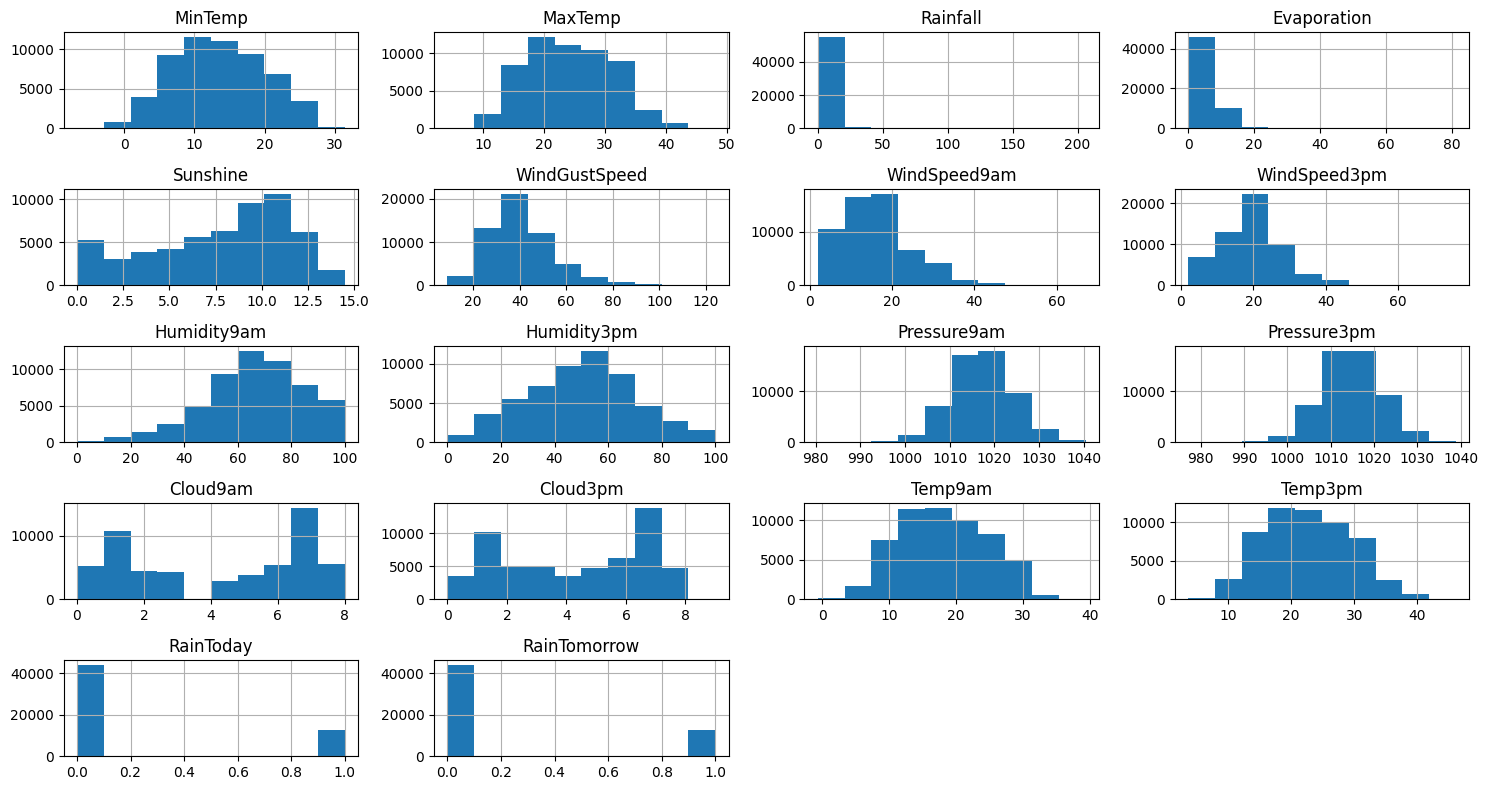

In [21]:
# Histogram

df_clear.hist(figsize=(15, 8))
plt.title('Pesebaran Data')
plt.tight_layout()
plt.show()

Histogram diatas menggambarkan persebaran data untuk setiap atribut numerik dalam dataset dengan missing value yang sudah dihapus (df_clear). Hal ini memvisualisasikan distribusi data untuk masing-masing atribut, memberikan gambaran tentang bagaimana data tersebar dalam rentang nilai tertentu. Dan juga dapat membantu kami memahami pola data, kecenderungan, serta melihat apakah data terdistribusi secara normal, positif, atau negatif, serta mengidentifikasi nilai ekstrem jika ada. Selain itu, dapat membantu kami dalam menganalisis keragaman dan dispersi data, yang penting dalam pemahaman karakteristik atribut sebelum proses analisis lebih lanjut.

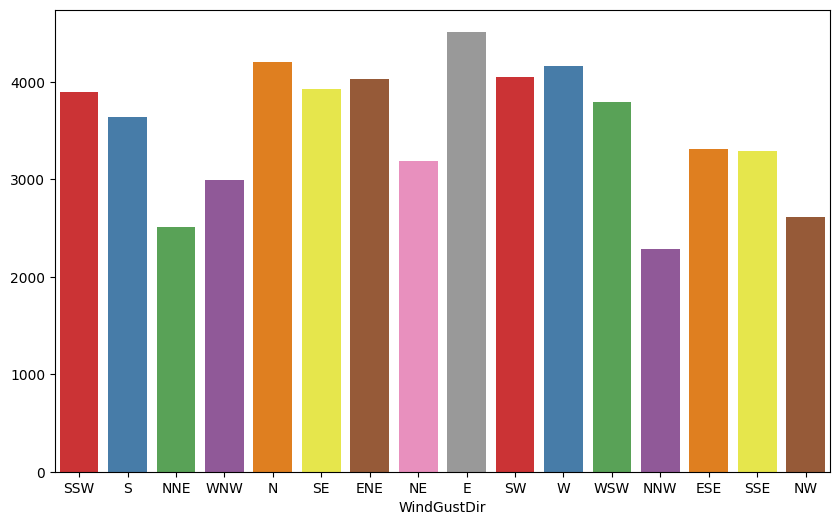

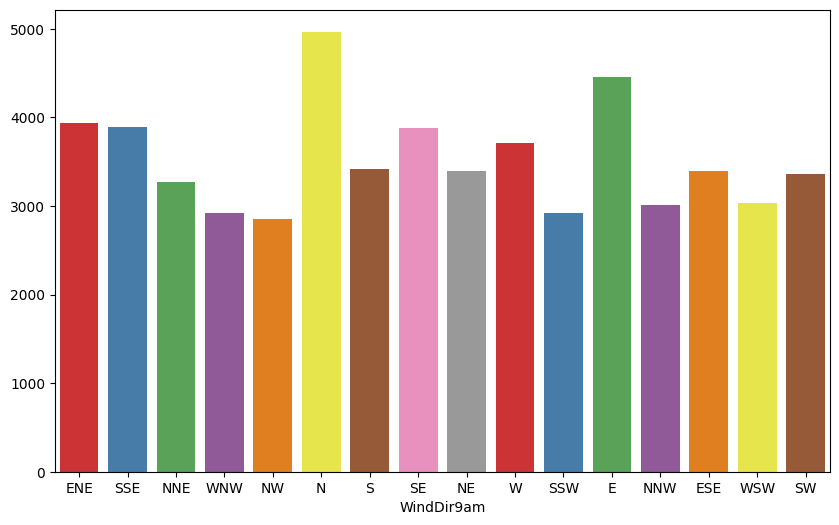

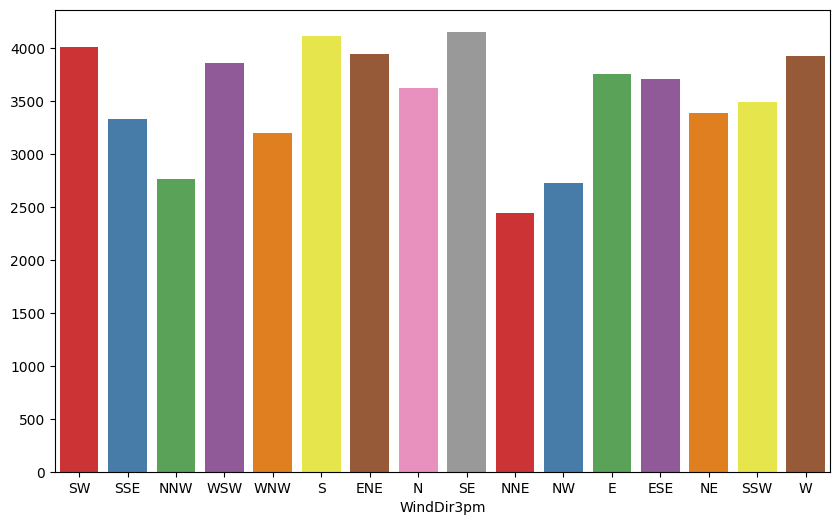

In [22]:
# Countplot untuk dtype object

for column in df_clear.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_clear, x=column, palette='Set1')
    plt.ylabel('')
    plt.show()

Countplot diatas untuk memvisualisasikan distribusi data dalam atribut-atribut bertipe objek berdasarkan dataset yang sudah dihapus missing value-nya (df_clear). Setiap countplot menggambarkan frekuensi munculnya nilai-nilai kategori dalam atribut tertentu, membantu kami dalam memahami pola data kategorikal, perbandingan frekuensi relatif antar kategori, serta mengidentifikasi kategori mayoritas dan minoritas dalam dataset, semuanya dalam format grafis yang informatif. Visualisasi ini memungkinkan kami untuk memiliki wawasan yang lebih baik tentang sebaran nilai dalam atribut objek, yang merupakan elemen penting dalam analisis data.

#### E.1.3.2 Check Outlier dengan Boxplot

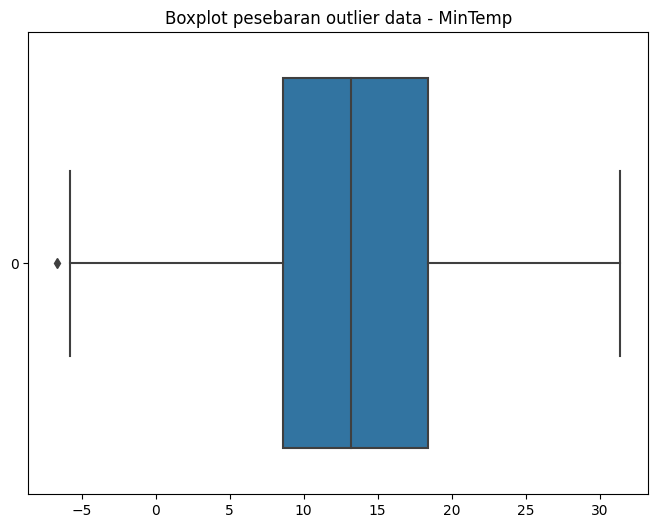

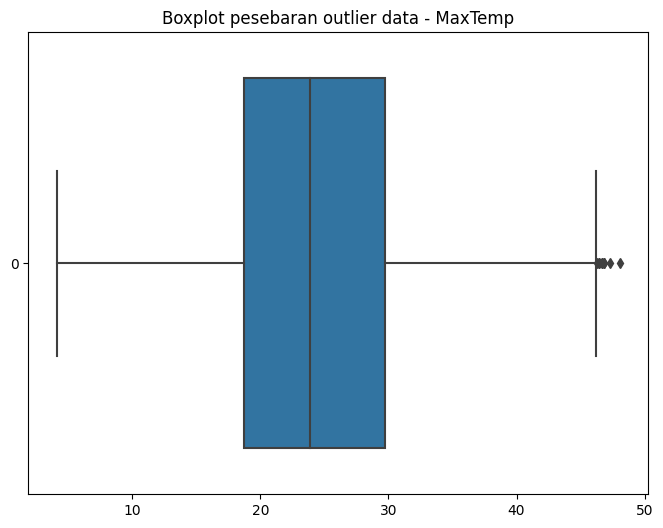

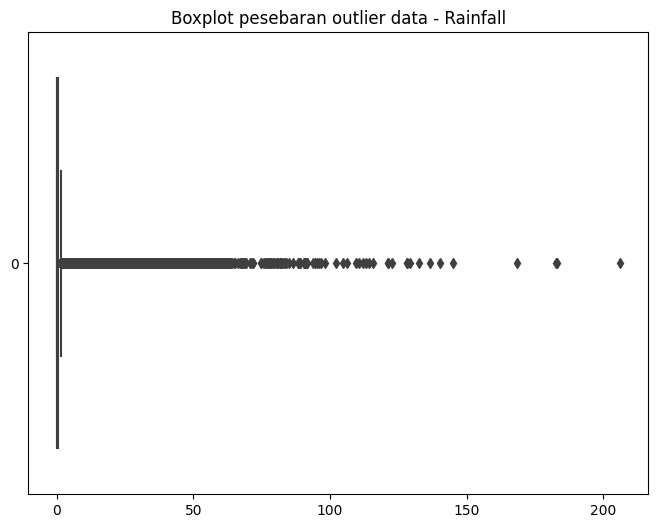

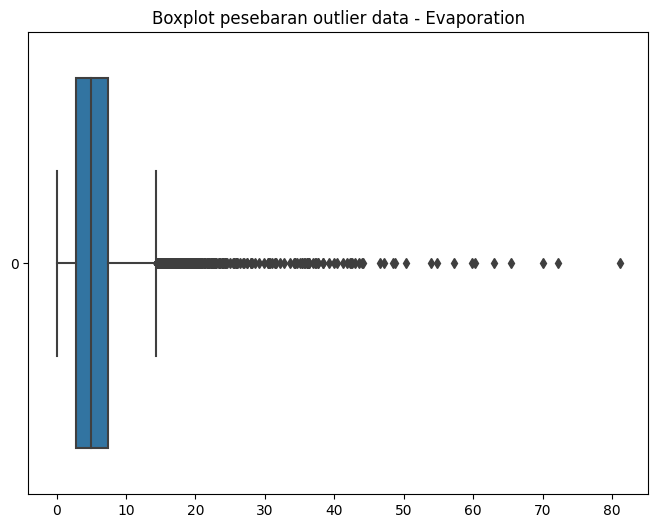

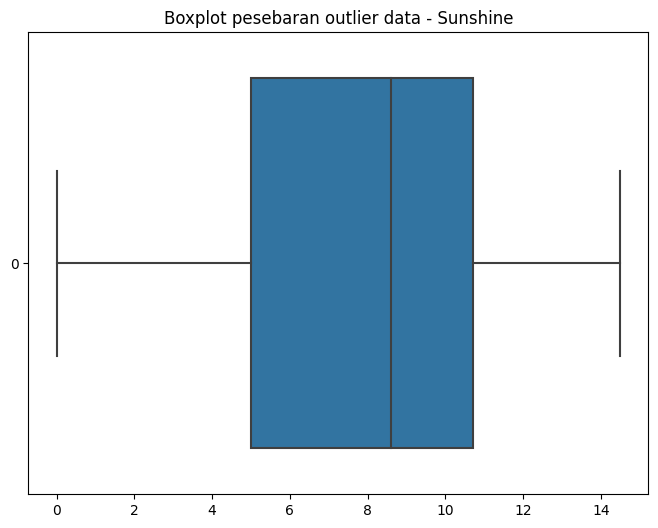

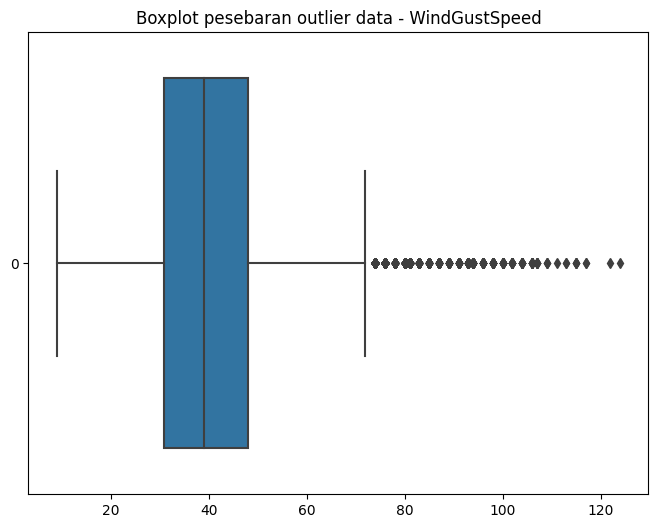

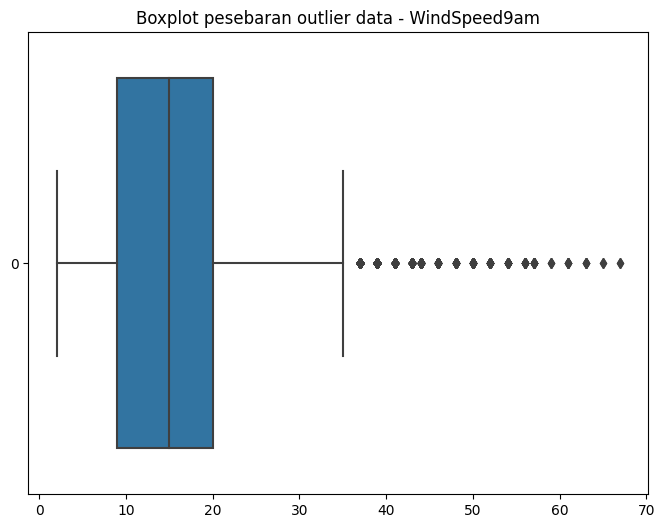

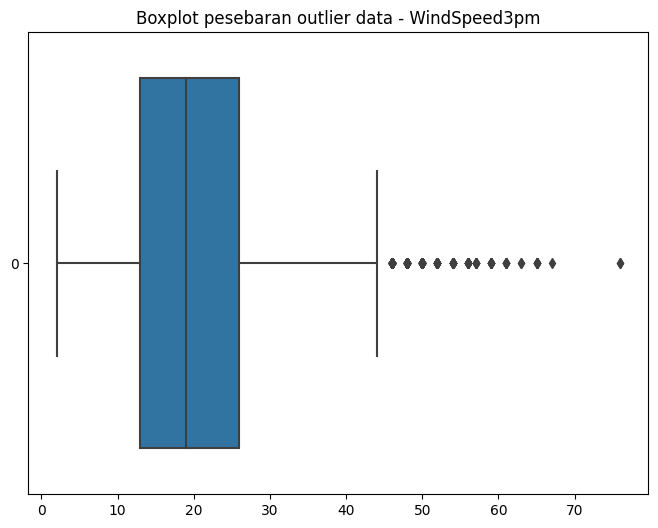

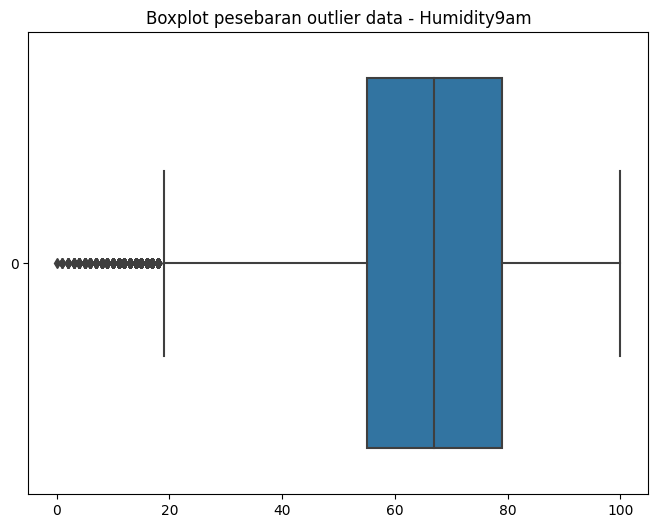

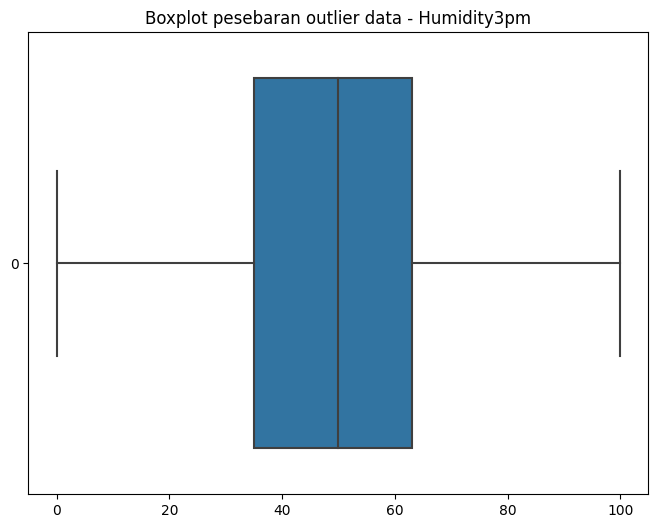

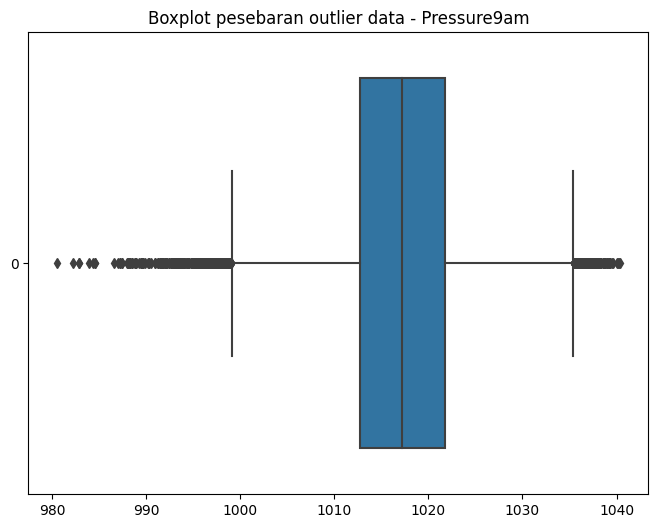

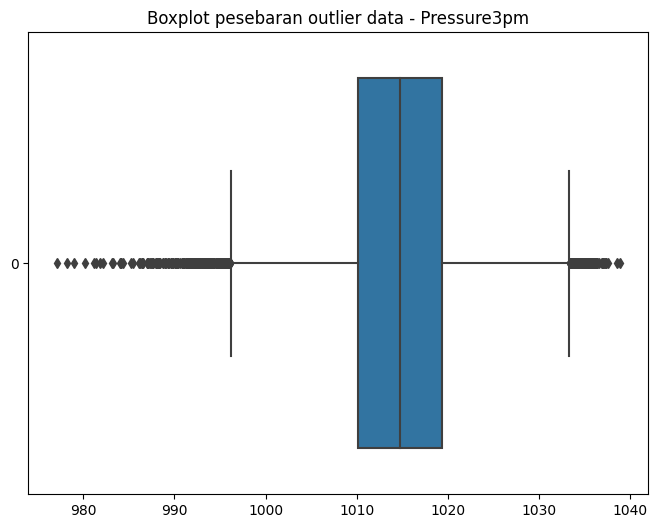

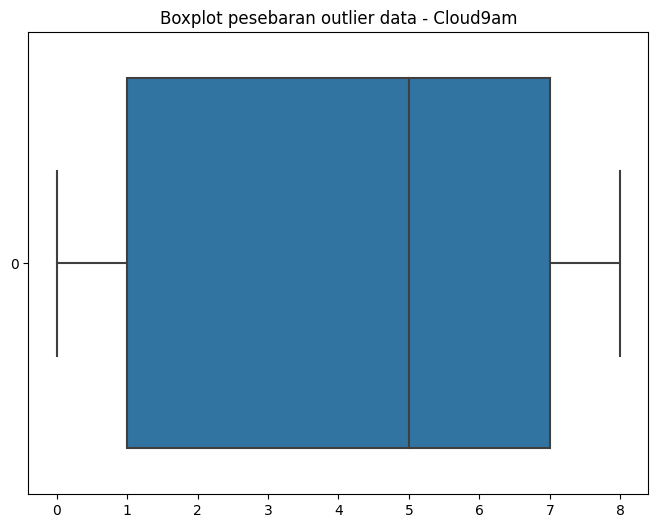

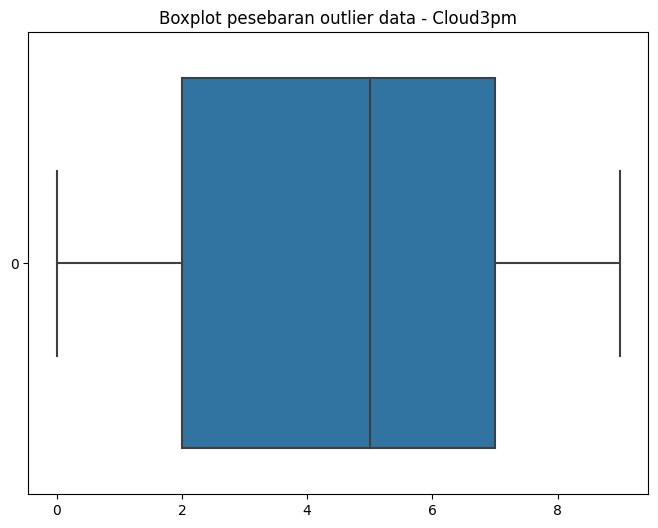

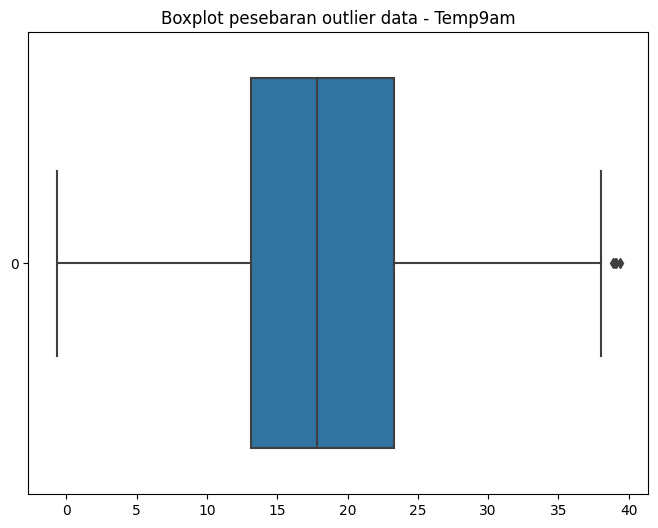

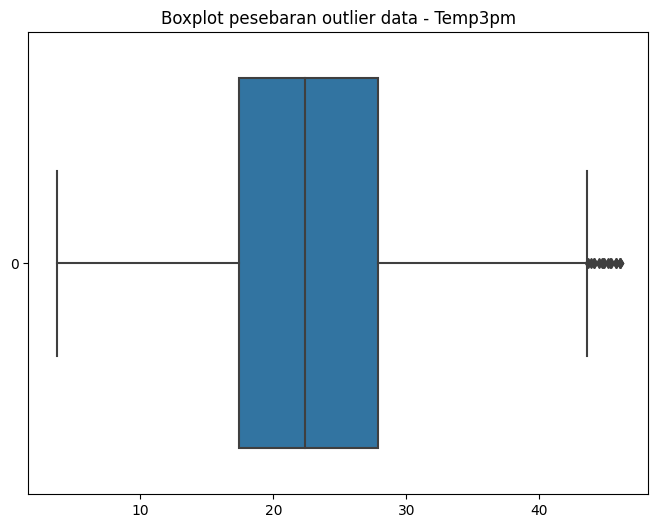

In [23]:
# Boxplot

temp_vis_attribute = df_clear.iloc[:, 0:-
                                   2].select_dtypes(include=['number']).columns

for column in temp_vis_attribute:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_clear[column], orient='h')
    plt.title(f'Boxplot pesebaran outlier data - {column}')
    plt.show()

Boxplot diatas untuk memvisualisasikan data dengan memeriksa keberadaan outlier dalam atribut-atribut numerik berdasarkan dataset yang missing value-nya sudah dihapus (df_clear). Setiap boxplot menggambarkan sebaran data dan menunjukkan adanya outlier jika ada nilai-nilai yang terletak jauh di luar batas whisker (garis tanda akhir dari kotak). Visualisasi ini membantu kami mengidentifikasi adanya nilai-nilai ekstrem atau tidak biasa dalam atribut numerik, untuk memahami sebaran data dan mengevaluasi potensi dampaknya pada analisis statistik dan pemodelan data.

#### E.1.3.3 Check visualisasi atribut target (RainTomorrow) dengan attribut lainnya

##### E.1.3.3.1 RainTomorrow vs atribut Object

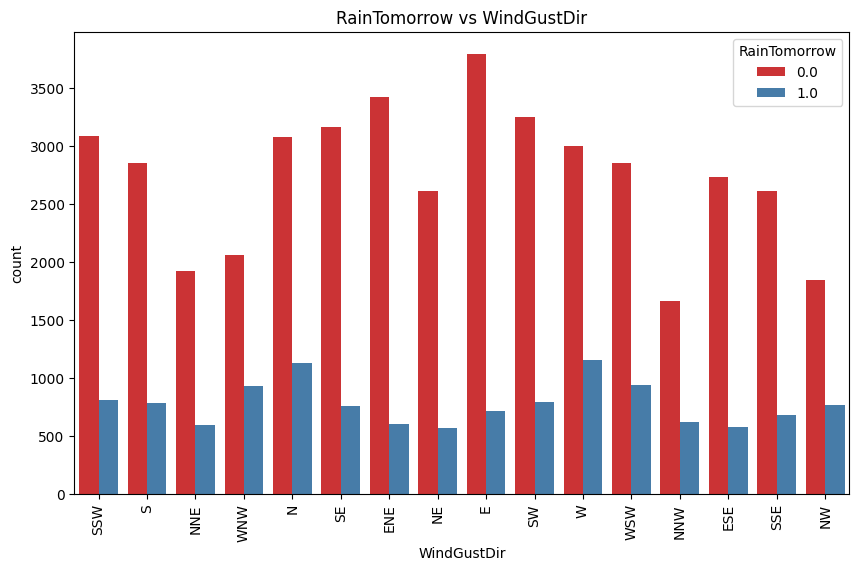

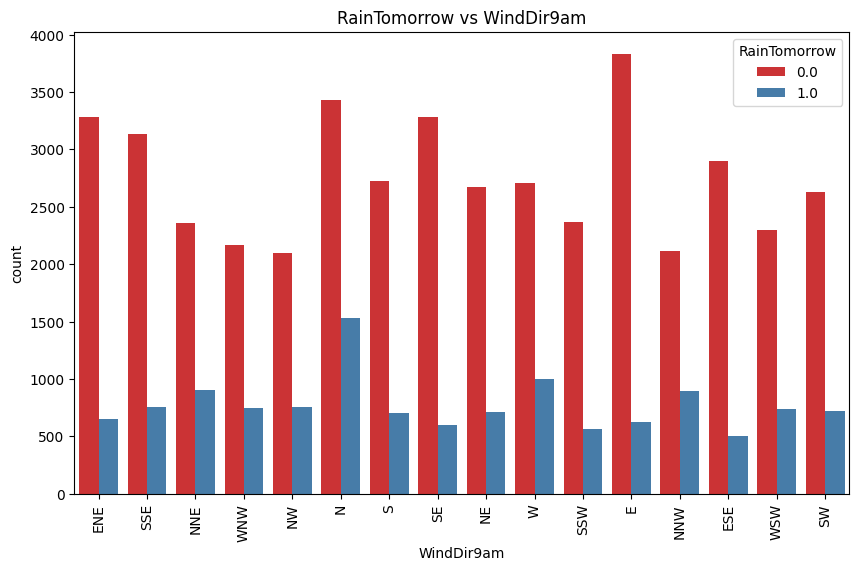

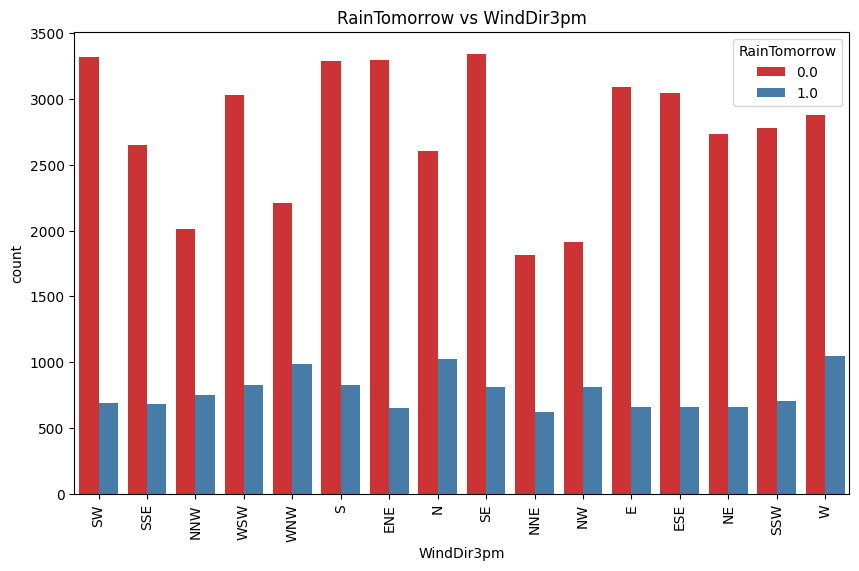

In [24]:
# Raintomorrow vs atribut object

categorical_columns = df_clear.select_dtypes(include=['object']).columns

for attribute in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_clear, x=attribute,
                  hue='RainTomorrow', palette='Set1')
    plt.title(f'RainTomorrow vs {attribute}')
    plt.xticks(rotation=90)
    plt.show()

Bar plot diatas untuk memvisualisasikan hubungan antara atribut target "RainTomorrow" dengan atribut-atribut kategorikal lainnya didalam df. Setiap plot bar menunjukkan seberapa sering hujan terjadi besok (dinyatakan sebagai "RainTomorrow" = Ya/biru) atau tidak (dinyatakan sebagai "no-RainTomorrow" = Tidak/merah) di setiap kategori atribut. Ini membantu kami memahami apakah ada hubungan yang jelas antara atribut-atribut tersebut dan kemungkinan hujan besok, yang dapat berguna dalam analisis dan pemahaman lebih lanjut tentang prediksi cuaca.

##### E.1.3.3.2 RainTomorrow vs atribut Numeric

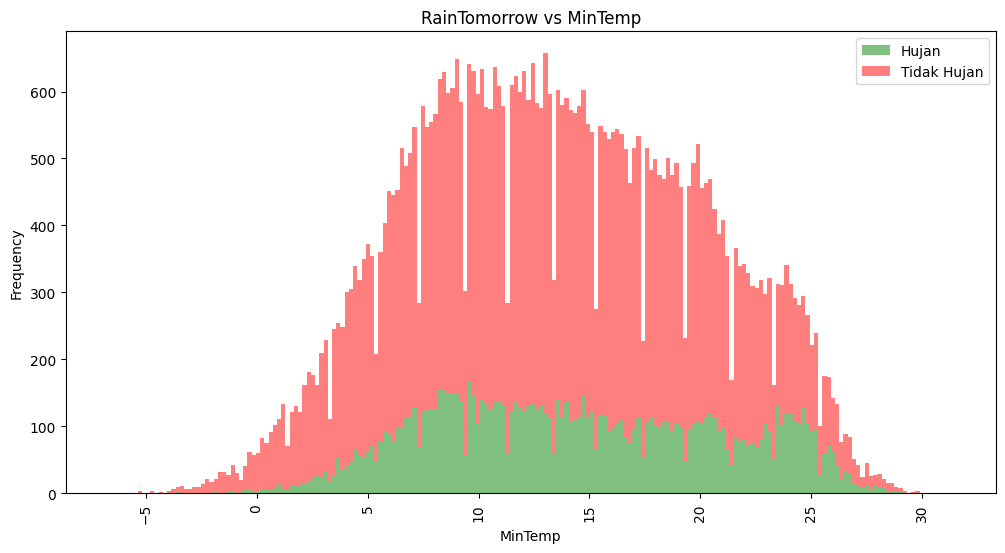

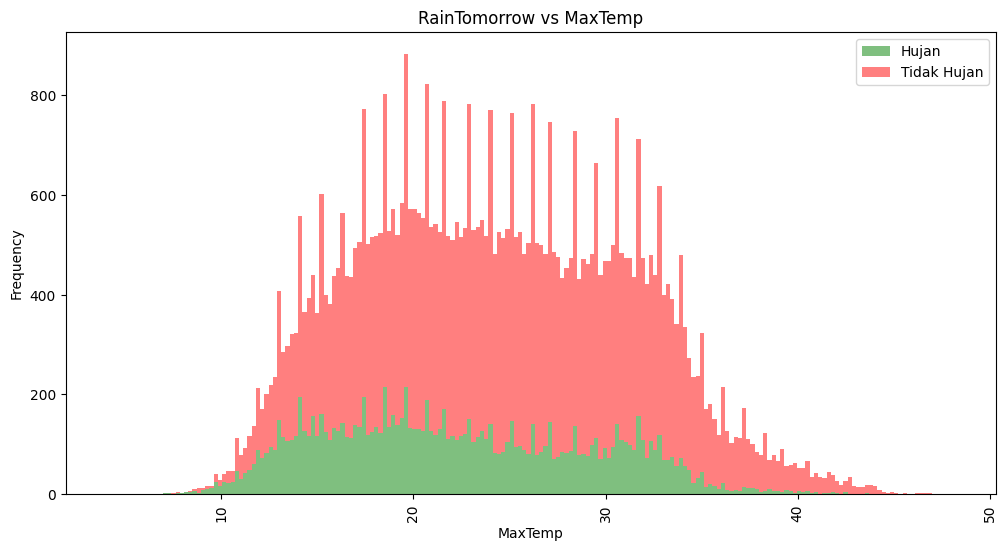

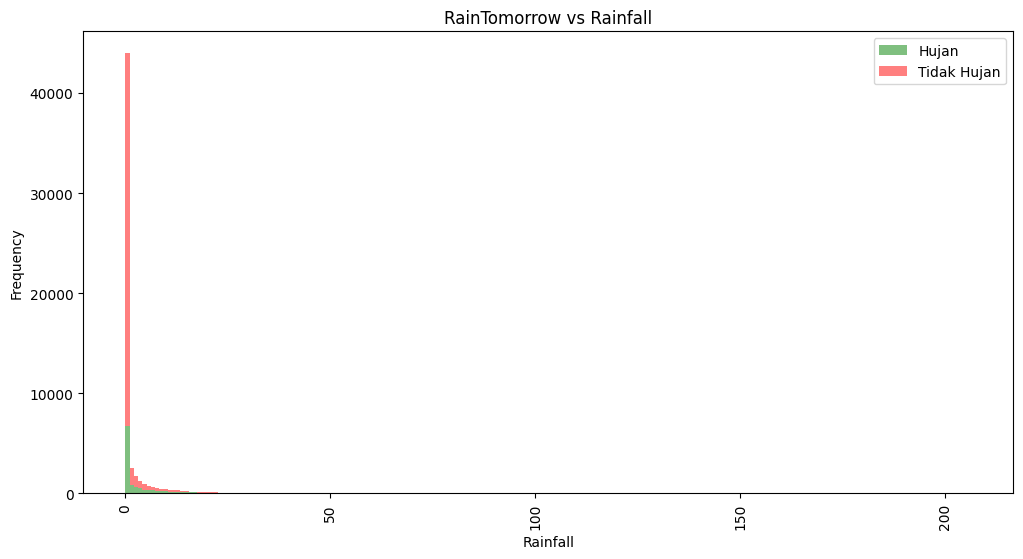

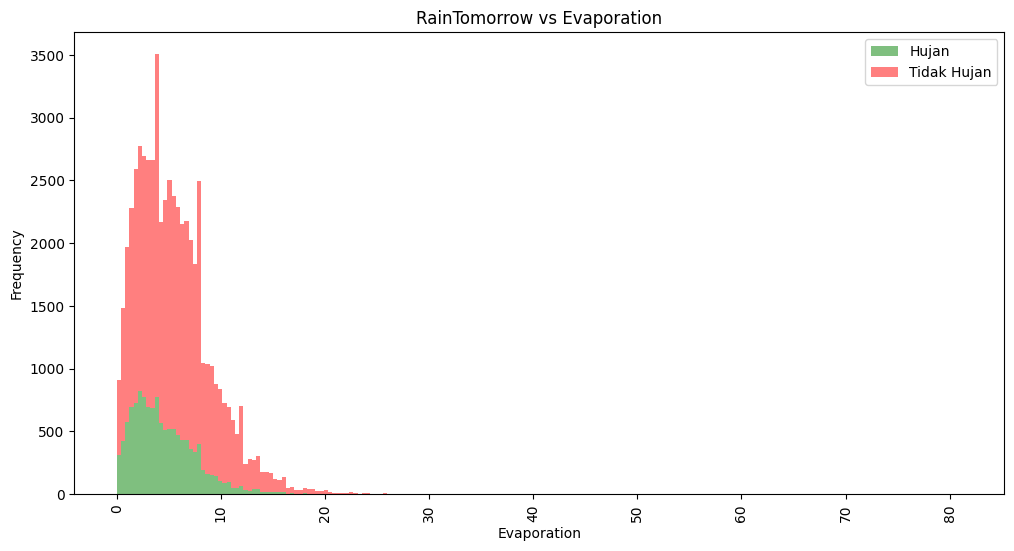

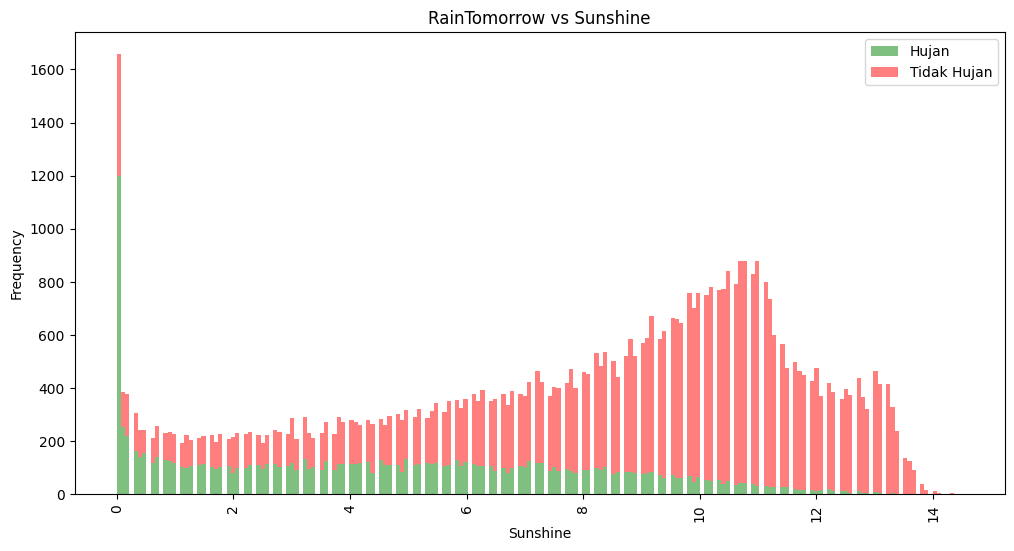

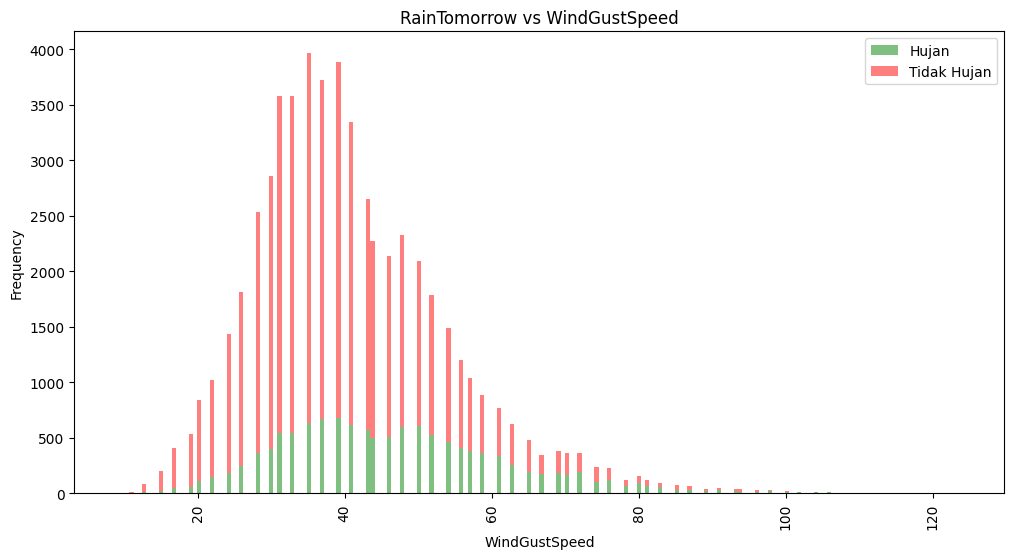

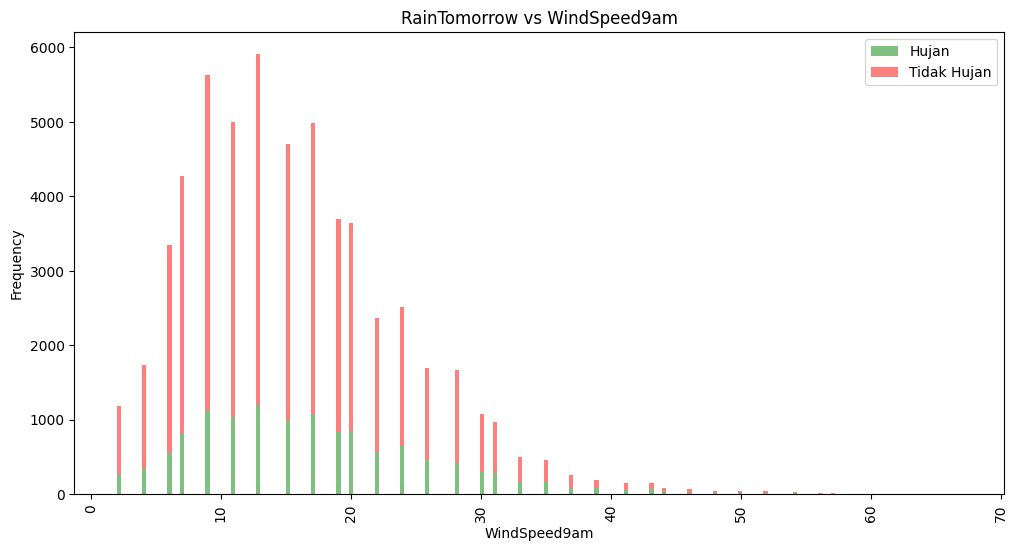

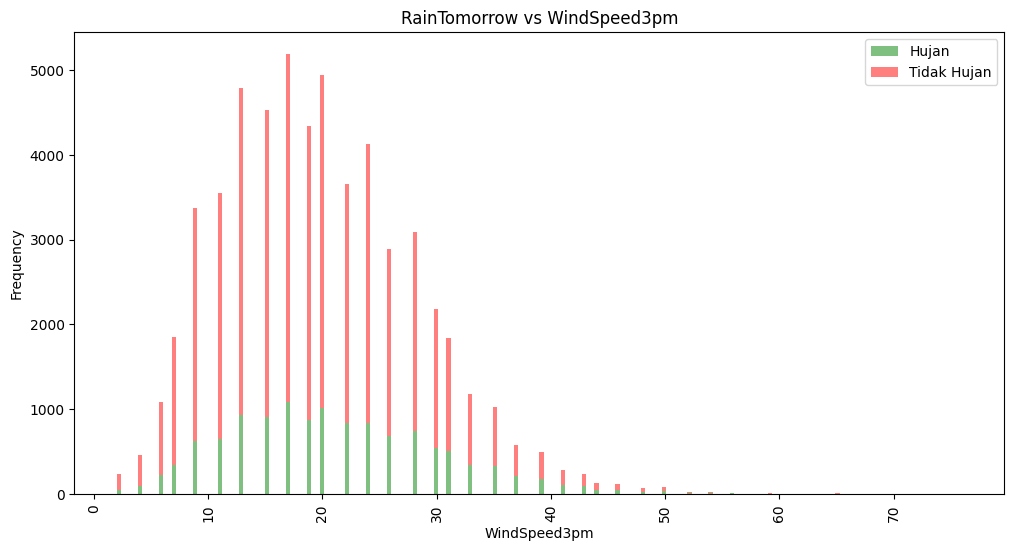

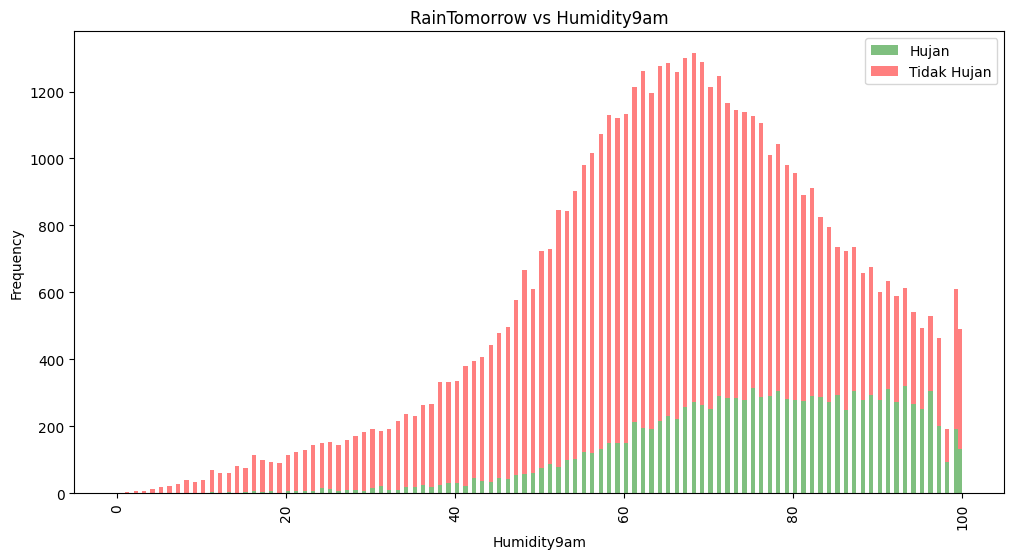

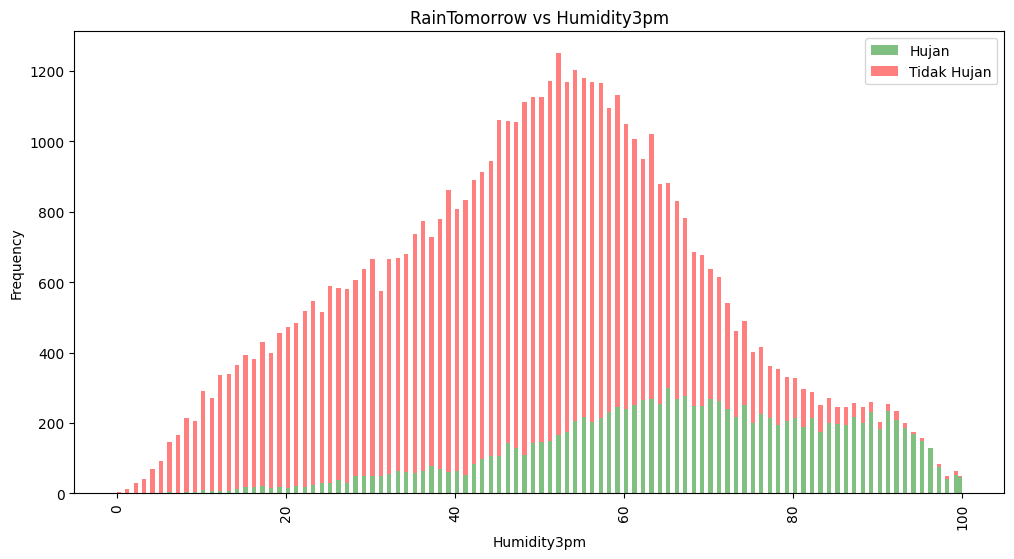

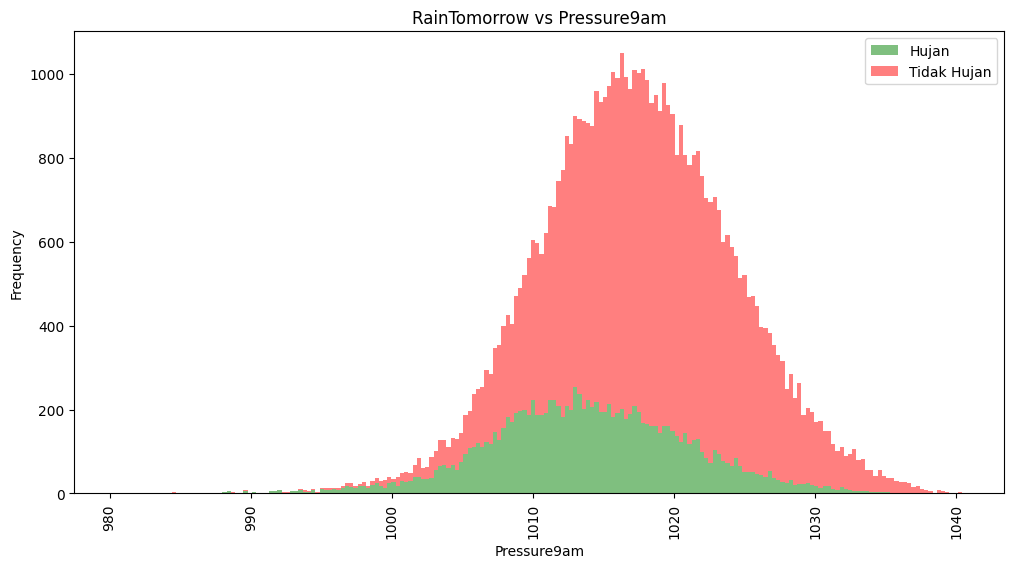

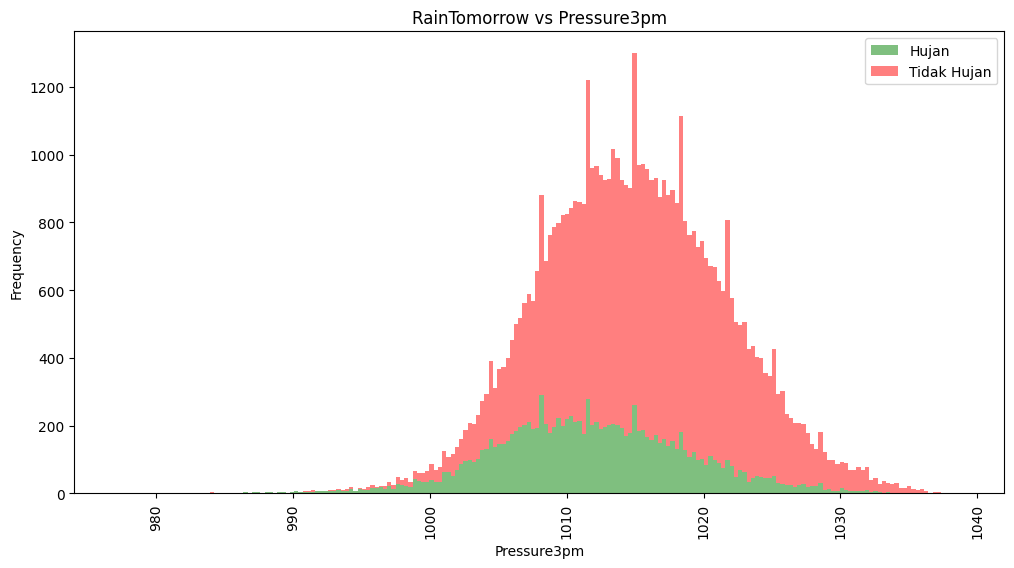

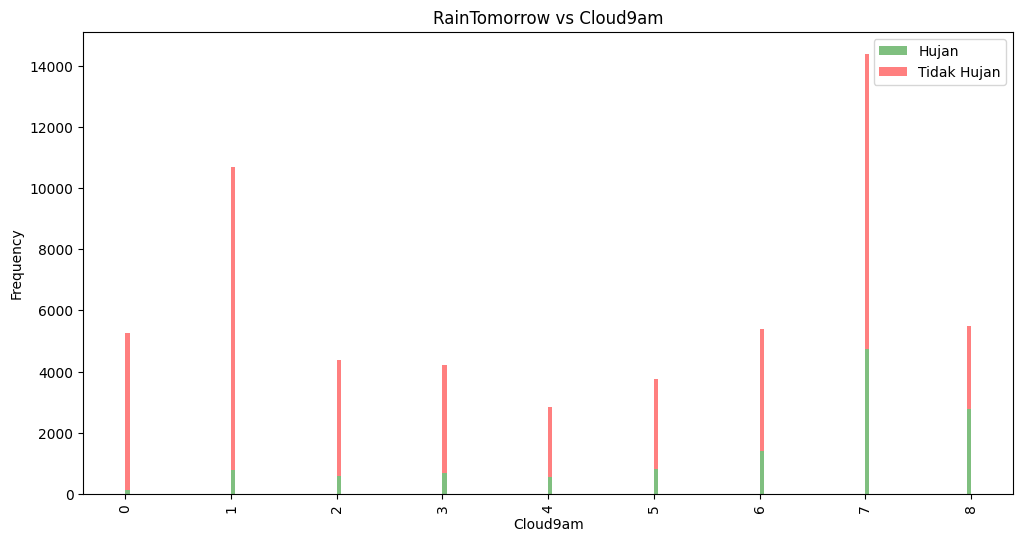

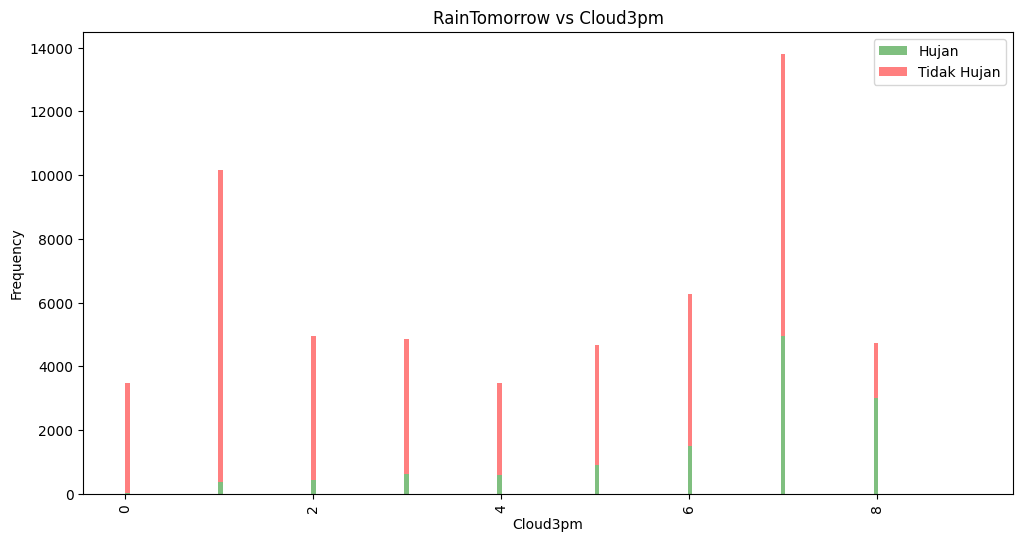

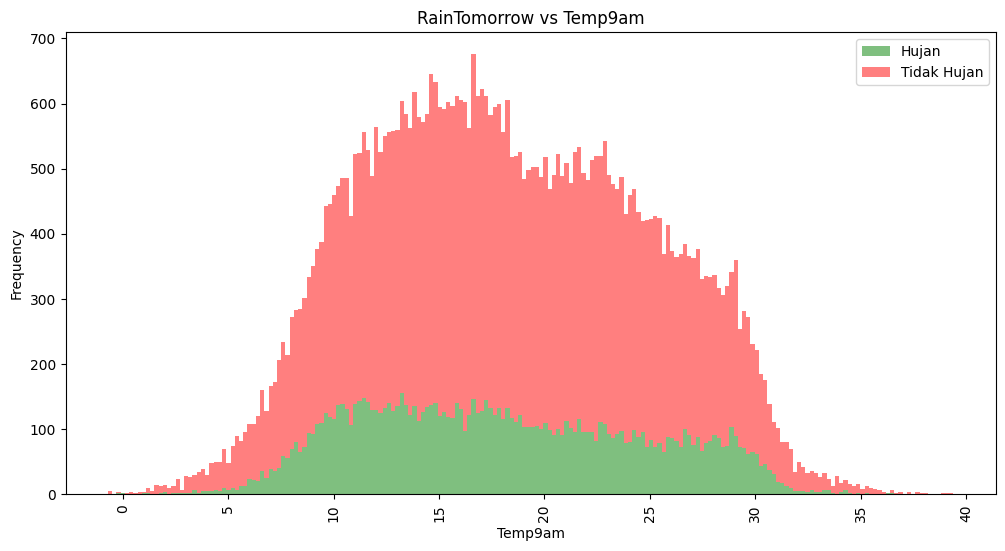

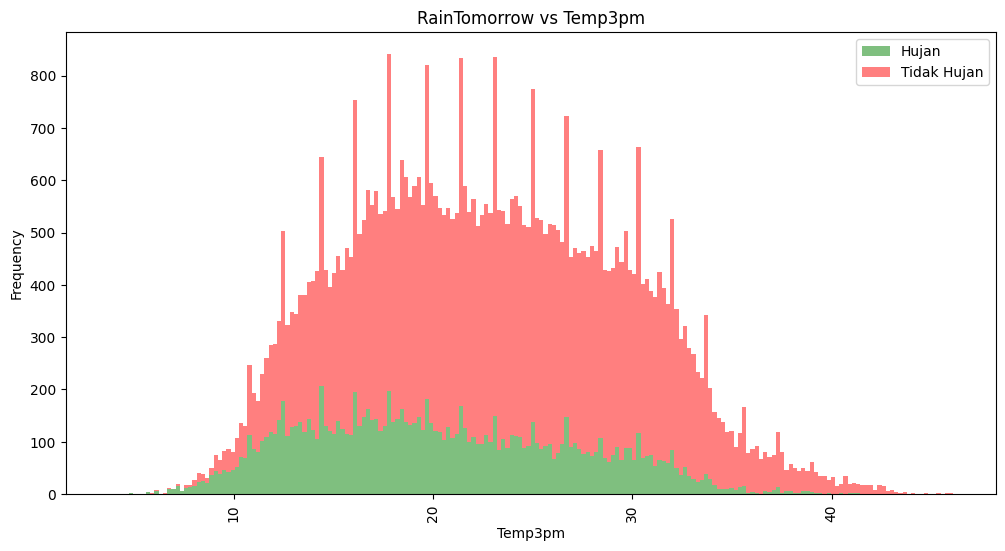

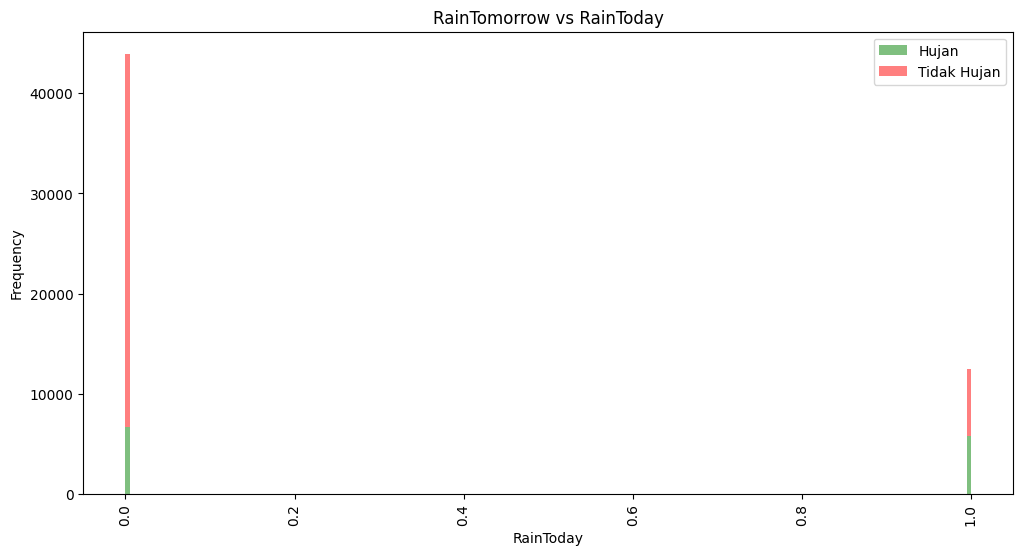

In [25]:
# RainTomorrow vs atribut numeric

numeric_columns = df_clear.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns[:-1]
for attribute in numeric_columns:
    rain_today = df_clear[df_clear['RainTomorrow'] == 1]
    no_rain_today = df_clear[df_clear['RainTomorrow'] == 0]

    plt.figure(figsize=(12, 6))
    plt.hist([rain_today[attribute], no_rain_today[attribute]],
             bins=200,
             alpha=0.5,
             color=['green', 'red'],
             label=['Hujan', 'Tidak Hujan'],
             stacked=True)
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.title(f'RainTomorrow vs {attribute}')
    plt.xticks(rotation=90)
    plt.legend(labels=['Hujan', 'Tidak Hujan'])
    plt.show()

Histogram diatas untuk memvisualisasikan hubungan antara atribut target "RainTomorrow" (hujan besok) dengan atribut-atribut numerik dalam df_clear. Terbagi atas "RainTomorrow" = Hujan/hijau (mengindikasikan hujan besok) dan "no-RainTomorrow" = Tidak Hujan/Merah muda (mengindikasikan tidak hujan besok). Dengan menggunakan histogram, visualisasi tersebut menunjukkan distribusi data atribut numerik dalam kedua kelompok tersebut. Hal ini dapat membantu kami dalam memahami perbedaan dalam distribusi atribut numerik antara kondisi cuaca yang berbeda, yang dapat berguna dalam analisis prediksi cuaca dan menunjukkan bagaimana atribut numerik berhubungan dengan kemungkinan hujan besok.

## E.2 df_strategy

### E.2.1 Measure Central of Tendency

In [26]:
MCT_strategy = df_strategy.describe().T

MCT_strategy.reset_index().rename(
    columns={'index': 'Attribute'})

Attribute     count         mean        std    min     25%     50%  \
0         MinTemp  142193.0    12.185565   6.388936   -8.5     7.6    12.0   
1         MaxTemp  142193.0    23.225365   7.109617   -4.8    17.9    22.6   
2        Rainfall  142193.0     2.326738   8.426426    0.0     0.0     0.0   
3     Evaporation  142193.0     5.183213   3.185401    0.0     4.0     4.8   
4        Sunshine  142193.0     8.042236   2.769638    0.0     8.2     8.5   
5   WindGustSpeed  142193.0    39.920123  13.140632    6.0    31.0    39.0   
6    WindSpeed9am  142193.0    13.992489   8.851614    0.0     7.0    13.0   
7    WindSpeed3pm  142193.0    18.644279   8.721688    0.0    13.0    19.0   
8     Humidity9am  142193.0    68.858235  18.932512    0.0    57.0    70.0   
9     Humidity3pm  142193.0    51.495742  20.532227    0.0    37.0    52.0   
10    Pressure9am  142193.0  1017.648460   6.746267  980.5  1013.5  1017.6   
11    Pressure3pm  142193.0  1015.252481   6.681810  977.1  1011.0  1015.2   
12       Cloud9am  142193.0     4.649568   2.294357    0.0     3.0     5.0   
13       Cloud3pm  142193.0     4.702658   2.118753    0.0     4.0     5.0   
14        Temp9am  142193.0    16.985681   6.472206   -7.2    12.3    16.7   
15        Temp3pm  142193.0    21.675977   6.871243   -5.4    16.7    21.1   
16      RainToday  142193.0     0.221213   0.415065    0.0     0.0     0.0   
17   RainTomorrow  142193.0     0.224181   0.417043    0.0     0.0     0.0   

       75%     max  
0     16.8    33.9  
1     28.2    48.1  
2      0.6   371.0  
3      5.4   145.0  
4      8.7    14.5  
5     46.0   135.0  
6     19.0   130.0  
7     24.0    87.0  
8     83.0   100.0  
9     65.0   100.0  
10  1021.8  1041.0  
11  1019.4  1039.6  
12     6.0     9.0  
13     6.0     9.0  
14    21.5    40.2  
15    26.3    46.7  
16     0.0     1.0  
17     0.0     1.0

### E.2.2 Measure of Spread

In [27]:
# Variance
variance_df = df_strategy.select_dtypes(
    include=[np.number]).var(ddof=1).to_frame()
variance_df.rename(columns={0: 'Variance'}, inplace=True)

# Standard Deviation
std_deviation_df = df_strategy.select_dtypes(
    include=[np.number]).std(ddof=1).to_frame()
std_deviation_df.rename(columns={0: 'Standard Deviation'}, inplace=True)

# Skewness
skewness_df = df_strategy.select_dtypes(include=[np.number]).skew().to_frame()
skewness_df.rename(columns={0: 'Skewness'}, inplace=True)
skewness_df['Skewness Description'] = skewness_df['Skewness'].apply(
    lambda x: 'Distribusi Positif' if x > 0 else ('Distribusi Negatif' if x < 0 else 'Distribusi Simetrik'))

# Kurtosis
kurtosis_df = df_strategy.select_dtypes(
    include=[np.number]).kurtosis().to_frame()
kurtosis_df.rename(columns={0: 'Kurtosis'}, inplace=True)
kurtosis_df['Kurtosis Description'] = kurtosis_df['Kurtosis'].apply(
    lambda x: 'Leptokurtik' if x > 0 else ('Platykurtik' if x < 0 else 'Mesokurtik'))

# Percentiles
percentile_values = df_strategy.select_dtypes(
    include=[np.number]).quantile([0.25, 0.50, 0.75])
percentile_values.index = ['25%', '50%', '75%']
percentile_values = percentile_values.T
percentile_values['IQR'] = percentile_values['75%'] - percentile_values['25%']

# Ranges
range_df = df_strategy.describe().loc[['min', 'max']].T
range_df.rename(columns={'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

# Menggabungkan semua hasil
Measure_of_Spread = pd.concat([variance_df, std_deviation_df,
                              skewness_df, kurtosis_df, percentile_values, range_df], axis=1)

# Tampilkan hasilnya
Measure_of_Spread.reset_index().rename(columns={'index': 'Attribute'})

Attribute    Variance  Standard Deviation  Skewness  \
0         MinTemp   40.818501            6.388936  0.024345   
1         MaxTemp   50.546653            7.109617  0.225763   
2        Rainfall   71.004650            8.426426  9.934023   
3     Evaporation   10.146782            3.185401  5.140075   
4        Sunshine    7.670892            2.769638 -1.110020   
5   WindGustSpeed  172.676204           13.140632  0.918436   
6    WindSpeed9am   78.351074            8.851614  0.782261   
7    WindSpeed3pm   76.067840            8.721688  0.635020   
8     Humidity9am  358.439999           18.932512 -0.488110   
9     Humidity3pm  421.572336           20.532227  0.033042   
10    Pressure9am   45.512123            6.746267 -0.098977   
11    Pressure3pm   44.646586            6.681810 -0.046081   
12       Cloud9am    5.264075            2.294357 -0.551152   
13       Cloud3pm    4.489116            2.118753 -0.562072   
14        Temp9am   41.889455            6.472206  0.092524   
15        Temp3pm   47.213976            6.871243  0.247242   
16      RainToday    0.172279            0.415065  1.343357   
17   RainTomorrow    0.173925            0.417043  1.322753   

   Skewness Description    Kurtosis Kurtosis Description     25%     50%  \
0    Distribusi Positif   -0.475952          Platykurtik     7.6    12.0   
1    Distribusi Positif   -0.232095          Platykurtik    17.9    22.6   
2    Distribusi Positif  181.657851          Leptokurtik     0.0     0.0   
3    Distribusi Positif   81.009550          Leptokurtik     4.0     4.8   
4    Distribusi Negatif    1.499142          Leptokurtik     8.2     8.5   
5    Distribusi Positif    1.740520          Leptokurtik    31.0    39.0   
6    Distribusi Positif    1.269332          Leptokurtik     7.0    13.0   
7    Distribusi Positif    0.844822          Leptokurtik    13.0    19.0   
8    Distribusi Negatif   -0.000632          Platykurtik    57.0    70.0   
9    Distribusi Positif   -0.446433          Platykurtik    37.0    52.0   
10   Distribusi Negatif    0.589664          Leptokurtik  1013.5  1017.6   
11   Distribusi Negatif    0.473902          Leptokurtik  1011.0  1015.2   
12   Distribusi Negatif   -0.568812          Platykurtik     3.0     5.0   
13   Distribusi Negatif   -0.331299          Platykurtik     4.0     5.0   
14   Distribusi Positif   -0.332156          Platykurtik    12.3    16.7   
15   Distribusi Positif   -0.089879          Platykurtik    16.7    21.1   
16   Distribusi Positif   -0.195394          Platykurtik     0.0     0.0   
17   Distribusi Positif   -0.250329          Platykurtik     0.0     0.0   

       75%   IQR  Minimum  Maximum  
0     16.8   9.2     -8.5     33.9  
1     28.2  10.3     -4.8     48.1  
2      0.6   0.6      0.0    371.0  
3      5.4   1.4      0.0    145.0  
4      8.7   0.5      0.0     14.5  
5     46.0  15.0      6.0    135.0  
6     19.0  12.0      0.0    130.0  
7     24.0  11.0      0.0     87.0  
8     83.0  26.0      0.0    100.0  
9     65.0  28.0      0.0    100.0  
10  1021.8   8.3    980.5   1041.0  
11  1019.4   8.4    977.1   1039.6  
12     6.0   3.0      0.0      9.0  
13     6.0   2.0      0.0      9.0  
14    21.5   9.2     -7.2     40.2  
15    26.3   9.6     -5.4     46.7  
16     0.0   0.0      0.0      1.0  
17     0.0   0.0      0.0      1.0

### E.2.3 Visualisasi Data

#### E.2.3.1 Pesebaran data

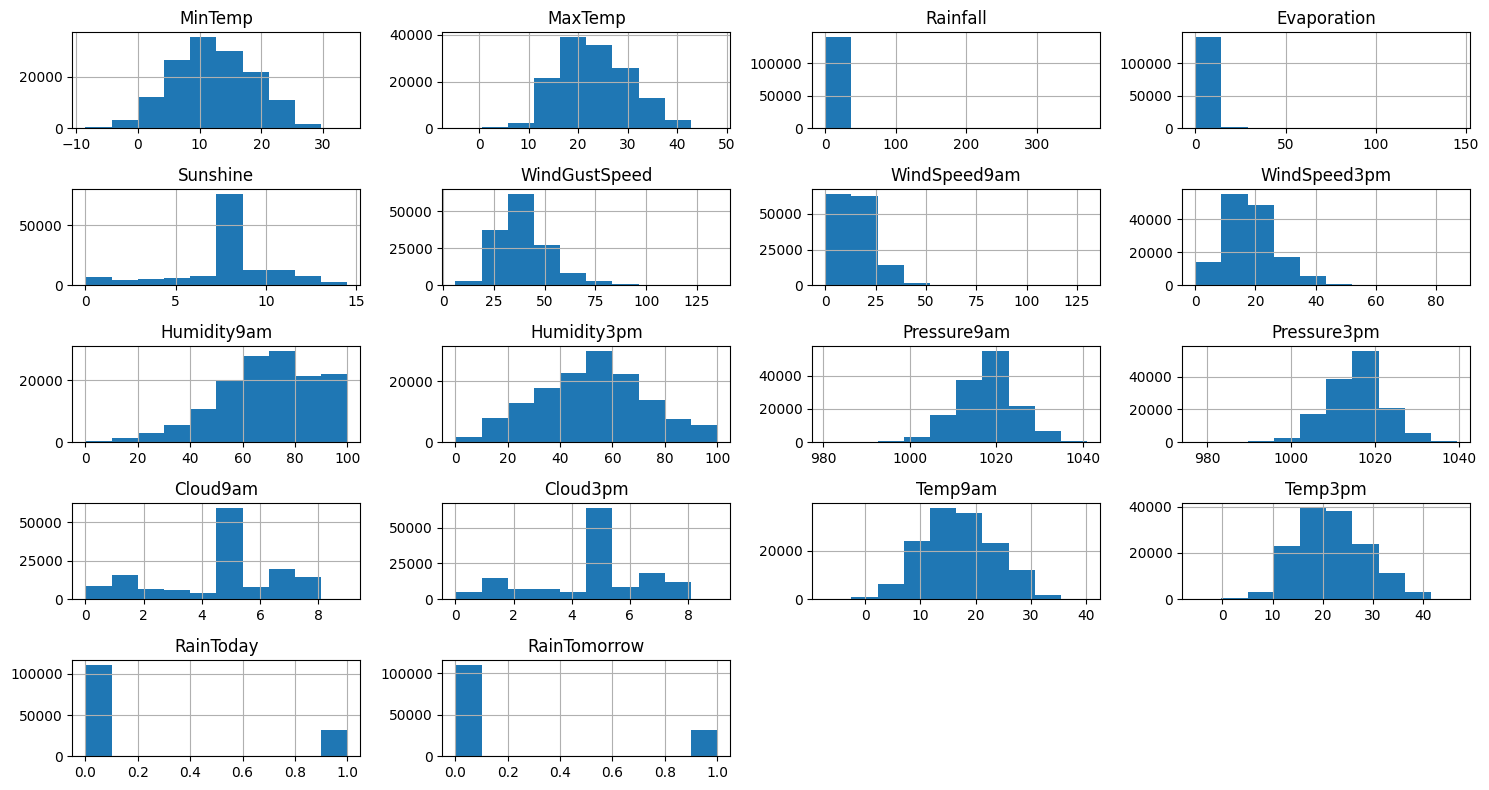

In [28]:
# Histogram

df_strategy.hist(figsize=(15, 8))
plt.title('Pesebaran Data')
plt.tight_layout()
plt.show()

Histogram diatas untuk memvisualisasikan pesebaran data dari kolom-kolom numerik dalam df_strategy. Histogram ini dapat membantu kami untuk melihat distribusi data, mengidentifikasi pola, dan mendeteksi outlier jika ada, hal ini bberguna dalam analisis data untuk memahami karakteristik data yang sedang kami tangani.

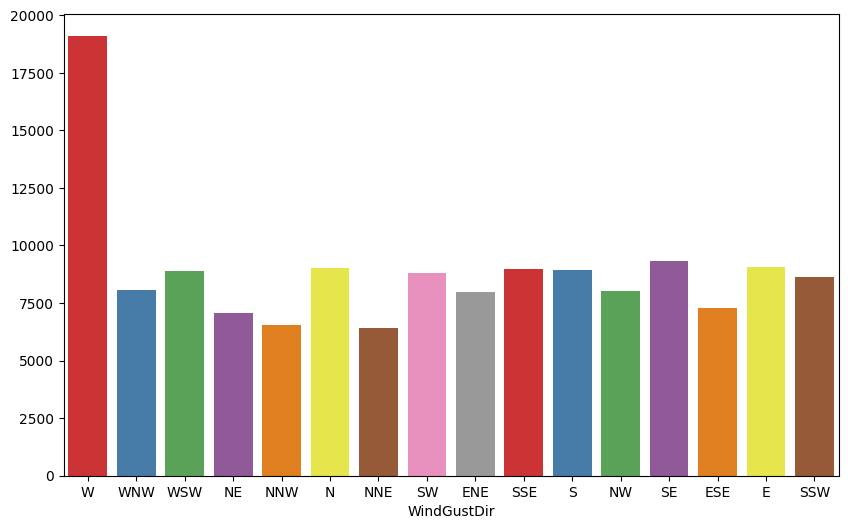

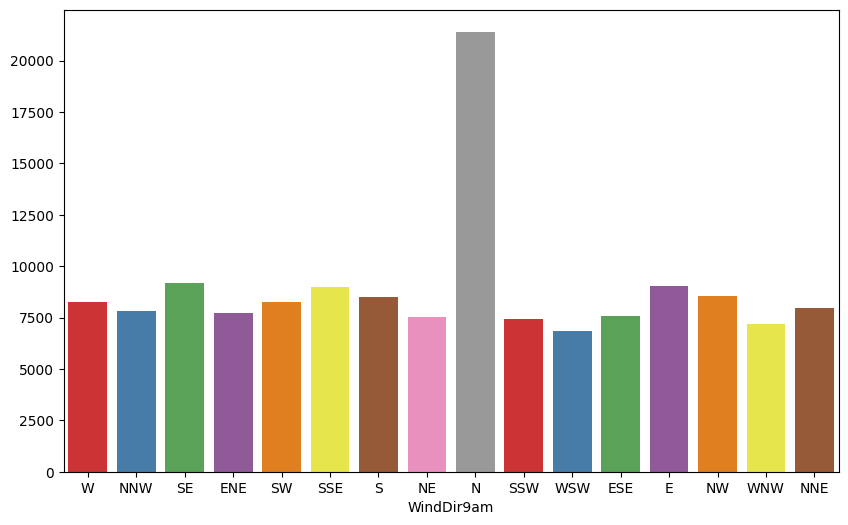

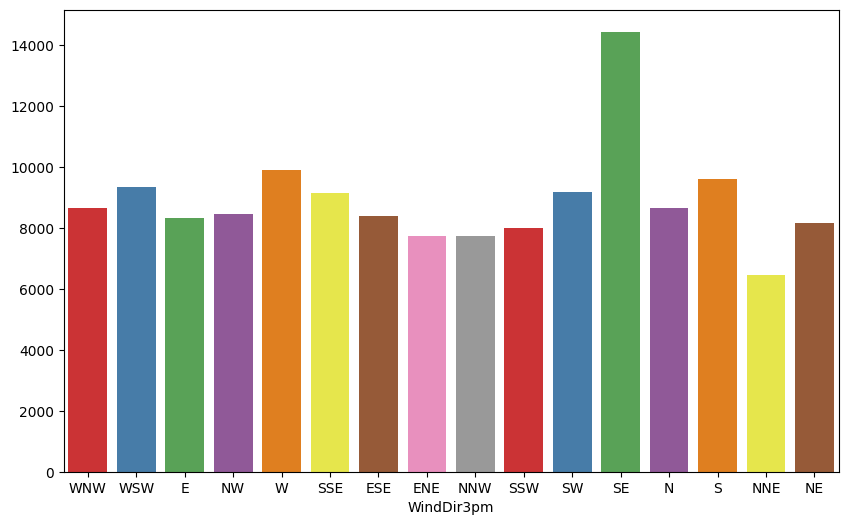

In [29]:
# Countplot untuk dtype object

for column in df_strategy.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_strategy, x=column, palette='Set1')
    plt.ylabel('')
    plt.show()

Countplot diatas untuk memvisualisasikan setiap kolom dalam df_strategy yang bertipe objek (string atau kategori). Setiap countplot menampilkan sebaran jumlah kategori atau nilai unik dalam kolom tersebut. Visualisasi ini dapat membantu kami dalam pmemahami distribusi data kategorikal memungkinkan kami untuk melihat frekuensi masing-masing nilai dalam setiap kolom. Dengan palet warna 'Set1', setiap plot membedakan nilai kategori dengan warna yang berbeda, sehingga mudah untuk dipahami.

#### E.2.3.2 Check Outlier dengan Boxplot

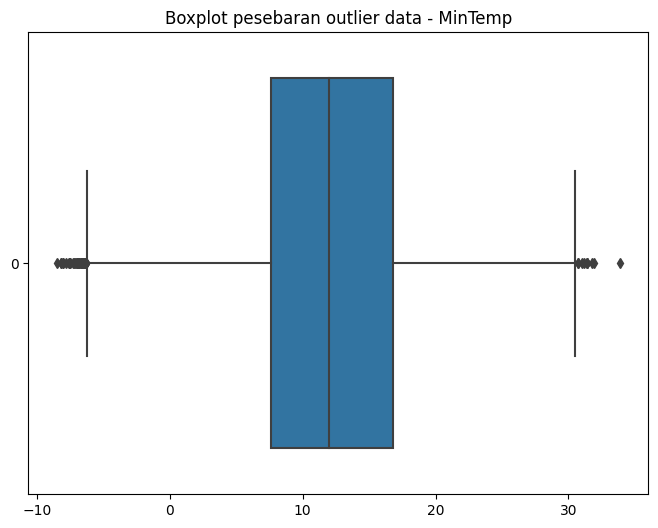

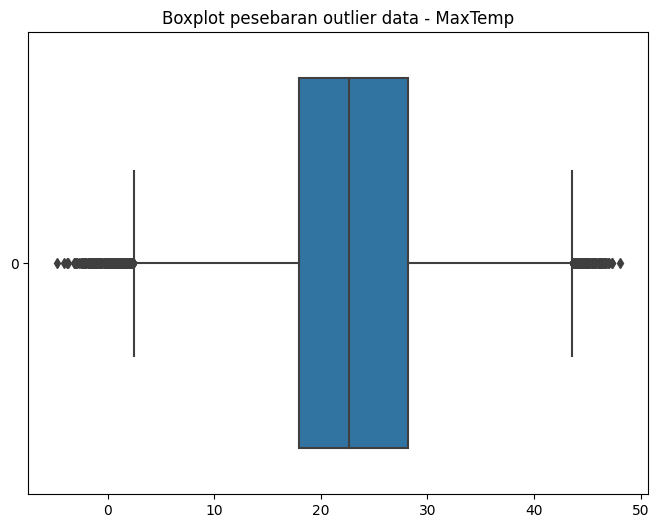

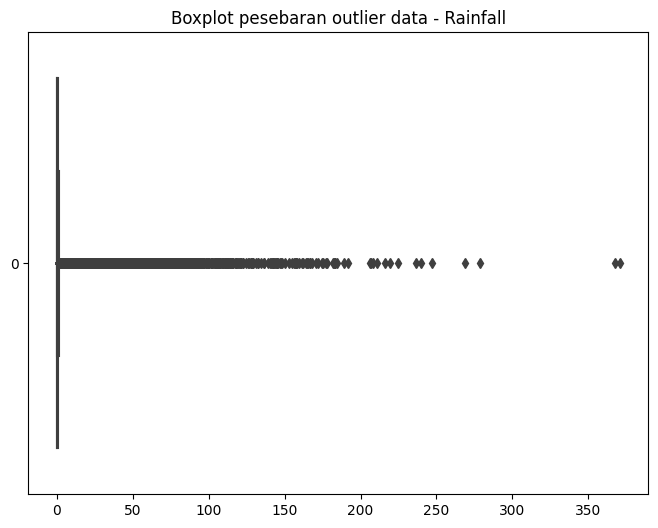

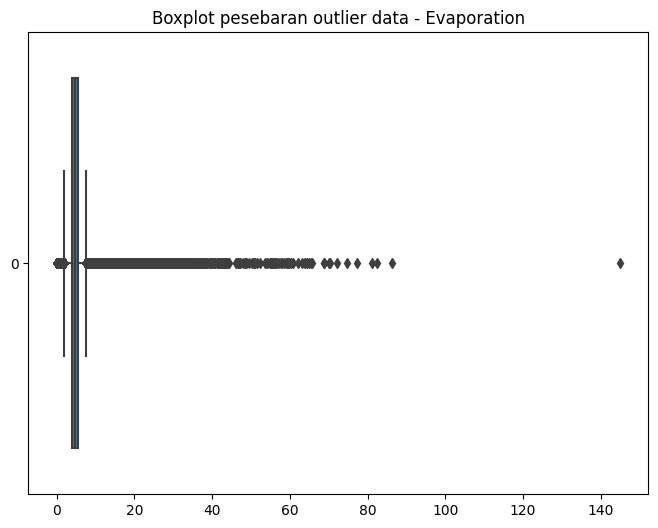

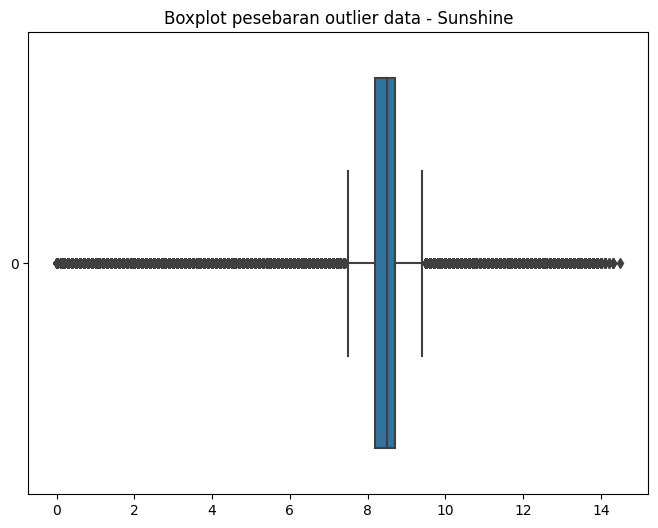

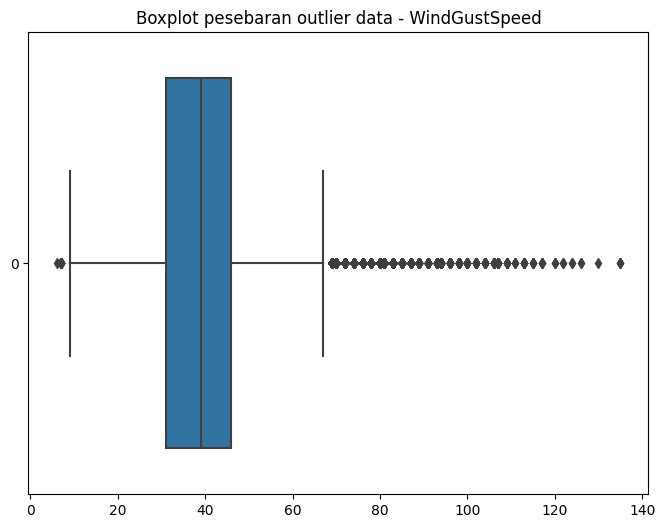

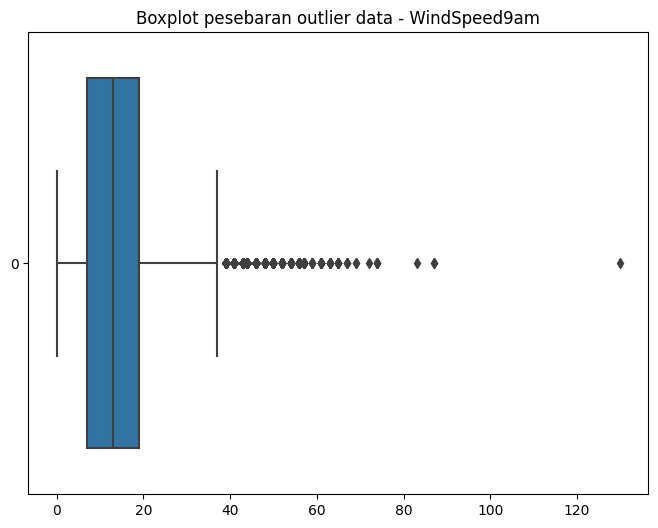

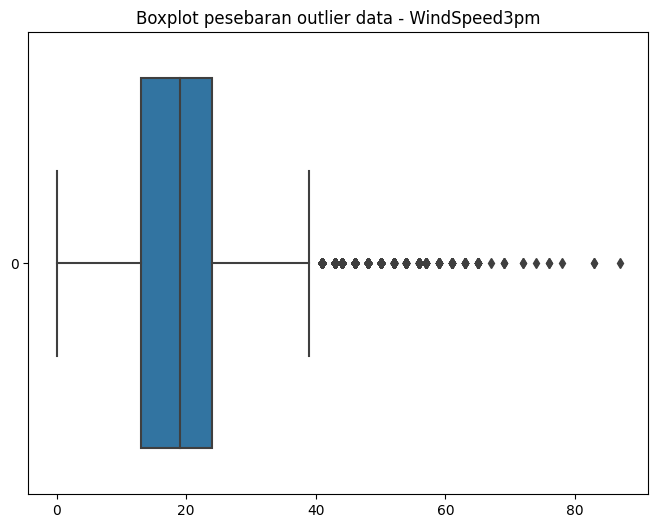

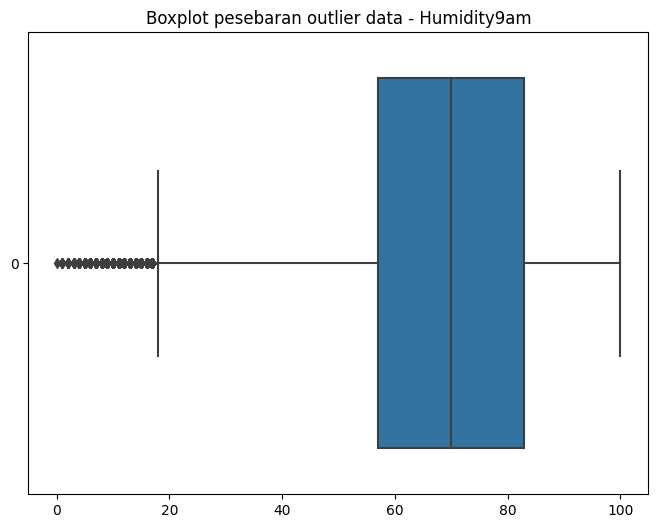

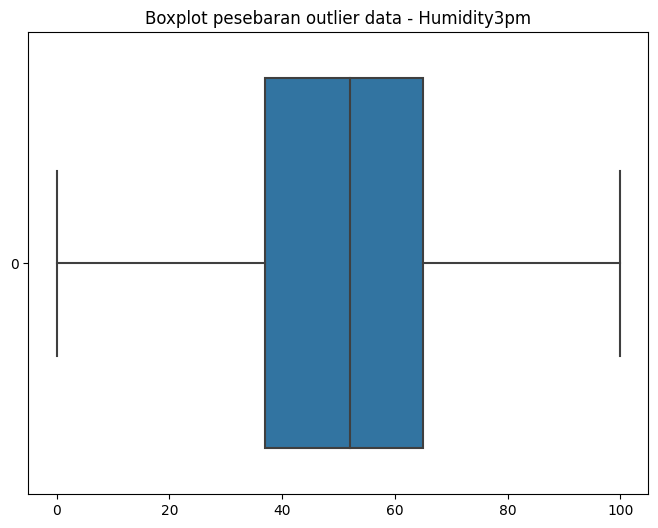

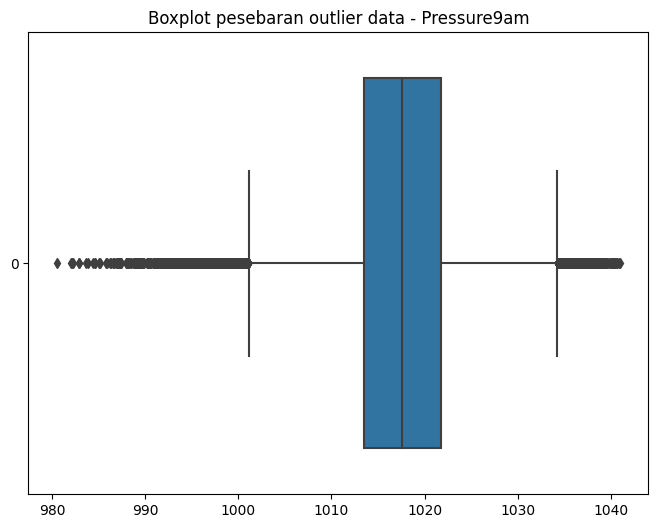

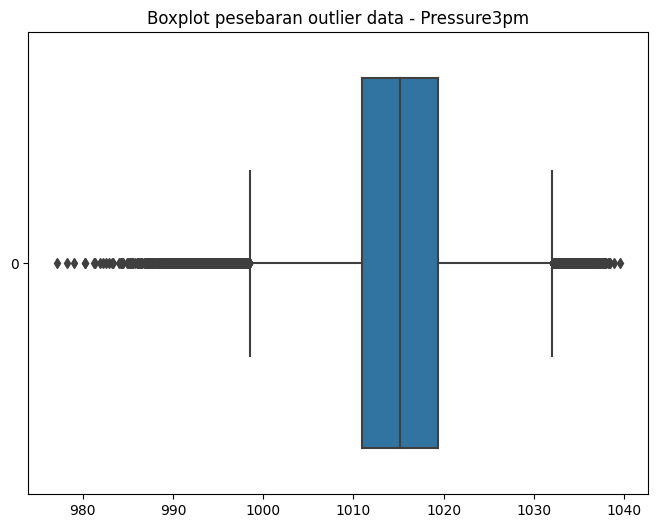

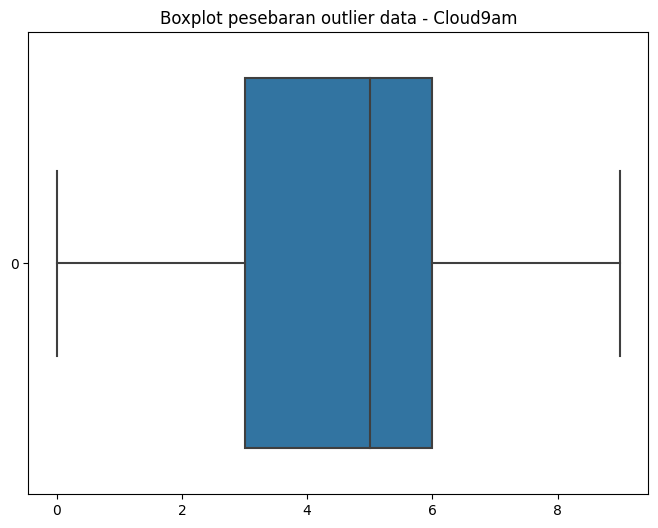

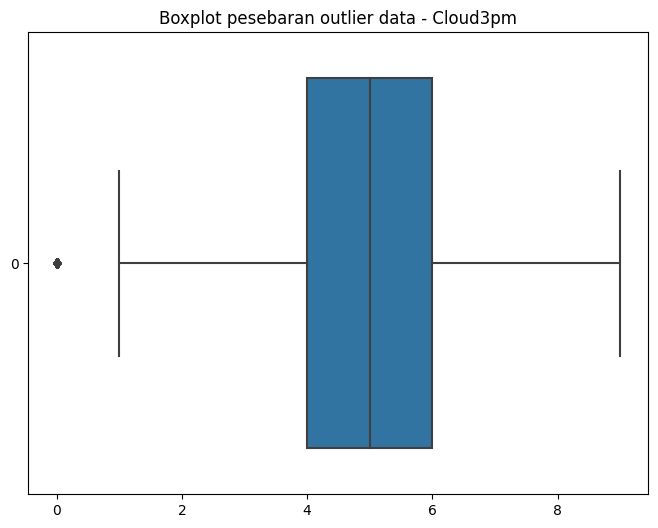

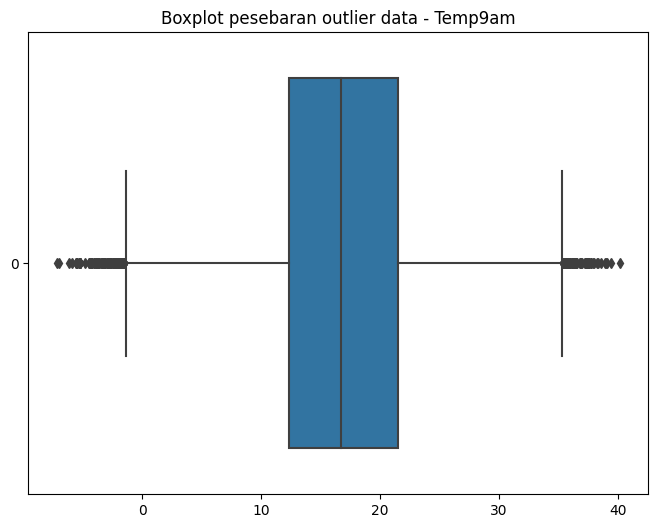

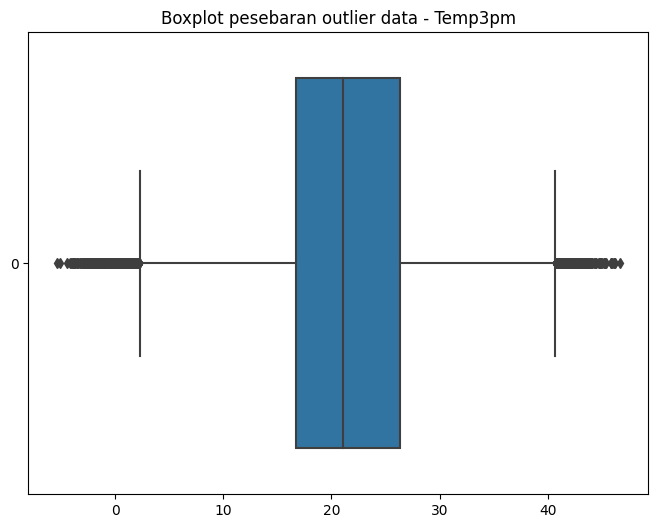

In [30]:
# Boxplot

temp_vis_attribute = df_strategy.iloc[:, 0:-
                                      2].select_dtypes(include=['number']).columns

for column in temp_vis_attribute:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_strategy[column], orient='h')
    plt.title(f'Boxplot pesebaran outlier data - {column}')
    plt.show()

Boxplot diatas untuk memvisualisasikan kolom numerik df_strategy bertujuan untuk memeriksa keberadaan outlier (data ekstrem) dalam setiap kolom tersebut. Setiap boxplot menunjukkan distribusi data, dengan garis tengah kotak mewakili median, kotak antara kuartil pertama dan kuartil ketiga, serta garis-garis "jangkauan" yang memungkinkan kita mengidentifikasi outlier. Jika terdapat titik-titik di luar garis jangkauan tersebut, maka data tersebut dapat dianggap sebagai outlier.

#### E.2.3.3 Check visualisasi atribut target (RainTomorrow) dengan attribut lainnya

##### E.2.3.3.1 RainTomorrow vs atribut Object

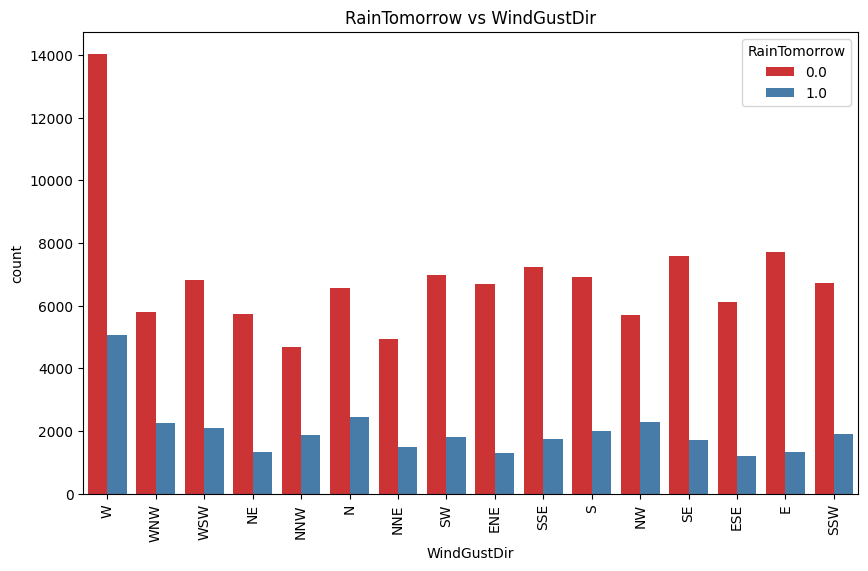

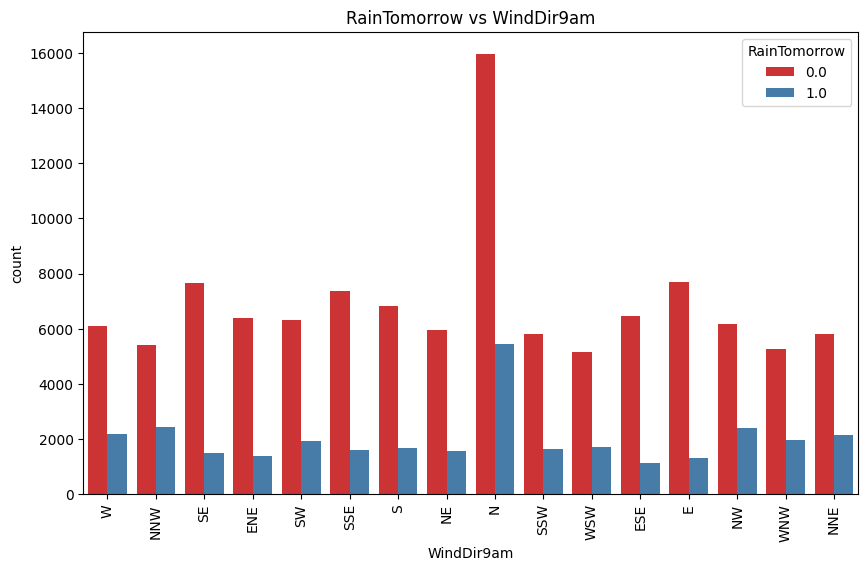

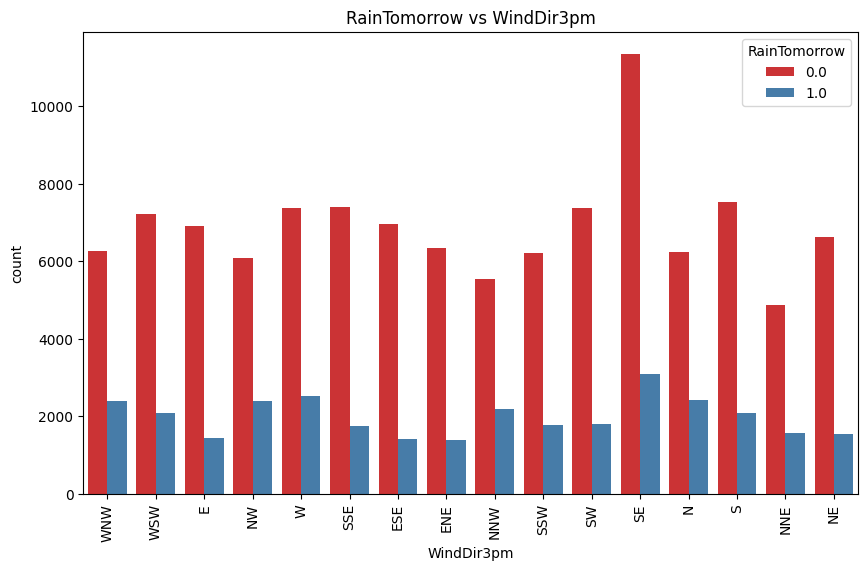

In [31]:
# Raintomorrow vs atribut object

categorical_columns = df_clear.select_dtypes(include=['object']).columns

for attribute in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_strategy, x=attribute,
                  hue='RainTomorrow', palette='Set1')
    plt.title(f'RainTomorrow vs {attribute}')
    plt.xticks(rotation=90)
    plt.show()

Bar plot diatas untuk memvisualisasikan kolom yang membandingkan atribut target "RainTomorrow" dengan atribut-atribut objek lain dalam df_clear. Perbandingan jumlah sampel yang memiliki "RainTomorrow" sebagai "Yes" atau 1.0/biru (hujan besok) dan "no-RainTomorrow" "No" atau 0.0/merah (tidak hujan besok) dalam konteks atribut objek yang sedang dianalisis. Ini membantu kami dalam memahami bagaimana atribut saling berhubungan dengan kejadian hujan besok. Grafik ini memungkinkan kami untuk melihat apakah ada pola atau perbedaan yang signifikan dalam atribut yang berkaitan dengan prediksi cuaca hujan besok, yang dapat membantu kami untuk memahami lebih lanjut tentang faktor-faktor yang memengaruhi prediksi cuaca.

##### E.2.3.3.2 RainTomorrow vs atribut Numeric

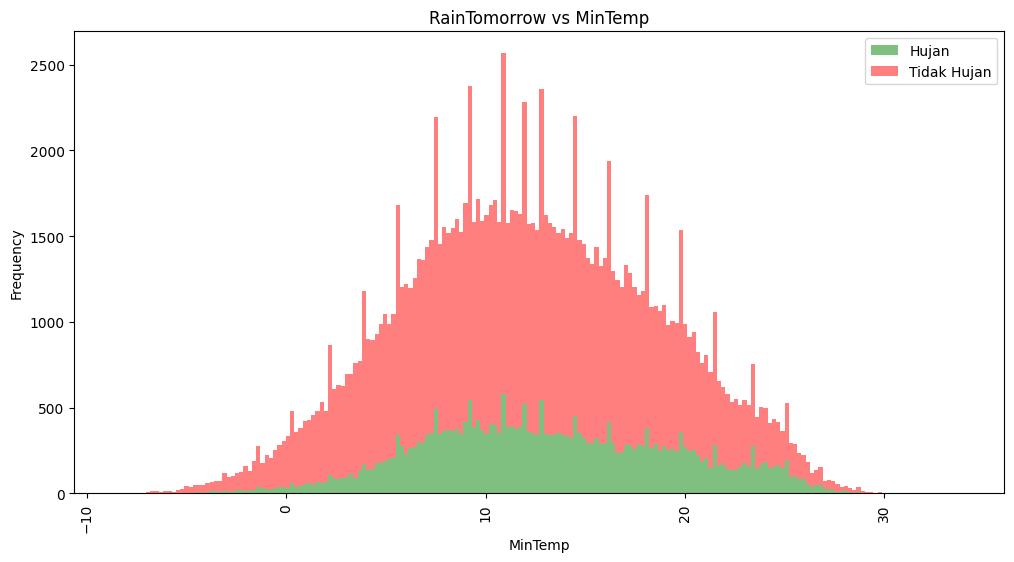

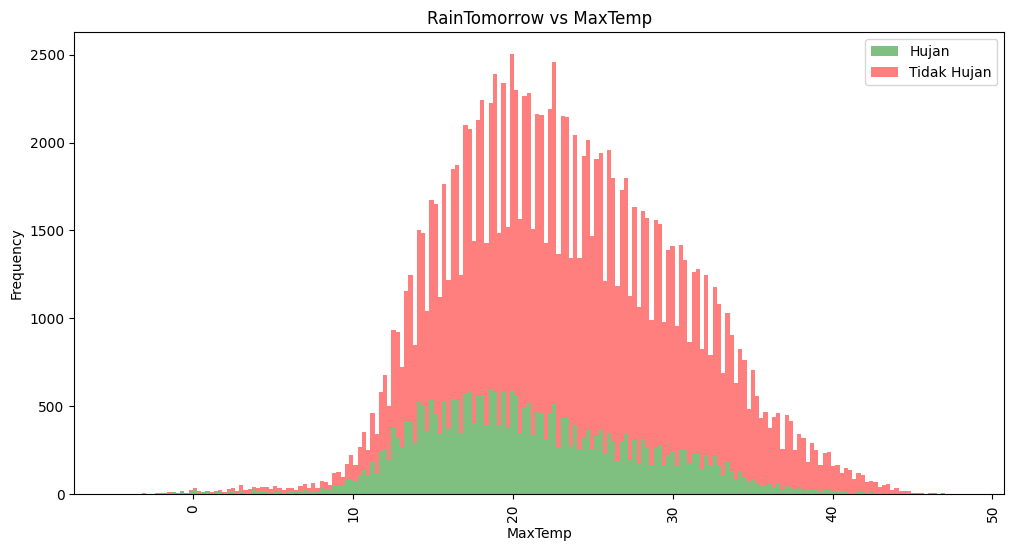

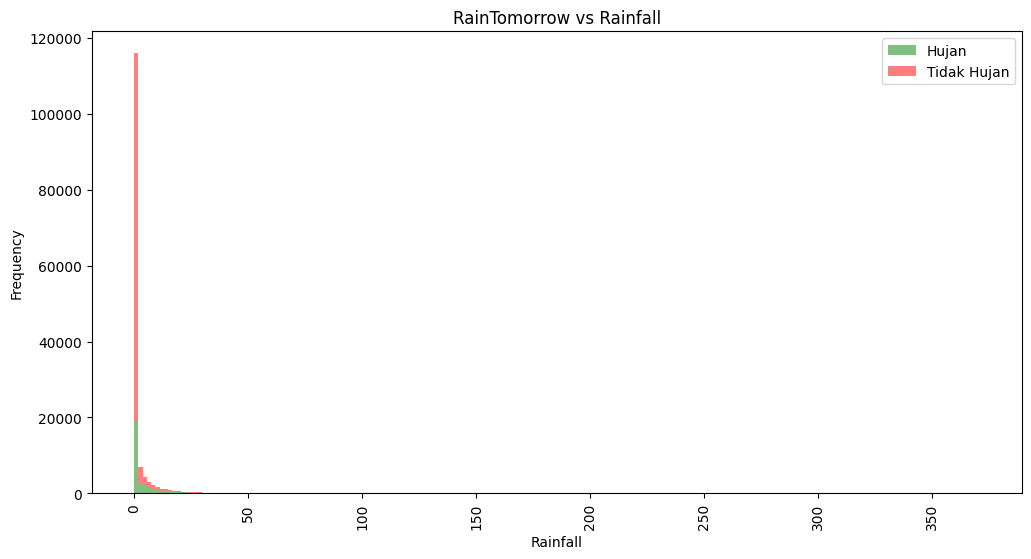

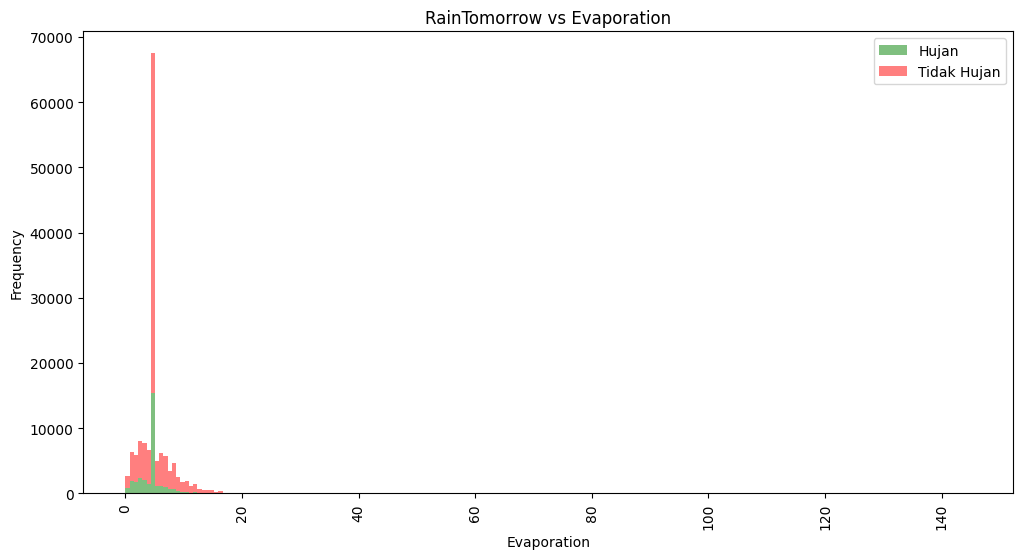

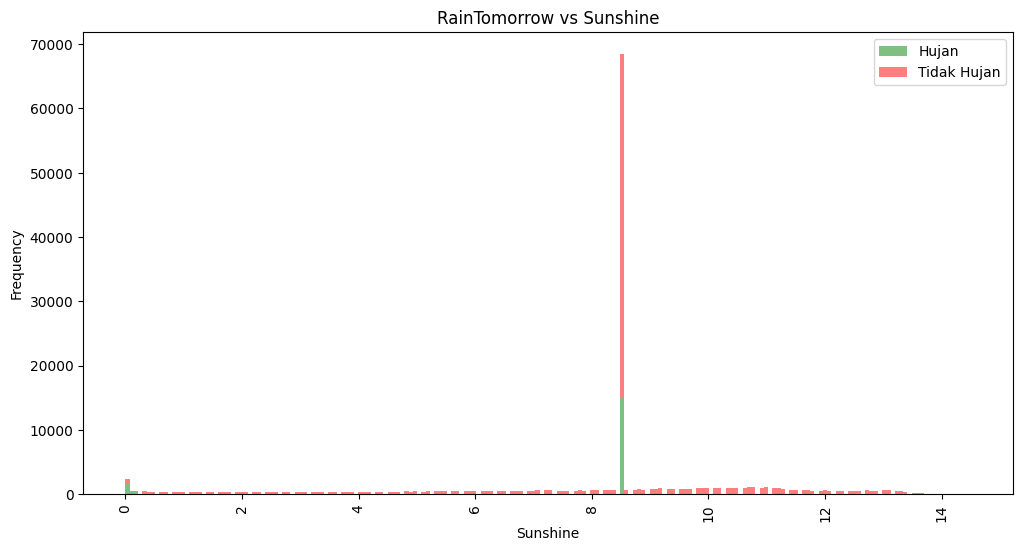

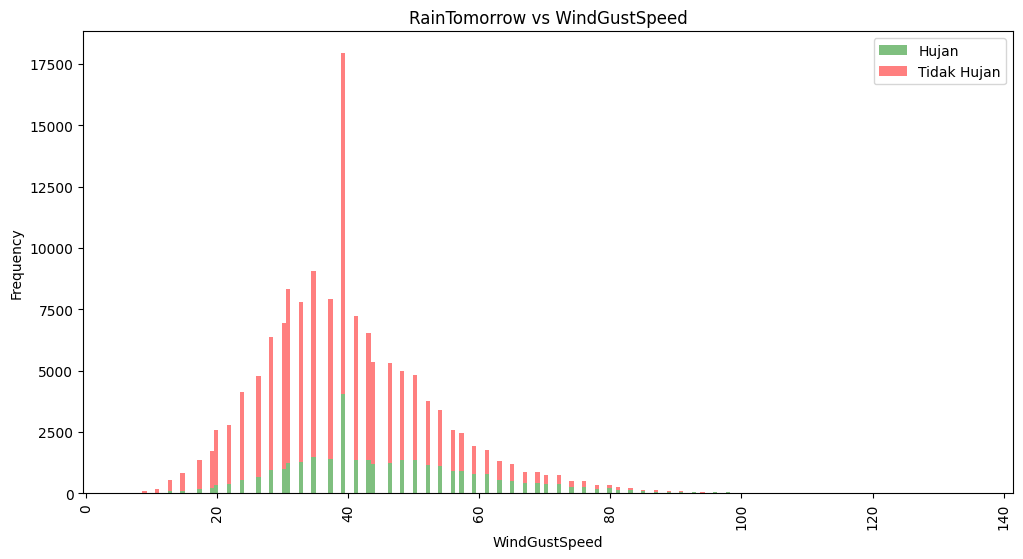

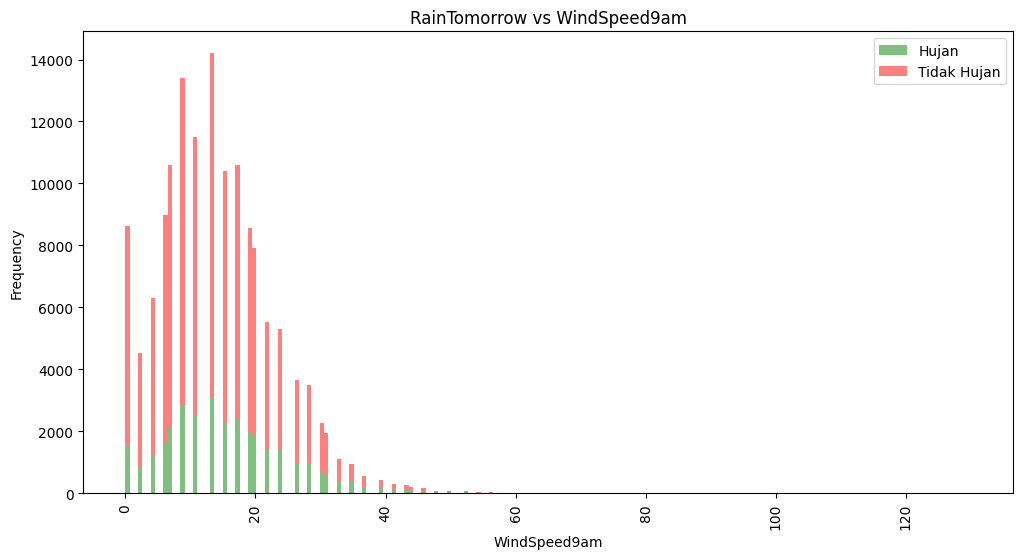

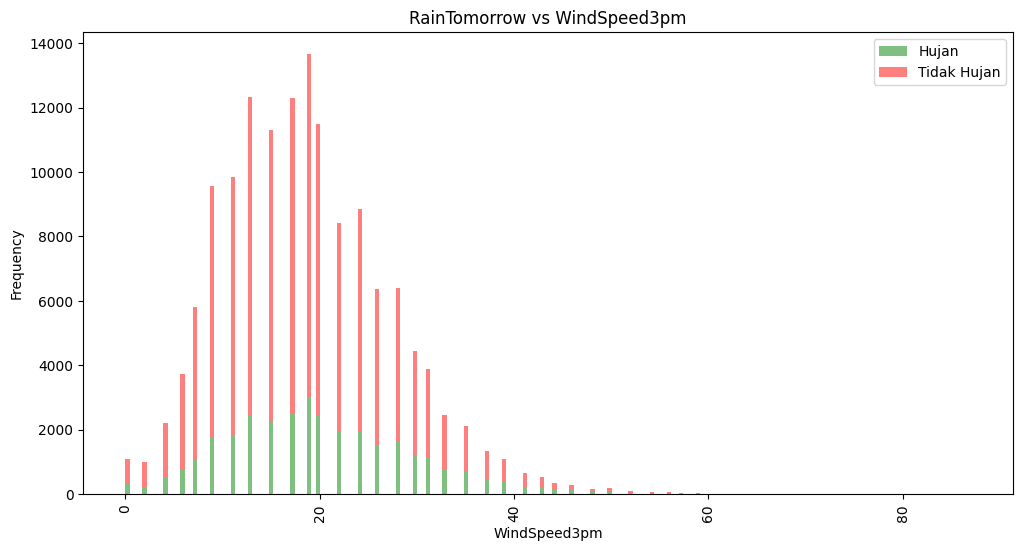

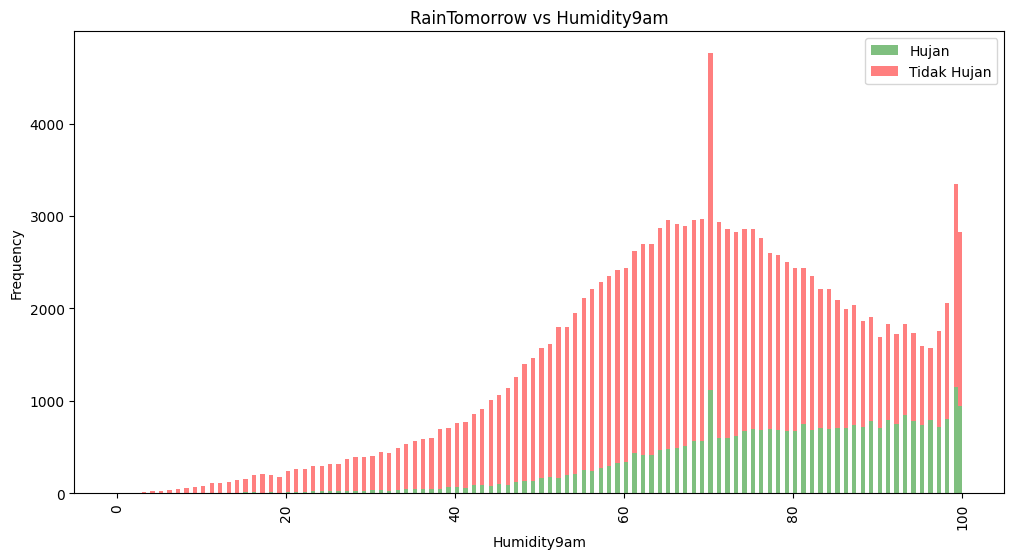

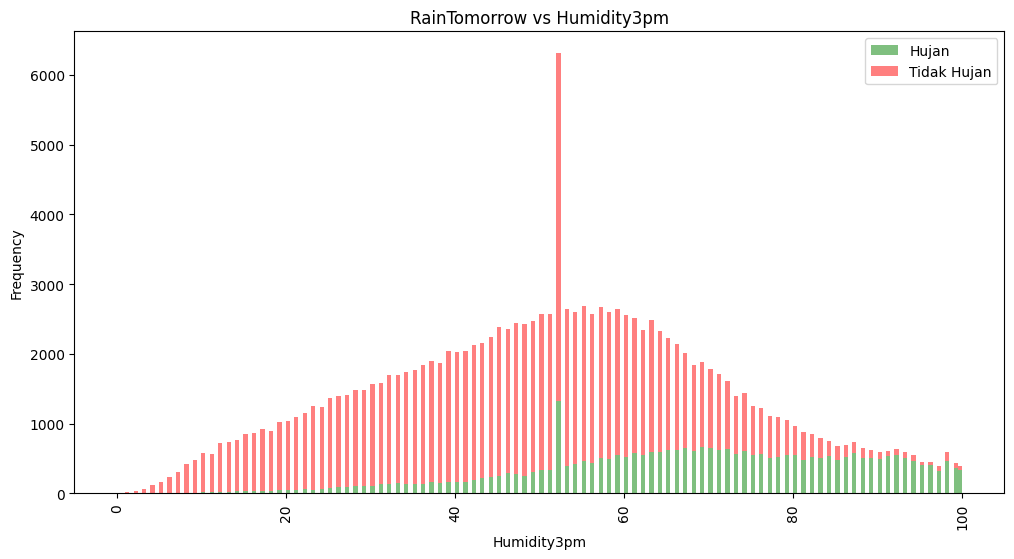

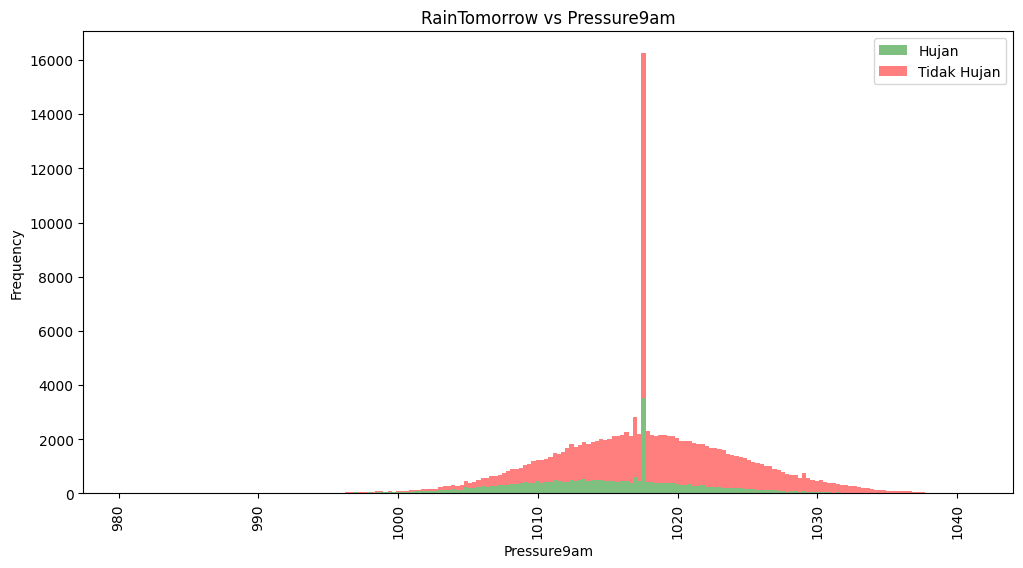

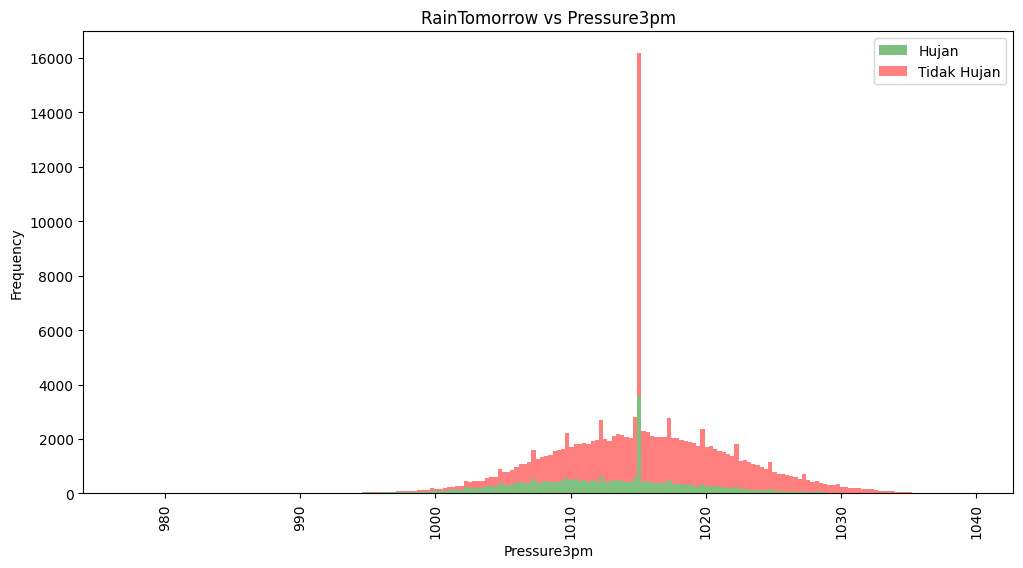

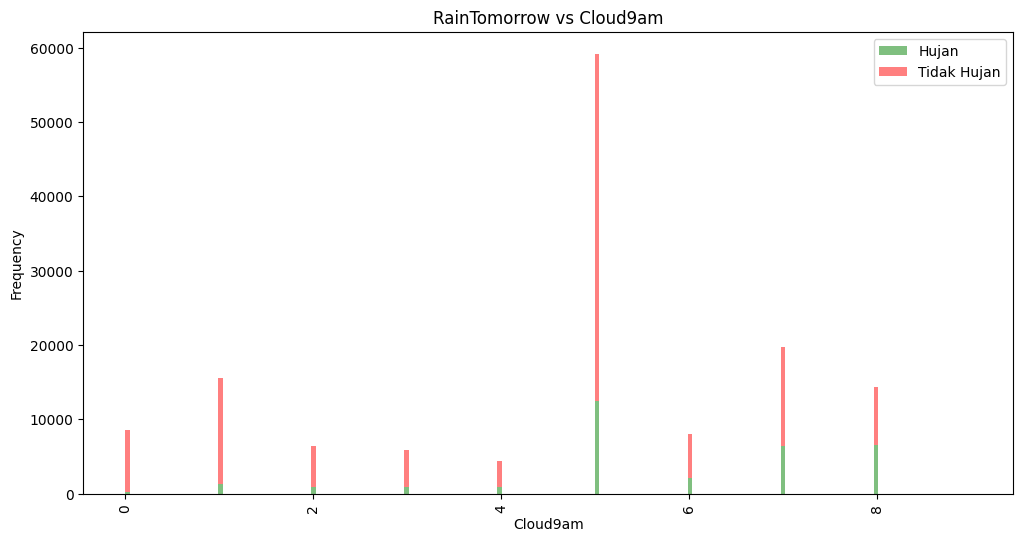

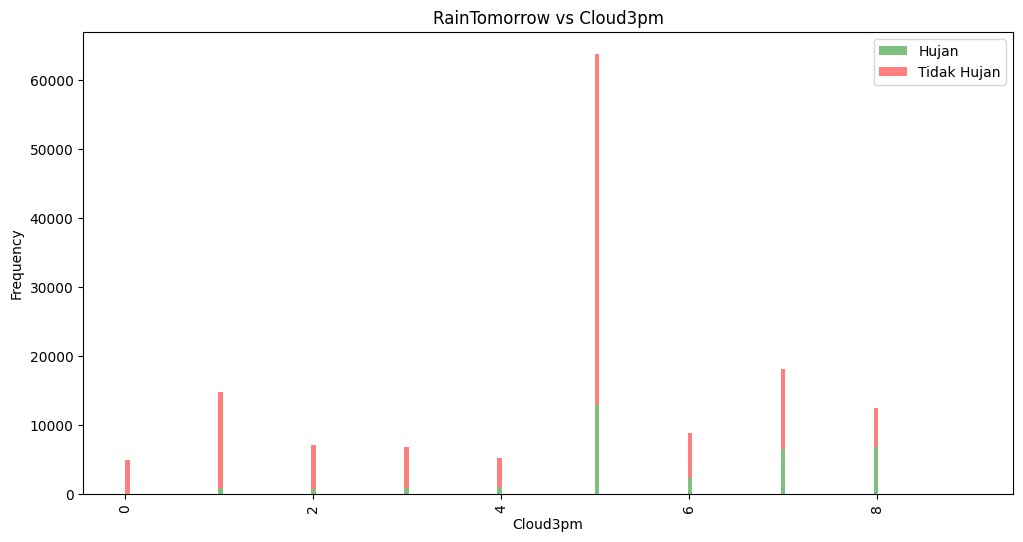

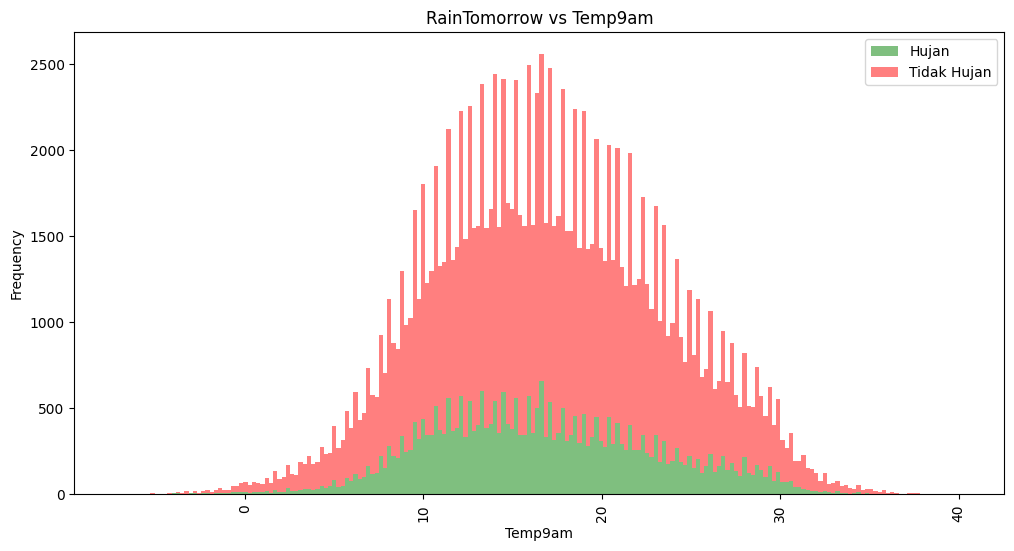

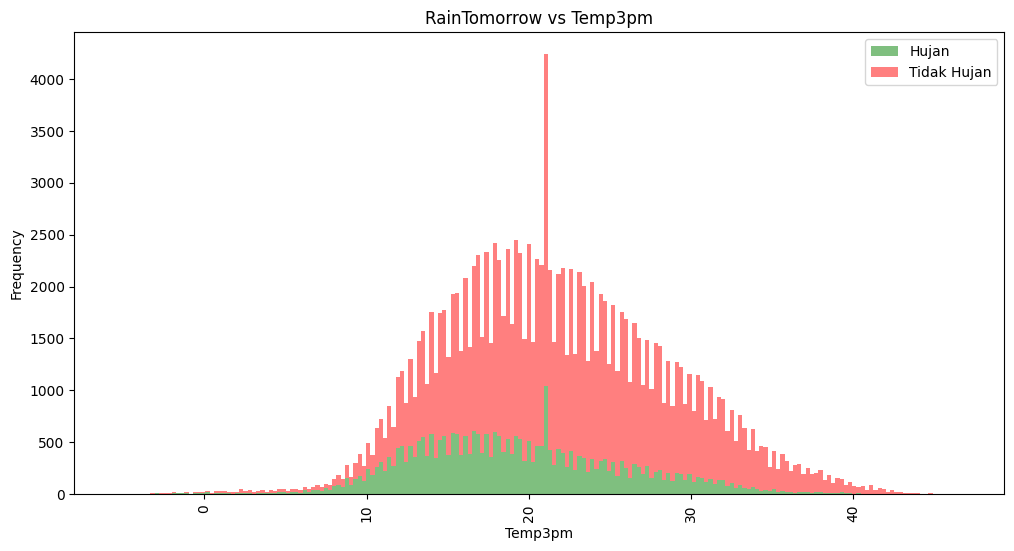

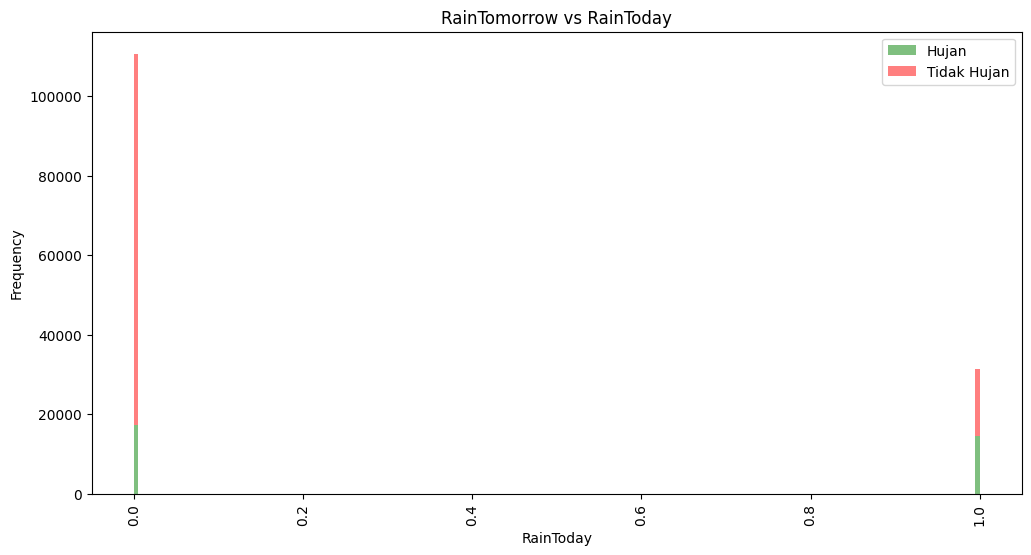

In [32]:
# RainTomorrow vs atribut numeric

numeric_columns = df_strategy.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns[:-1]
for attribute in numeric_columns:
    rain_today = df_strategy[df_strategy['RainTomorrow'] == 1]
    no_rain_today = df_strategy[df_strategy['RainTomorrow'] == 0]

    plt.figure(figsize=(12, 6))
    plt.hist([rain_today[attribute], no_rain_today[attribute]],
             bins=200,
             alpha=0.5,
             color=['green', 'red'],
             label=['Hujan', 'Tidak Hujan'],
             stacked=True)
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.title(f'RainTomorrow vs {attribute}')
    plt.xticks(rotation=90)
    plt.legend(labels=['Hujan', 'Tidak Hujan'])
    plt.show()

Histogram diatas untuk memvisualisasikan perbandingan atribut numerik dengan atribut target "RainTomorrow" dalam df_strategy. Sampel yang diprediksi sebagai "Hujan" besok (hijau) dan yang berisi sampel yang diprediksi sebagai "Tidak Hujan" besok (merah muda). Hal ini dapat membantu kami memahami sebaran atribut numerik dalam memprediksi cuaca, dan apakah ada perbedaan yang signifikan dalam sebaran atribut tersebut antara kedua kelompok. Output pada visualisasi ini dapat membantu kami dalam mengidentifikasi atribut numerik yang memiliki pengaruh kuat pada prediksi cuaca hujan besok dan membantu pemahaman lebih lanjut tentang hubungan atribut numerik dengan target prediksi.

# F. Data Prepocessing

## F.1 df_clear

### F.1.1 Check, Cleaning Outlier dengan Censoring (Winsorize)

In [33]:
# Memilih semua atribut kecuali paling akhir (RainTomorrow)

columns_to_winsorize = df_clear.iloc[:, :-1]

for column in columns_to_winsorize:
    df_clear[column] = winsorize(df_clear[column], limits=[0.05, 0.01])

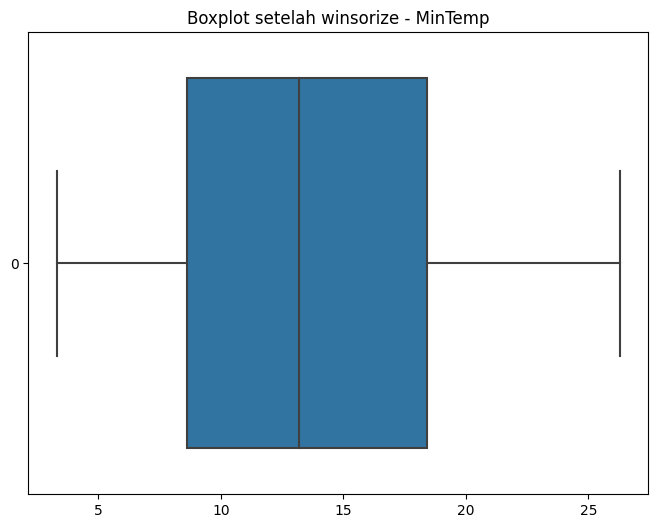

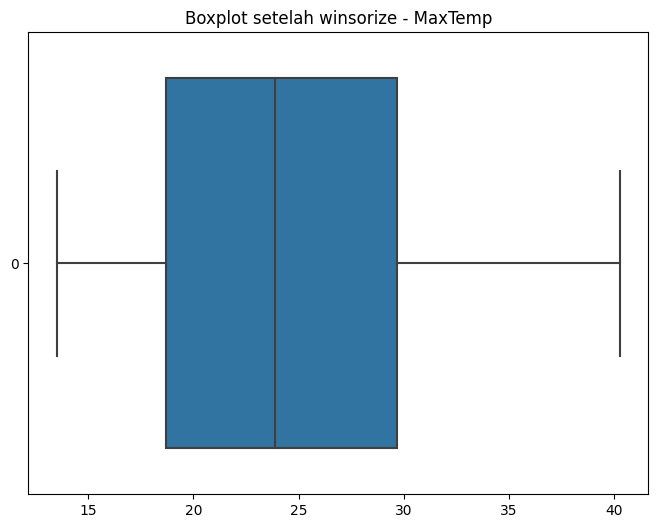

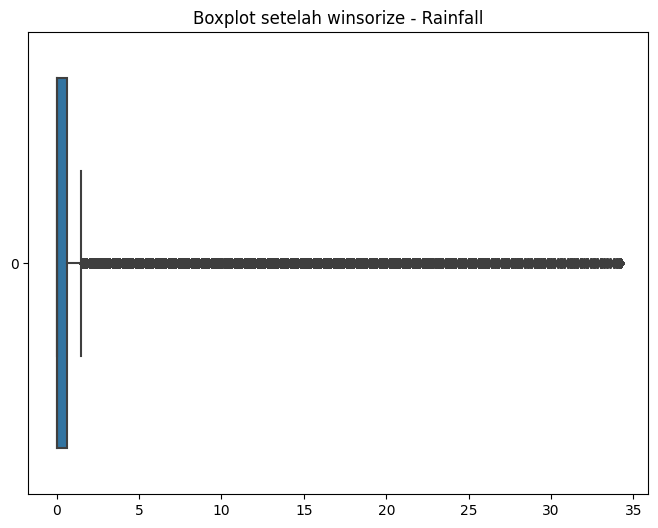

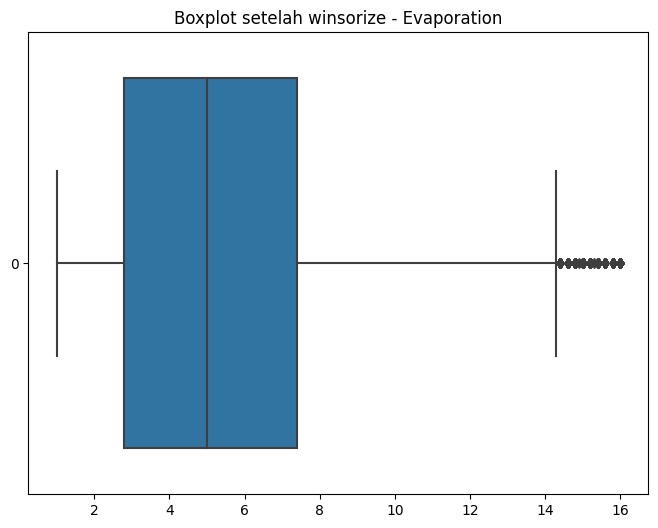

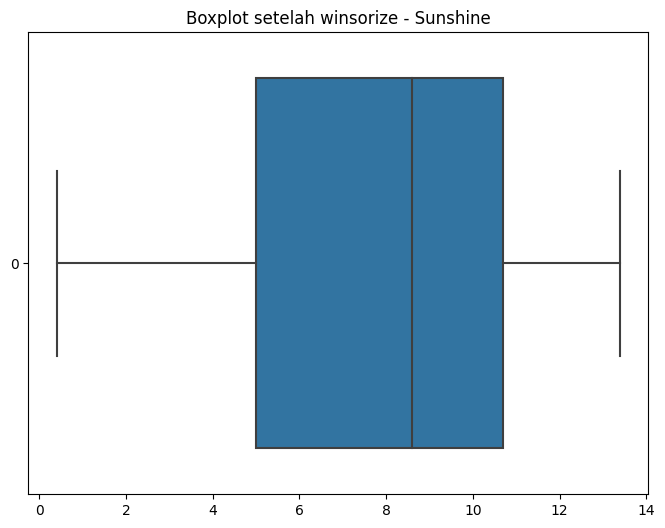

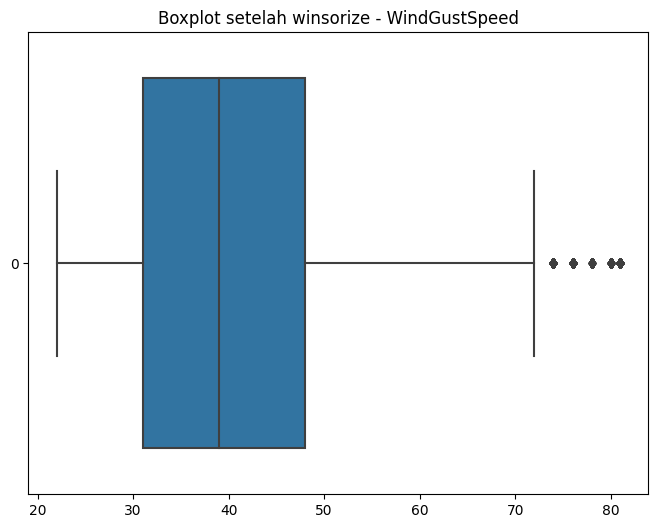

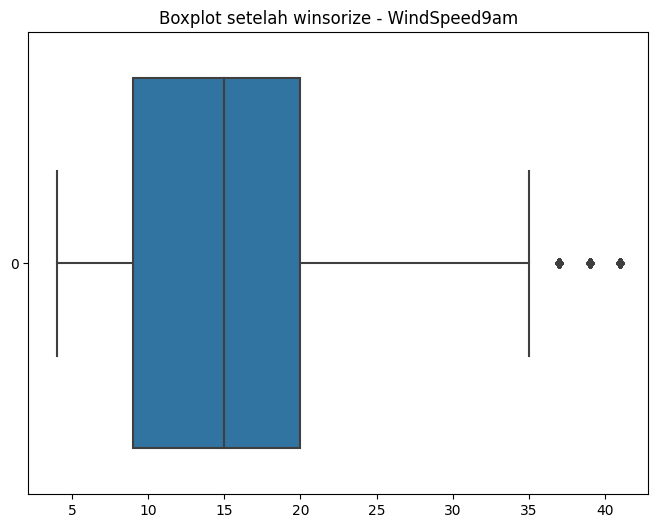

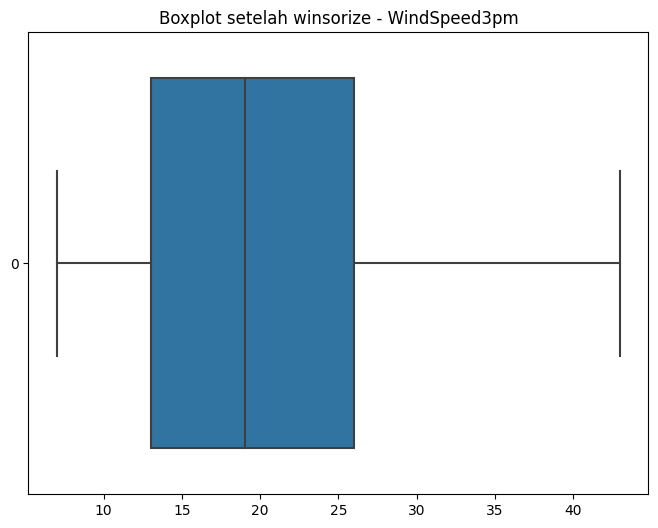

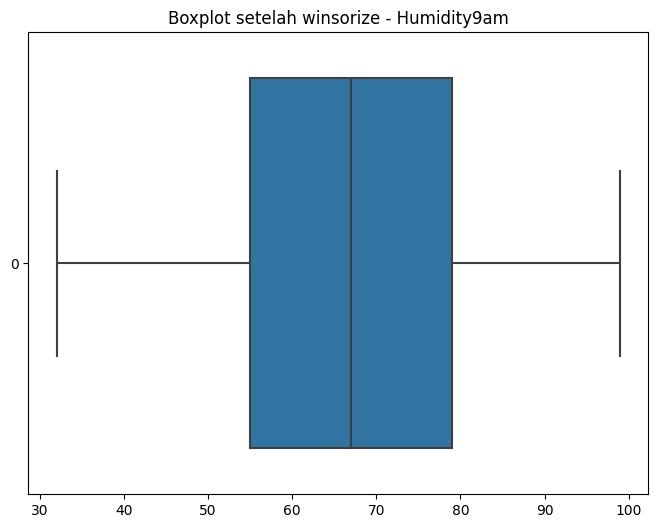

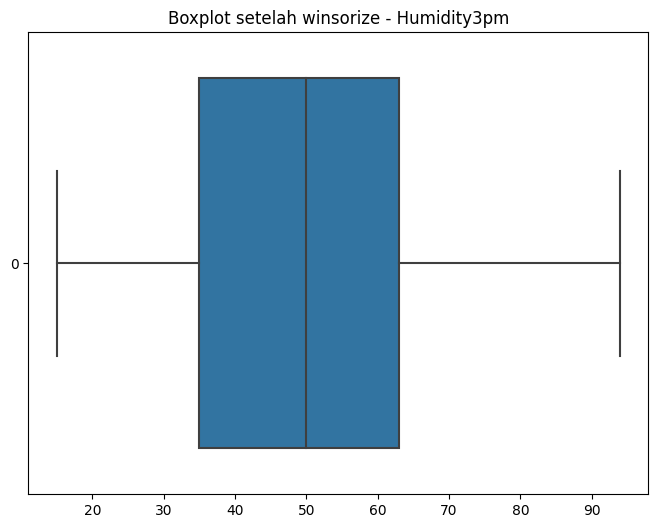

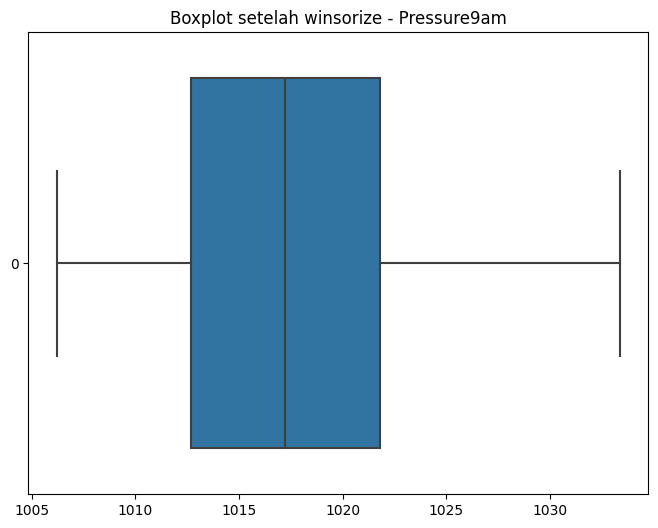

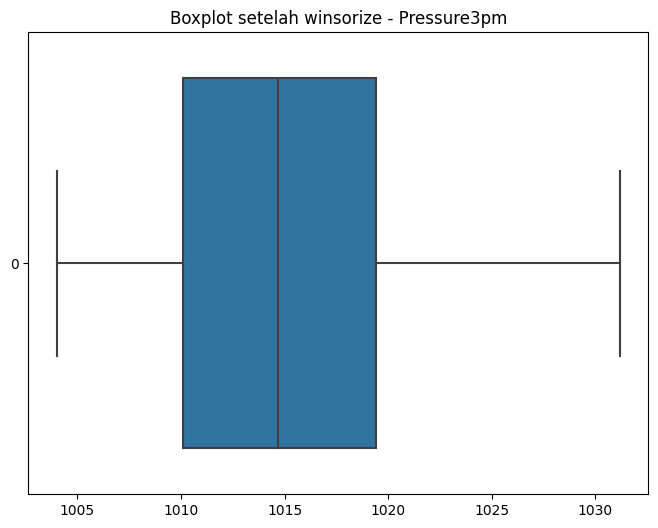

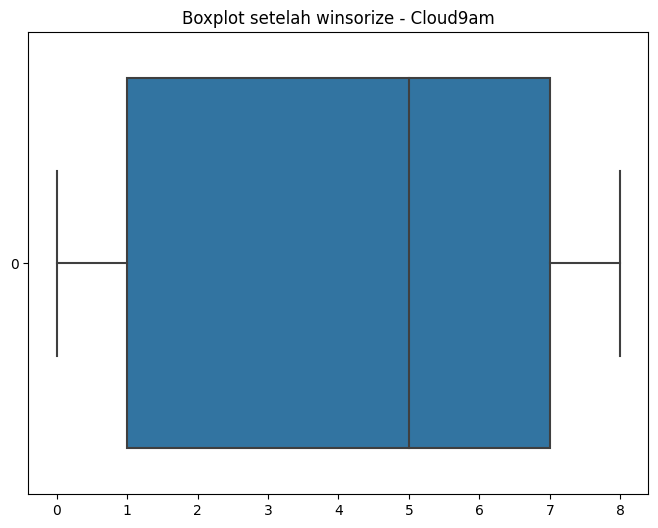

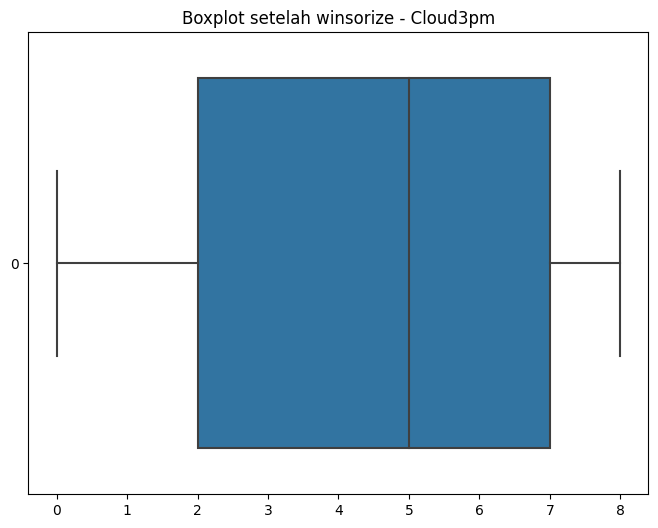

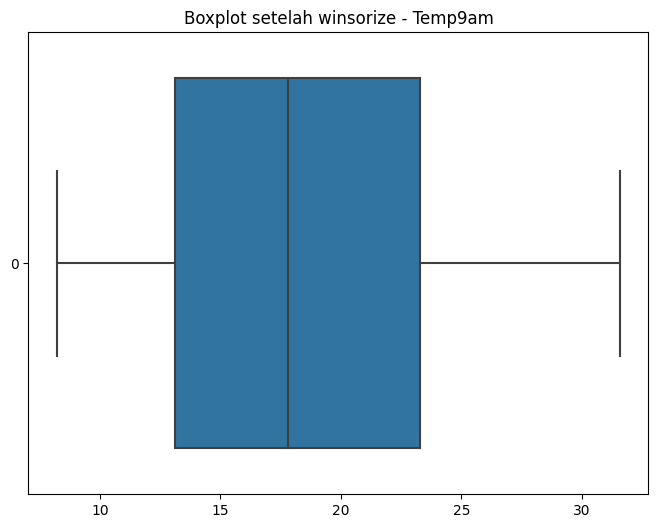

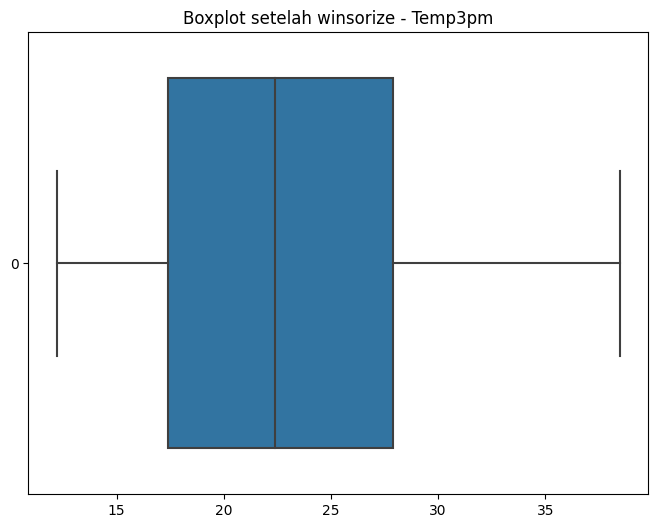

In [34]:
# Boxplot setelah diterapkan Censoring dengan Winsorize

temp_vis_attribute = df_clear.iloc[:, 0:-
                                   2].select_dtypes(include=['number']).columns

for column in temp_vis_attribute:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_clear[column], orient='h')
    plt.title(f'Boxplot setelah winsorize - {column}')
    plt.show()

Boxplot diatas untuk memvisualisasikan setiap atribut numerik, di mana kami dapat melihat perbedaan dalam sebaran data sebelum dan setelah penerapan Winsorize (mengatasi outlier dalam data). Dengan menggunakan teknik ini, kami dapat mengidentifikasi bahwa outlier telah dihilangkan atau dibatasi oleh batasan yang ditentukan (0.05, 0.01), yang membantu membersihkan data sebelum melanjutkan analisis lebih lanjut. Dengan membersihkan outlier, analisis data yang dilakukan kemungkinan akan menjadi lebih akurat.

### F.1.2 Cardinality

In [35]:
attribute = df_clear.columns
temp_attribute = []

for col in attribute:
    temp = len(df_clear[col].unique())
    temp_attribute.append(temp)

data = {'Attribute': attribute, 'Jumlah Unique Value': temp_attribute}
temp_cardinality = pd.DataFrame(data)

temp_cardinality

Attribute  Jumlah Unique Value
0         MinTemp                  231
1         MaxTemp                  269
2        Rainfall                  195
3     Evaporation                  139
4        Sunshine                  131
5     WindGustDir                   16
6   WindGustSpeed                   33
7      WindDir9am                   16
8      WindDir3pm                   16
9    WindSpeed9am                   21
10   WindSpeed3pm                   20
11    Humidity9am                   68
12    Humidity3pm                   80
13    Pressure9am                  273
14    Pressure3pm                  273
15       Cloud9am                    9
16       Cloud3pm                    9
17        Temp9am                  235
18        Temp3pm                  264
19      RainToday                    2
20   RainTomorrow                    2

### F.1.3 LabelEncoder()

In [36]:
# Sebelum

df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustDir    56420 non-null  object 
 6   WindGustSpeed  56420 non-null  float64
 7   WindDir9am     56420 non-null  object 
 8   WindDir3pm     56420 non-null  object 
 9   WindSpeed9am   56420 non-null  float64
 10  WindSpeed3pm   56420 non-null  float64
 11  Humidity9am    56420 non-null  float64
 12  Humidity3pm    56420 non-null  float64
 13  Pressure9am    56420 non-null  float64
 14  Pressure3pm    56420 non-null  float64
 15  Cloud9am       56420 non-null  float64
 16  Cloud3pm       56420 non-null  float64
 17  Temp9am        56420 non-null  float64
 18  Temp3p

In [37]:
for attribute in df_clear:
    df_clear[attribute] = LabelEncoder().fit_transform(
        df_clear[attribute])

In [38]:
# Sesudah

df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MinTemp        56420 non-null  int64
 1   MaxTemp        56420 non-null  int64
 2   Rainfall       56420 non-null  int64
 3   Evaporation    56420 non-null  int64
 4   Sunshine       56420 non-null  int64
 5   WindGustDir    56420 non-null  int64
 6   WindGustSpeed  56420 non-null  int64
 7   WindDir9am     56420 non-null  int64
 8   WindDir3pm     56420 non-null  int64
 9   WindSpeed9am   56420 non-null  int64
 10  WindSpeed3pm   56420 non-null  int64
 11  Humidity9am    56420 non-null  int64
 12  Humidity3pm    56420 non-null  int64
 13  Pressure9am    56420 non-null  int64
 14  Pressure3pm    56420 non-null  int64
 15  Cloud9am       56420 non-null  int64
 16  Cloud3pm       56420 non-null  int64
 17  Temp9am        56420 non-null  int64
 18  Temp3pm        56420 non-null  int64
 19  Rain

### F.1.4 Pemilihan attribut dan visualisasi Correlation, Covariance

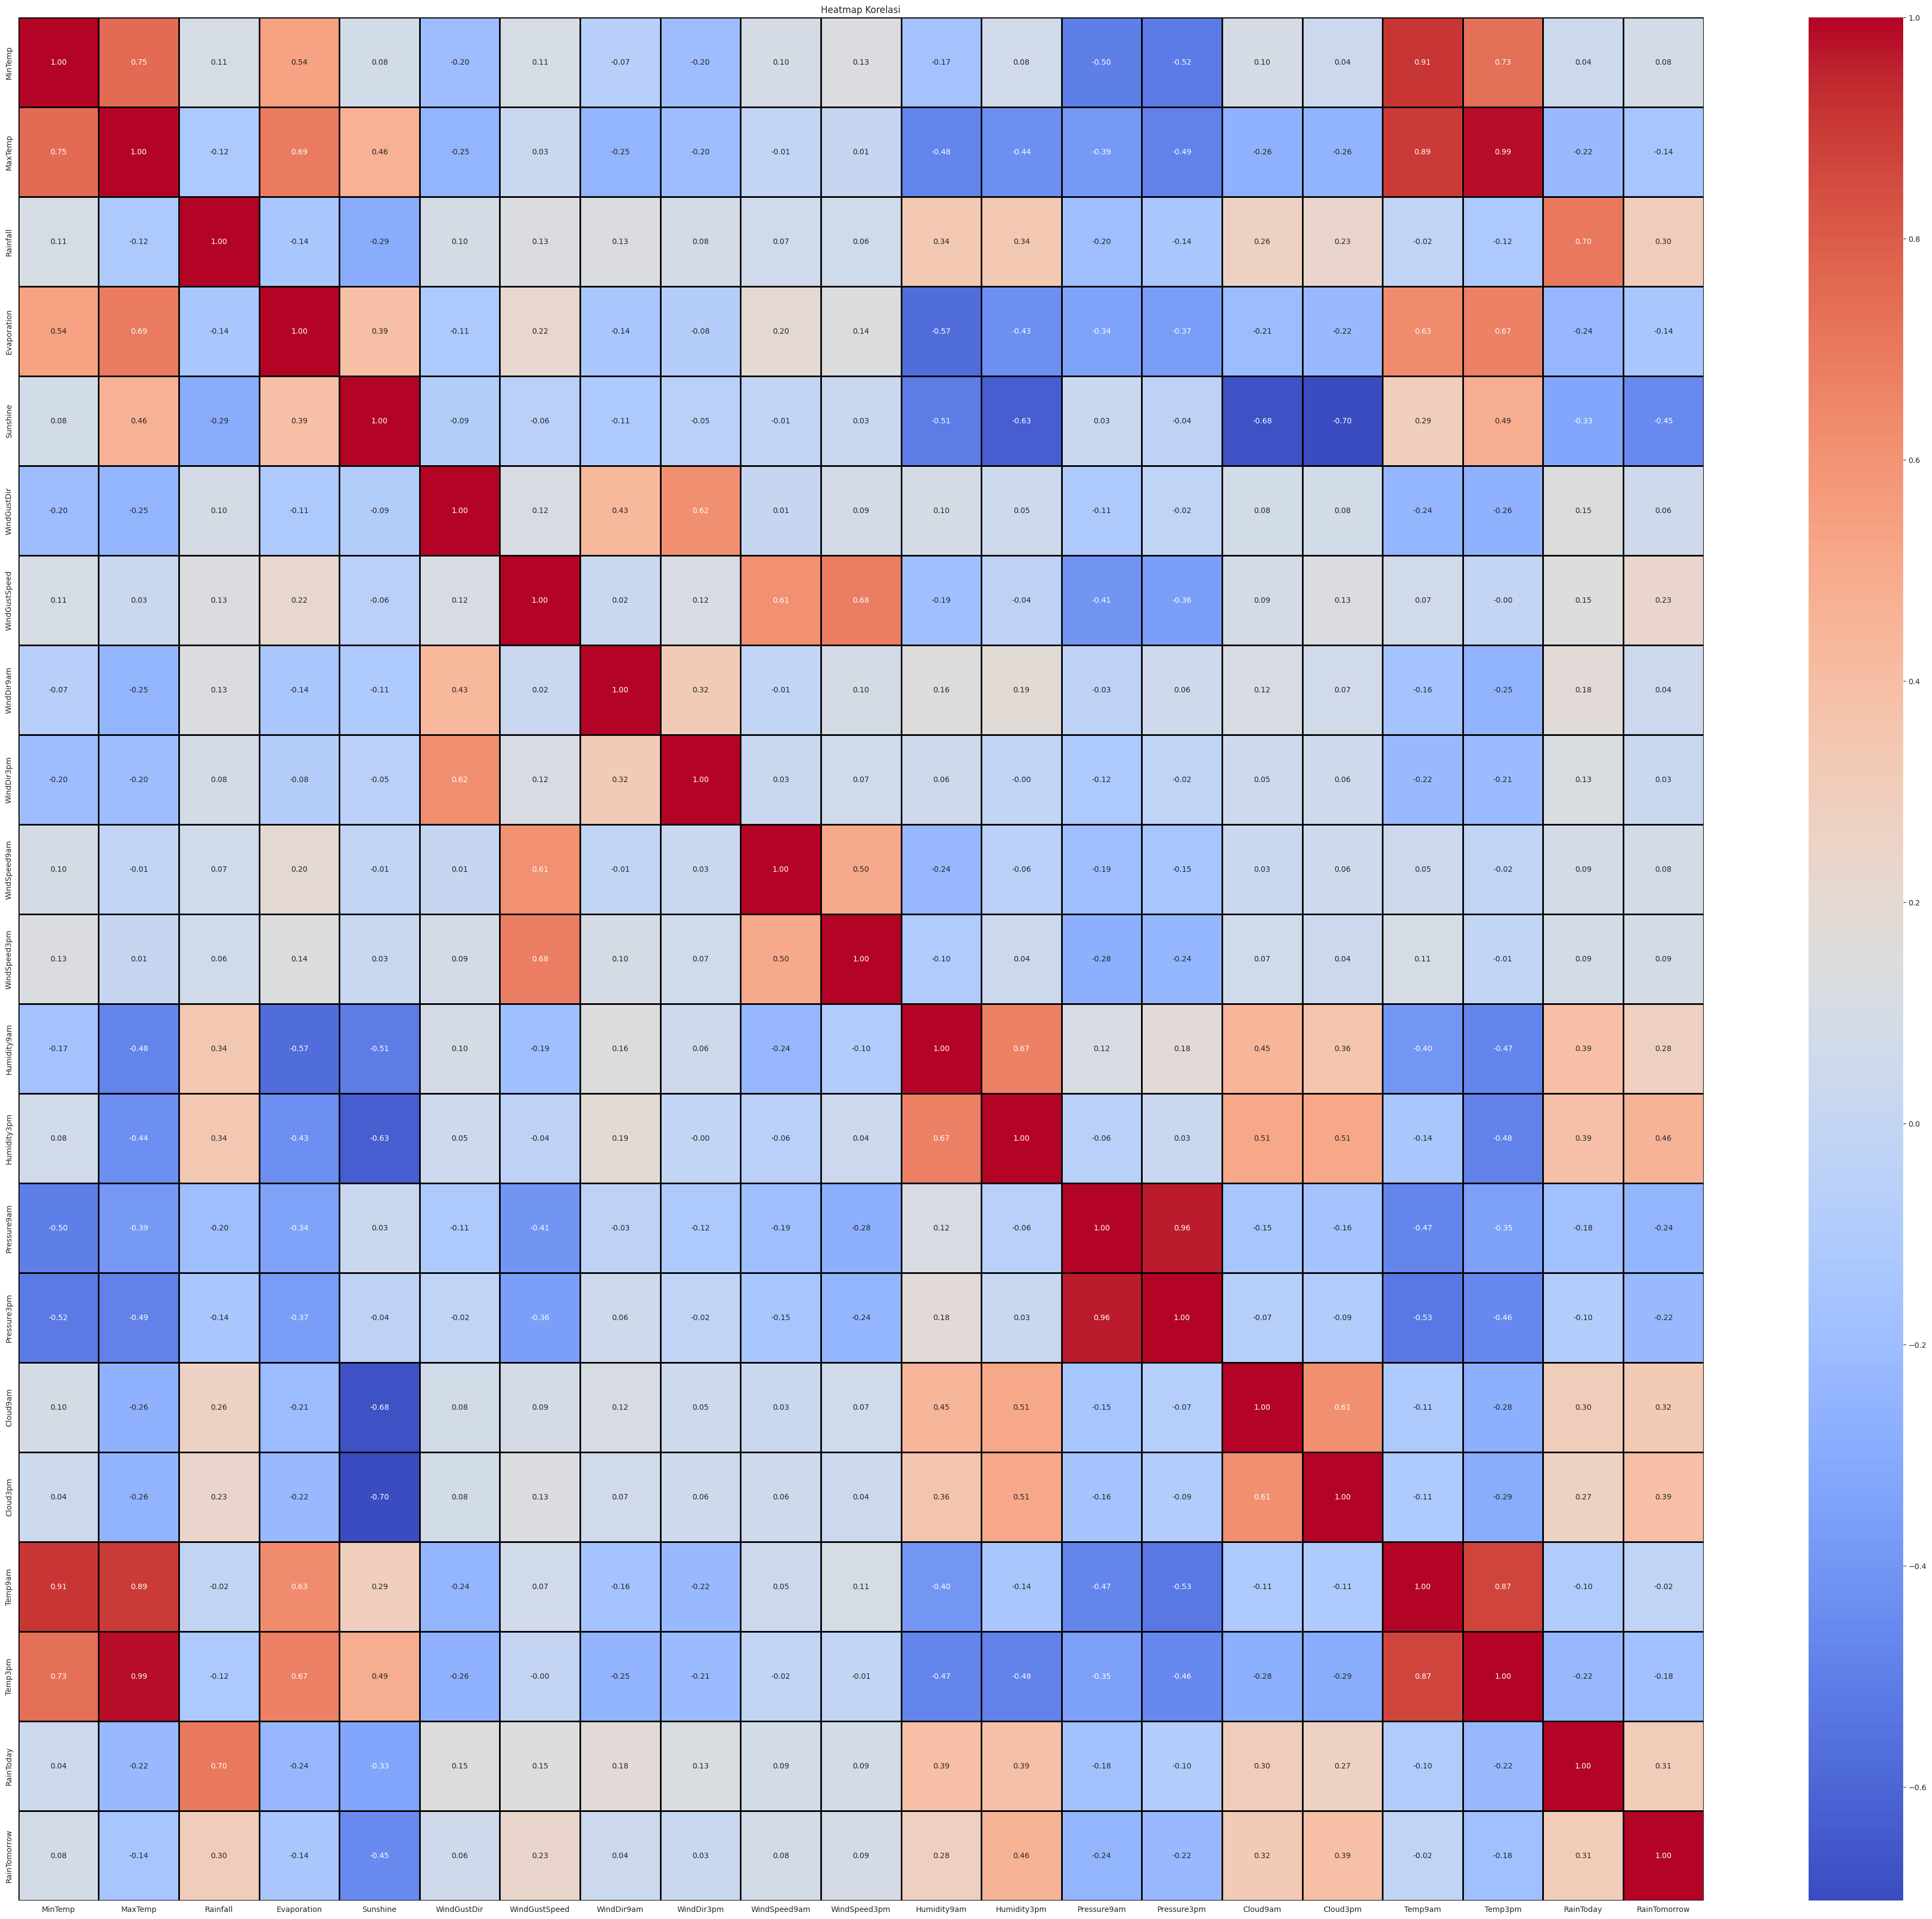

In [39]:
# Membuat Heatmap Correlation attribute

correlation_matrix = df_clear.corr()

sns.set_style("whitegrid")

plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=1, linecolor='black')

plt.title("Heatmap Korelasi")
plt.show()

1. Heatmap diatas untuk memvisualisasikan bagaimana matriks berkorelasi untuk mengukur hubungan antar atribut numerik dalam df_clear.
2. Warna yang digunakan menggambarkan tingkat korelasi, dan setiap sel diisi dengan nilai korelasi yang sesuai.
3. Menggunakan warna merah untuk korelasi positif dan biru untuk korelasi negatif. Semakin kuat korelasi, semakin intens warnanya.

Dengan begitu, dapat membantu kami memahami sejauh mana atribut saling berkaitan, membantu dalam pemilihan atribut dan perumusan hipotesis dalam analisis data.

Setiap sel pada heatmap berisi nilai korelasi antara dua variabel. Nilai korelasi berkisar antara -1 hingga 1, di mana:

- Nilai positif mendekati 1 menunjukkan korelasi positif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang sama.
- Nilai negatif mendekati -1 menunjukkan korelasi negatif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang berlawanan.
- Nilai mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi antara dua variabel.

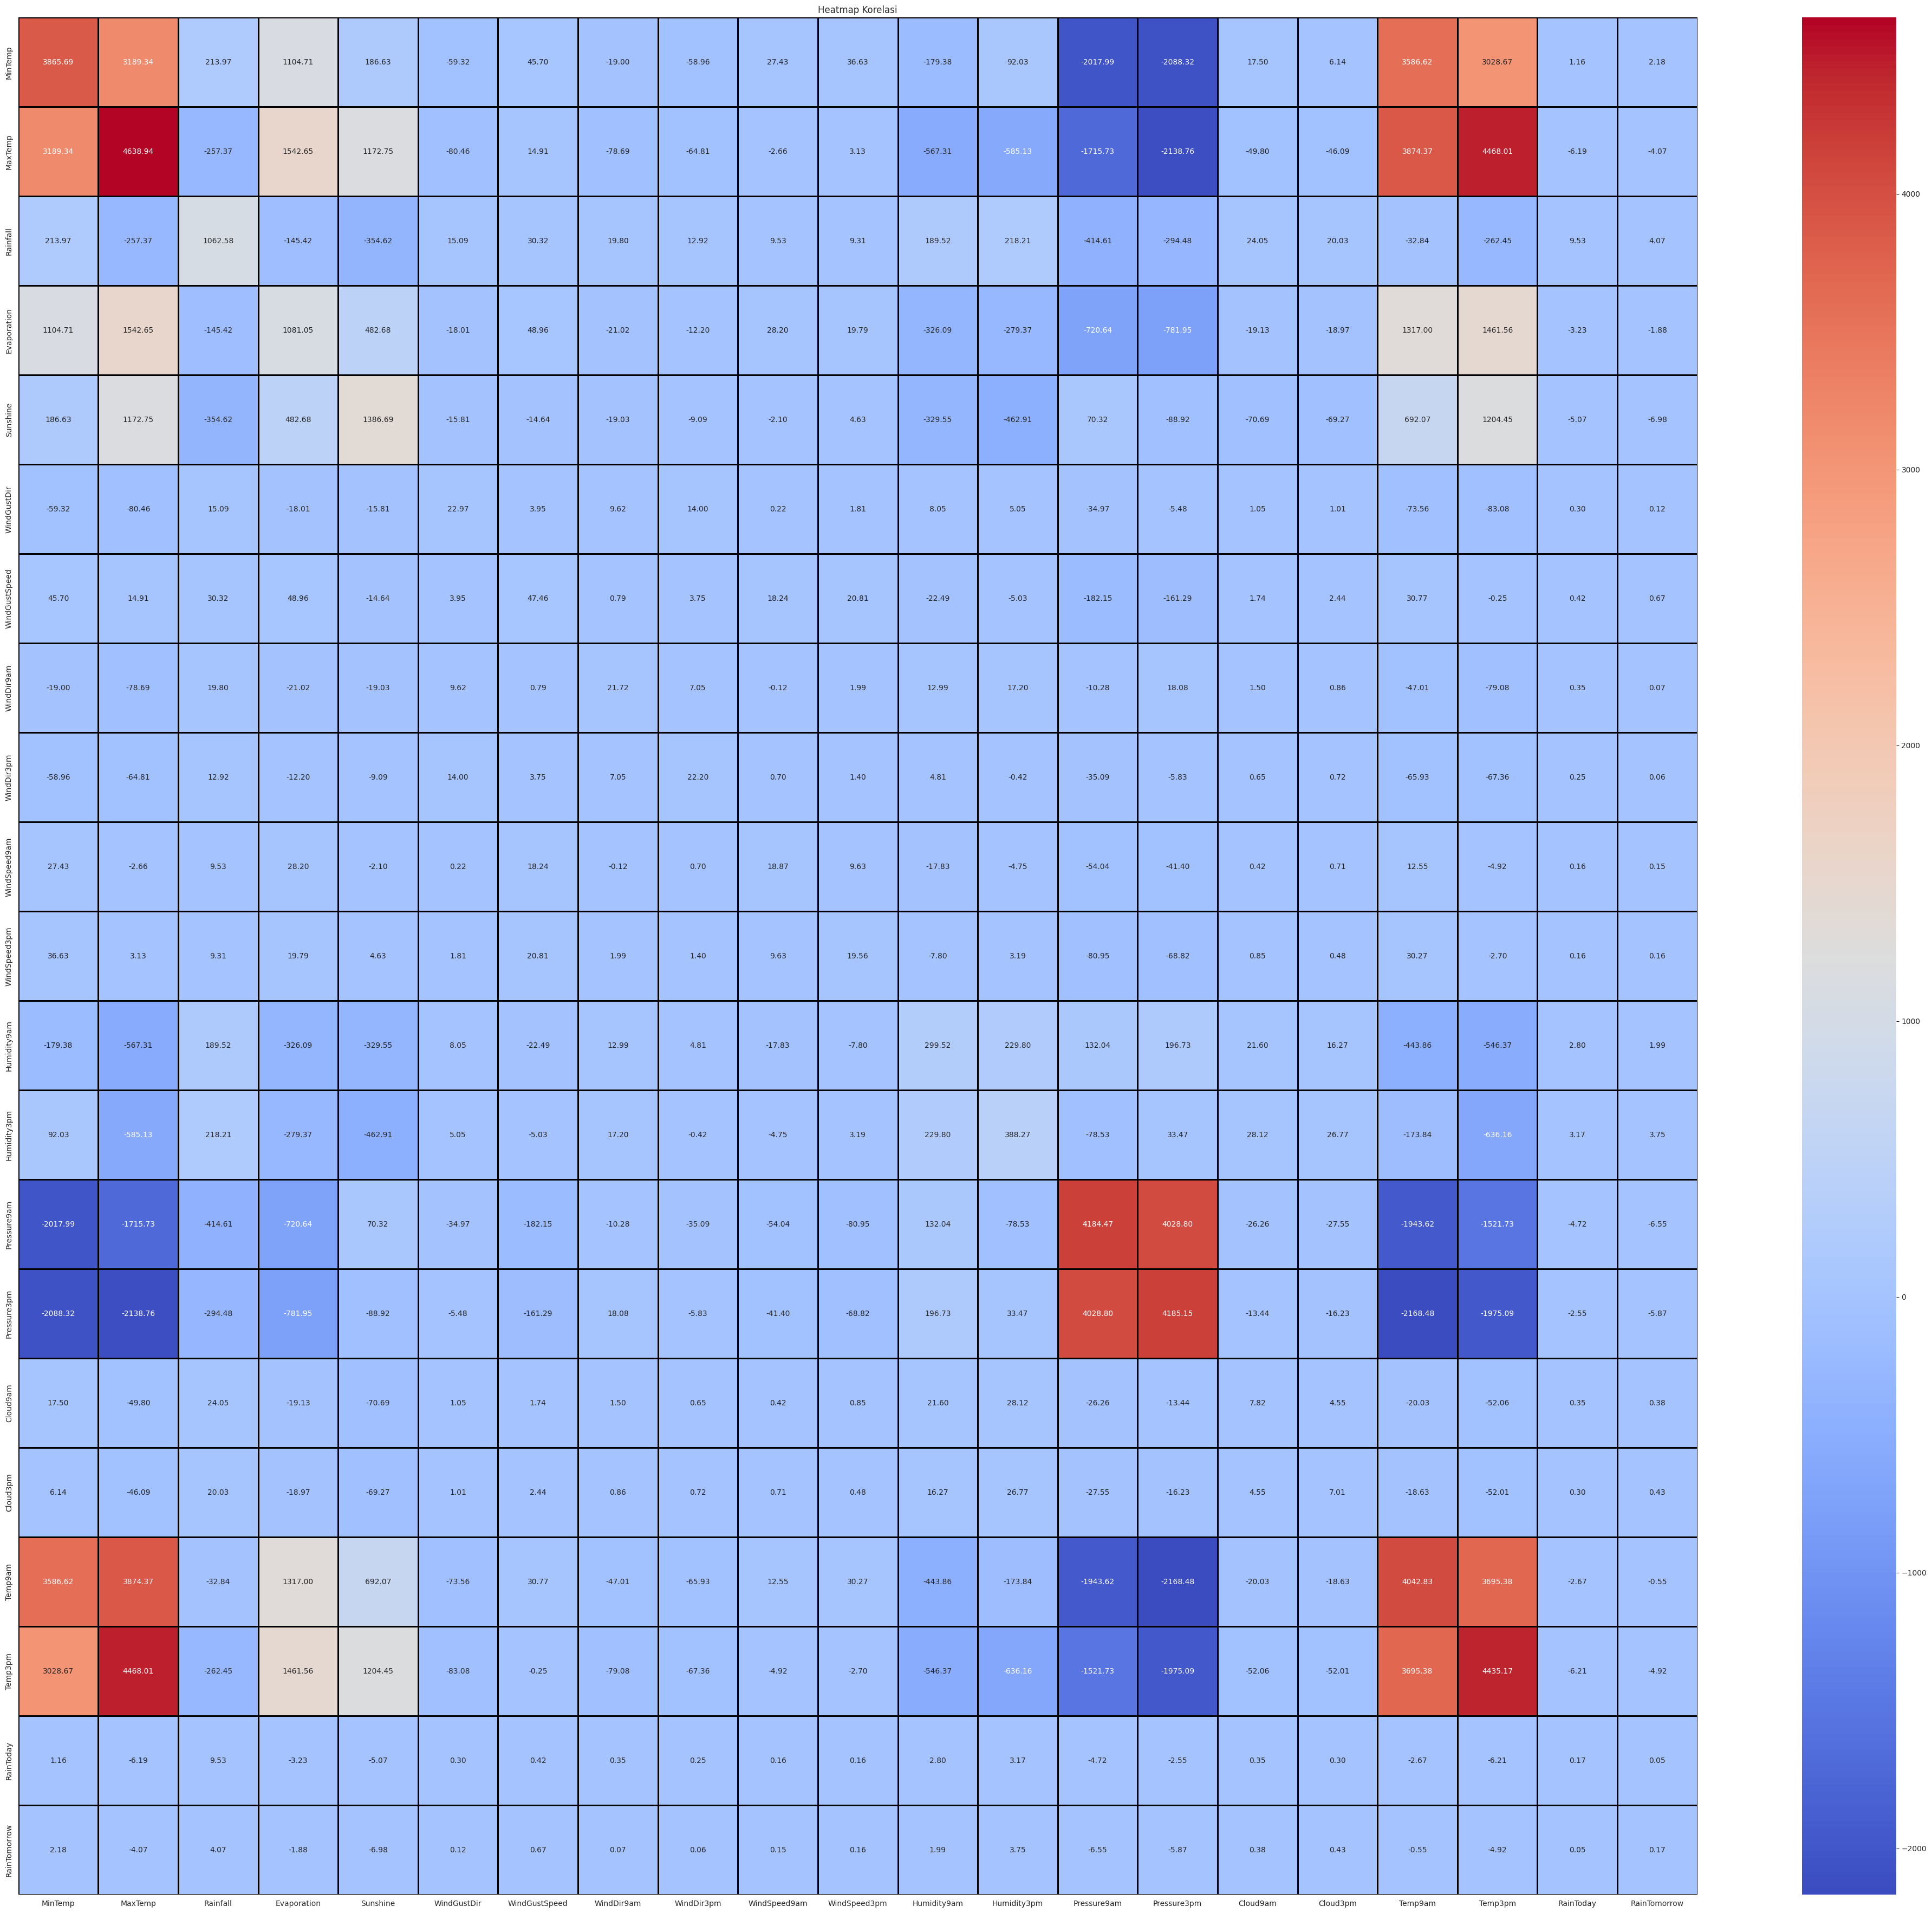

In [40]:
# Membuat Heatmap Covariance

correlation_matrix = df_clear.cov()

sns.set_style("whitegrid")

plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=1, linecolor='black')

plt.title("Heatmap Korelasi")
plt.show()

1. Heatmap diatas menghasilkan matriks kovarian yang mengukur hubungan kovarian antar atribut numerik df_clear
2. Berbeda dengan heatmap sebelumnya, sekarang dapat terlihat lebih jelas atribut-atribut yang memang memiliki kovarian.

Dengan ini dapat membantu kami memahami sejauh mana atribut memiliki kovarian yang tinggi atau rendah, yang berguna dalam analisis data dan pengambilan keputusan dalam pemilihan atribut. Kovarian itu sendiri untuk mengukur hubungan linear antara dua atribut, sementara korelasi mengukur hubungan linear dan non-linear.

### F.1.5 train_test_split()

In [41]:
# Pisahkan atribut prediktor (x) dan target (y)

x = df_clear.drop(columns=['RainTomorrow'])
y = df_clear['RainTomorrow']

In [42]:
# Train-test split 80% train dan 20% Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### F.1.6 Smote()

In [43]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

### F.1.7 StandardScaler()

In [44]:
# Standarisasi atribut prediktor (x)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
print('x train (baris,kolom) : ', x_train.shape)
print('x test  (baris,kolom) : ', x_test.shape)
print('\ny train (baris,kolom) : ', y_train.shape)
print('y test  (baris,kolom) : ', y_test.shape)

x train (baris,kolom) :  (70448, 20)
x test  (baris,kolom) :  (11284, 20)

y train (baris,kolom) :  (70448,)
y test  (baris,kolom) :  (11284,)


## F.2 df_strategy

### F.2.1 Check, Cleaning Outlier dengan Censoring (Winsorize)

In [46]:
# Memilih semua atribut kecuali paling akhir (RainTomorrow)

columns_to_winsorize = df_strategy.iloc[:, :-1]

for column in columns_to_winsorize:
    df_strategy[column] = winsorize(df_strategy[column], limits=[0.05, 0.01])

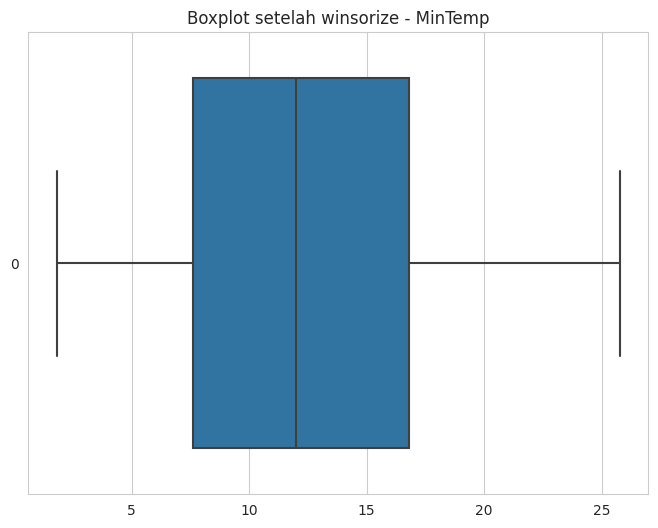

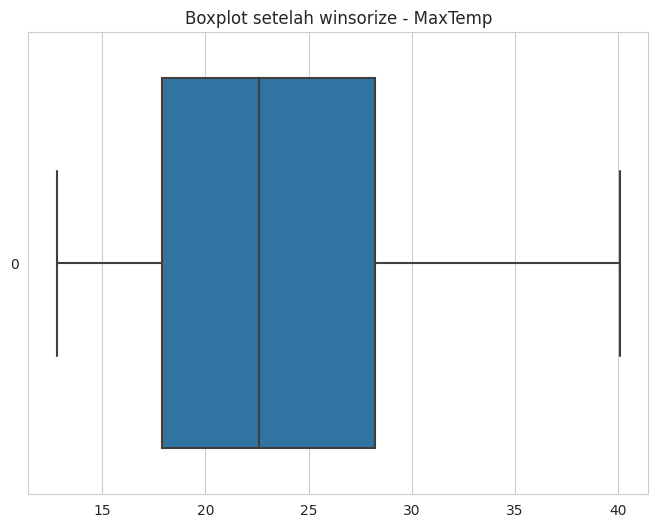

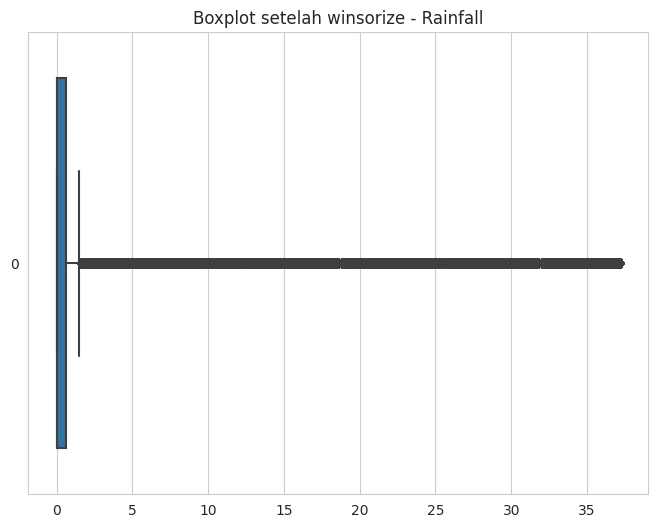

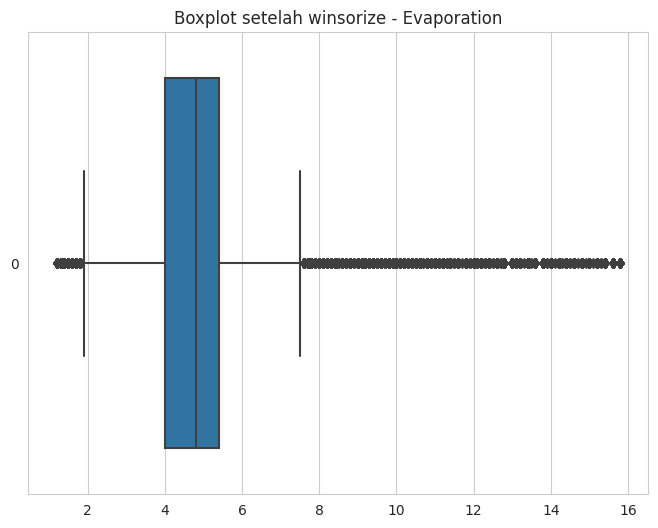

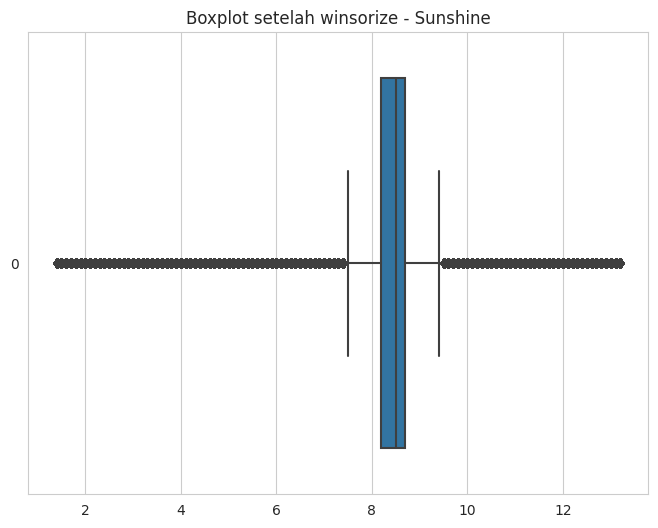

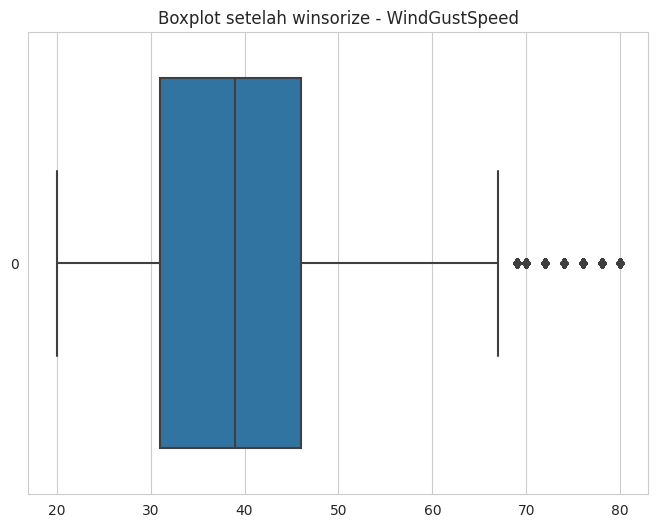

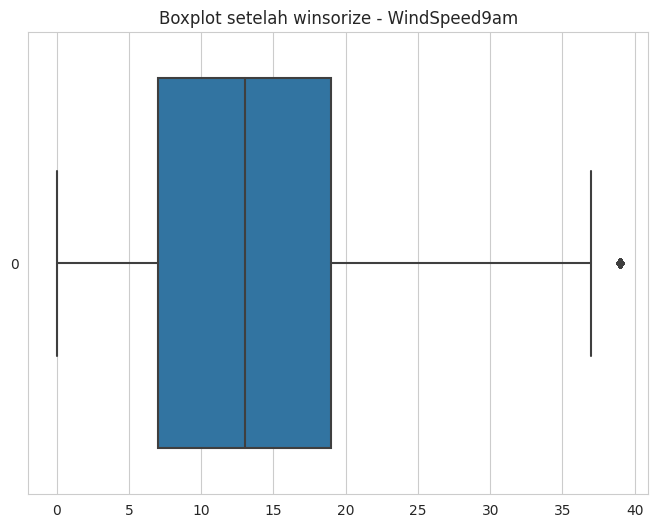

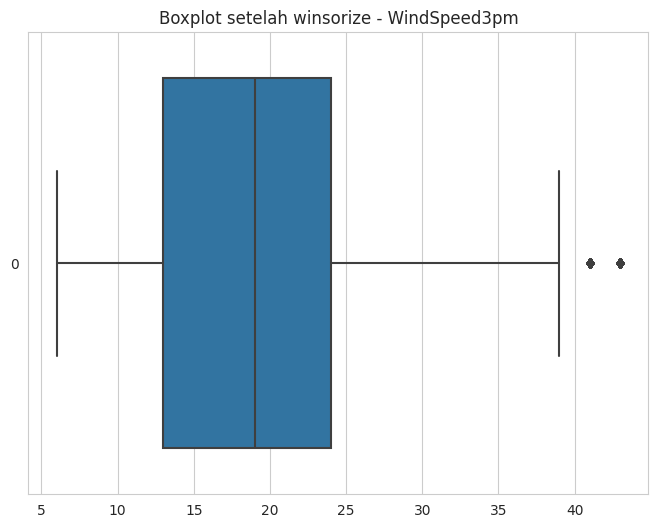

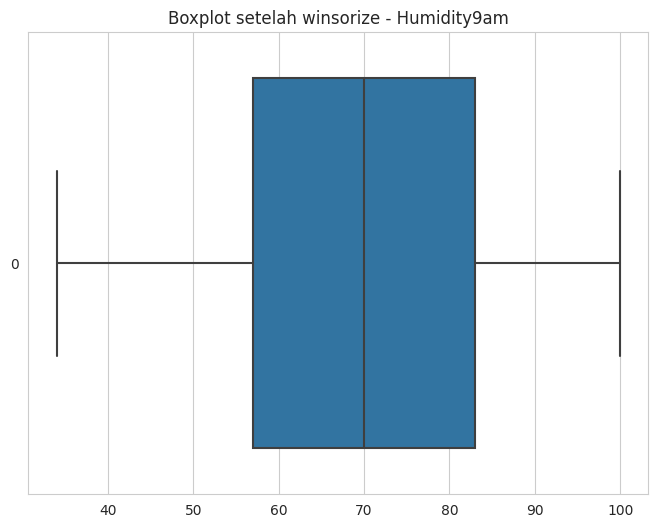

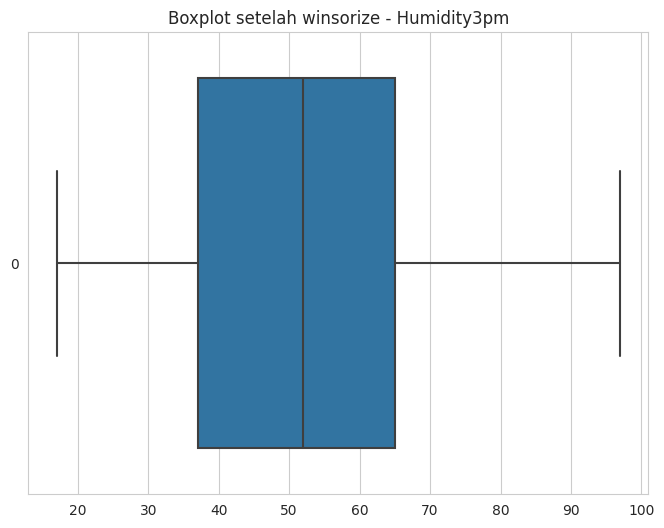

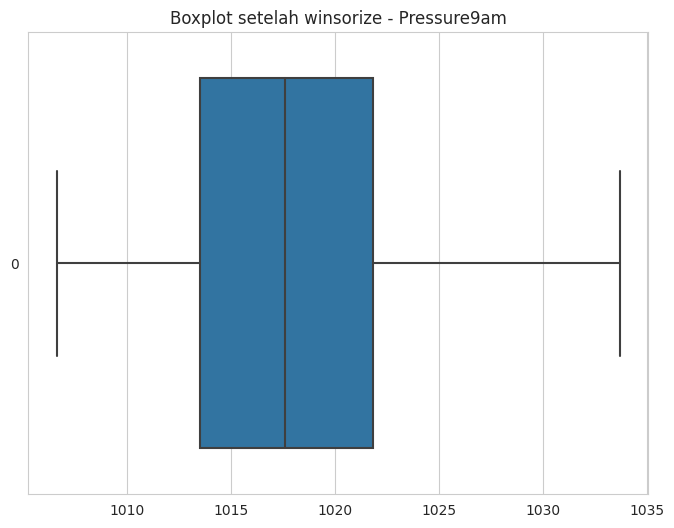

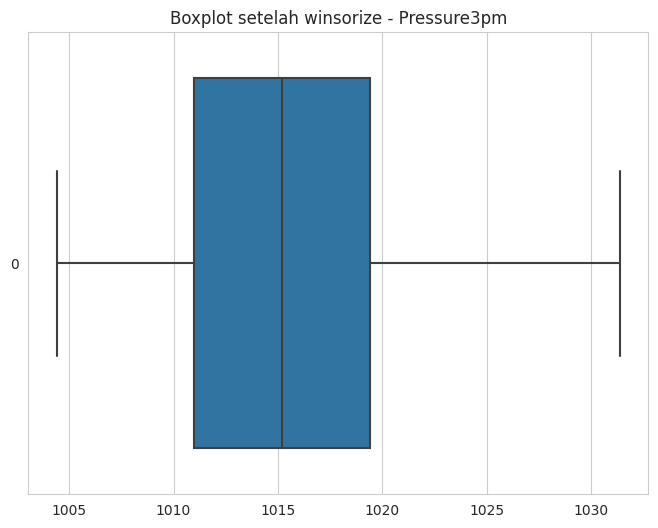

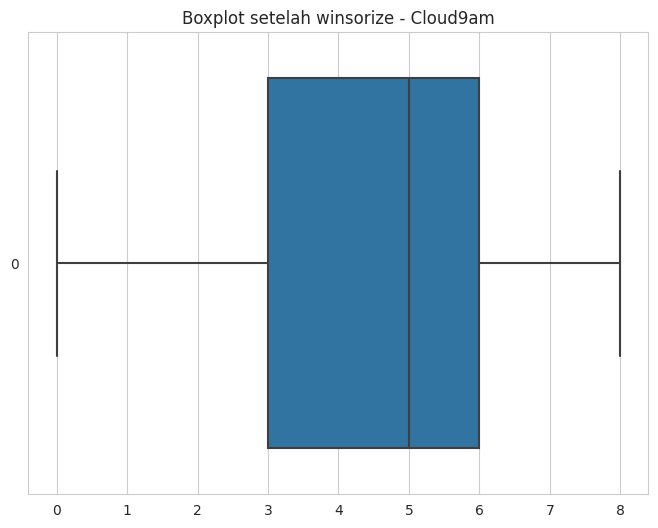

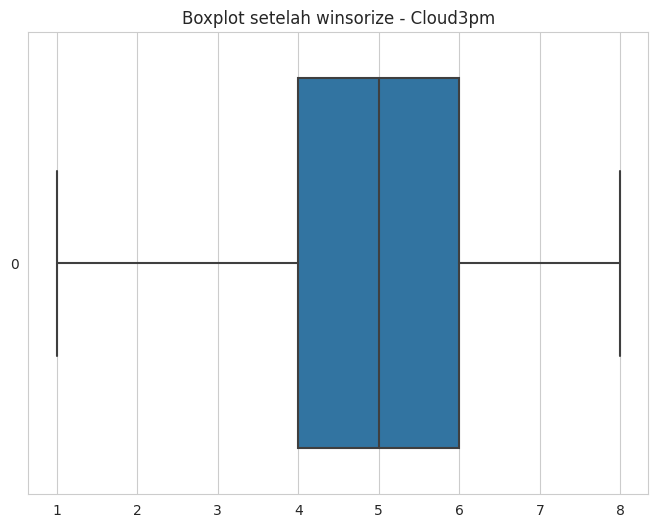

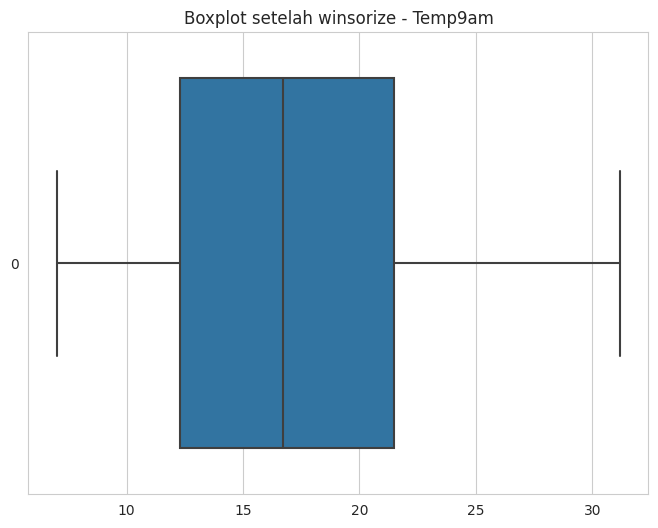

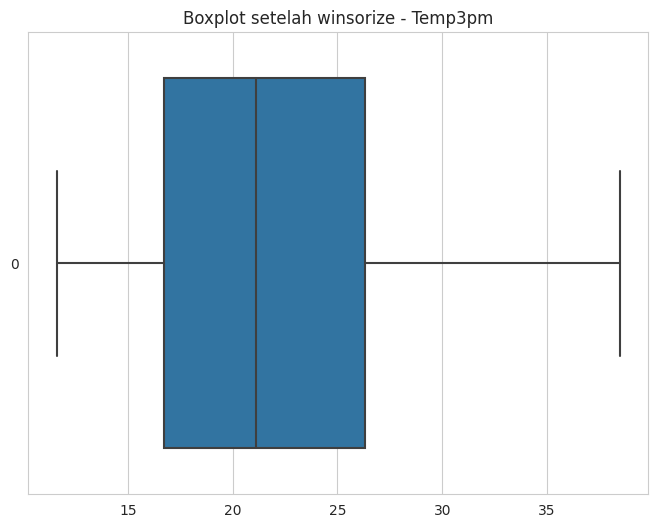

In [47]:
# Boxplot setelah diterapkan Censoring dengan Winsorize

temp_vis_attribute = df_strategy.iloc[:, 0:-
                                      2].select_dtypes(include=['number']).columns

for column in temp_vis_attribute:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_strategy[column], orient='h')
    plt.title(f'Boxplot setelah winsorize - {column}')
    plt.show()

Boxplot diatas untuk memvisualisasikan setiap atribut numerik. Boxplot ini menunjukkan sebaran data setelah pembersihan outlier dengan Winsorize. Boxplot memberikan informasi tentang sebaran nilai-nilai dalam atribut, termasuk nilai median, quartil, dan juga mendeteksi apakah masih ada nilai-nilai yang ekstrem (outlier) yang tidak termasuk dalam batasan Winsorize.

Visualisasi ini membantu kami memahami dampak dari pembersihan outlier terhadap distribusi data dalam atribut-atribut numerik di dalam df_strategy.

### F.2.2 Cardinality

In [48]:
attribute = df_strategy.columns
temp_attribute = []

for col in attribute:
    temp = len(df_strategy[col].unique())
    temp_attribute.append(temp)

data = {'Attribute': attribute, 'Jumlah Unique Value': temp_attribute}
temp_cardinality = pd.DataFrame(data)

temp_cardinality

Attribute  Jumlah Unique Value
0         MinTemp                  241
1         MaxTemp                  274
2        Rainfall                  272
3     Evaporation                  143
4        Sunshine                  119
5     WindGustDir                   16
6   WindGustSpeed                   33
7      WindDir9am                   16
8      WindDir3pm                   16
9    WindSpeed9am                   22
10   WindSpeed3pm                   21
11    Humidity9am                   67
12    Humidity3pm                   81
13    Pressure9am                  272
14    Pressure3pm                  274
15       Cloud9am                    9
16       Cloud3pm                    8
17        Temp9am                  243
18        Temp3pm                  270
19      RainToday                    2
20   RainTomorrow                    2

### F.2.3 LabelEncoder()

In [49]:
# Sebelum

df_strategy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        142193 non-null  float64
 1   MaxTemp        142193 non-null  float64
 2   Rainfall       142193 non-null  float64
 3   Evaporation    142193 non-null  float64
 4   Sunshine       142193 non-null  float64
 5   WindGustDir    142193 non-null  object 
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  object 
 8   WindDir3pm     142193 non-null  object 
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  Pressure3pm    142193 non-null  float64
 15  Cloud9am       142193 non-null  float64
 16  Cloud3pm       142193 non-null  float64
 17  Temp9am        142193 non-null  fl

In [50]:
for attribute in df_strategy:
    df_strategy[attribute] = LabelEncoder().fit_transform(
        df_strategy[attribute])

In [51]:
# Sesudah

df_strategy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   MinTemp        142193 non-null  int64
 1   MaxTemp        142193 non-null  int64
 2   Rainfall       142193 non-null  int64
 3   Evaporation    142193 non-null  int64
 4   Sunshine       142193 non-null  int64
 5   WindGustDir    142193 non-null  int64
 6   WindGustSpeed  142193 non-null  int64
 7   WindDir9am     142193 non-null  int64
 8   WindDir3pm     142193 non-null  int64
 9   WindSpeed9am   142193 non-null  int64
 10  WindSpeed3pm   142193 non-null  int64
 11  Humidity9am    142193 non-null  int64
 12  Humidity3pm    142193 non-null  int64
 13  Pressure9am    142193 non-null  int64
 14  Pressure3pm    142193 non-null  int64
 15  Cloud9am       142193 non-null  int64
 16  Cloud3pm       142193 non-null  int64
 17  Temp9am        142193 non-null  int64
 18  Temp3pm        142193 non-nul

### F.2.4 Pemilihan attribut dan visualisasi Correlation, Covariance

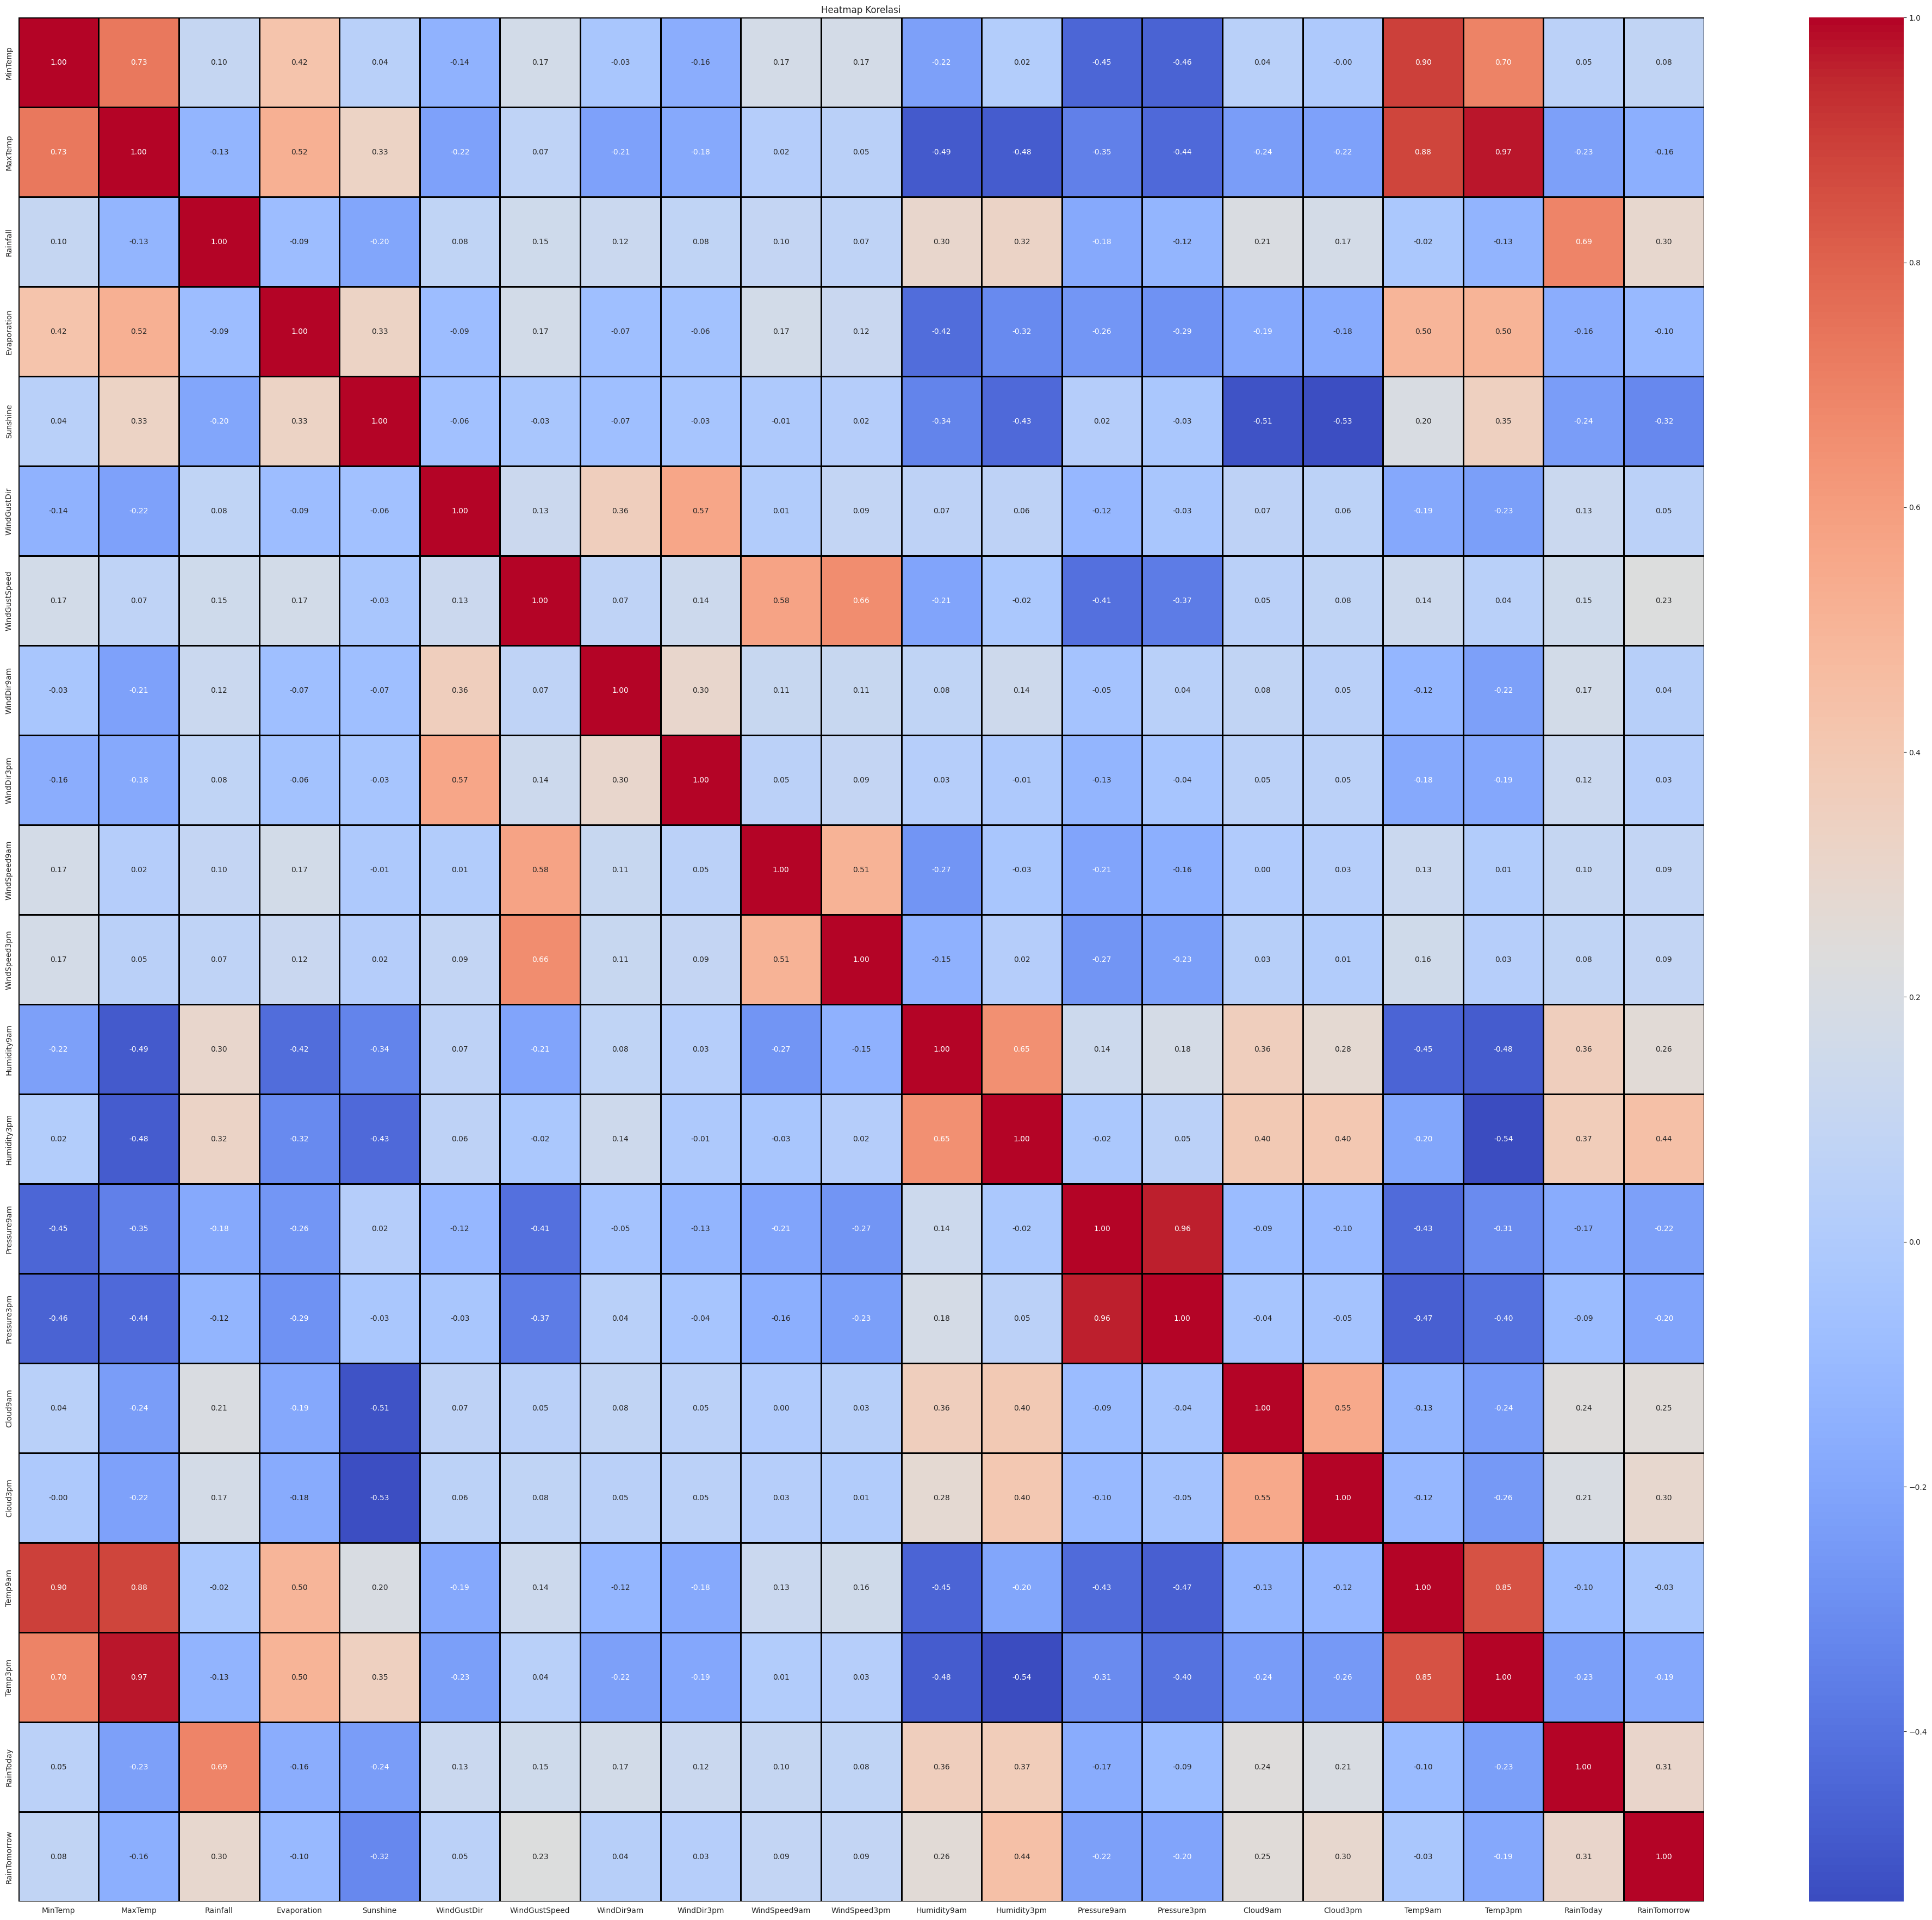

In [52]:
# Membuat Heatmap Correlation attribute

correlation_matrix = df_strategy.corr()

sns.set_style("whitegrid")

plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=1, linecolor='black')

plt.title("Heatmap Korelasi")
plt.show()

1. Heatmap diatas untuk memvisualisasikan matriks korelasi. Warna yang lebih terang mengindikasikan korelasi yang lebih kuat antara atribut.

Visualisasi ini membantu kami untuk memahami hubungan dan interaksi antara atribut-atribut dalam dataset. Informasi ini dapat digunakan untuk pemilihan atribut yang paling relevan untuk analisis dan pemodelan lebih lanjut.

Setiap sel pada heatmap berisi nilai korelasi antara dua variabel. Nilai korelasi berkisar antara -1 hingga 1, di mana:

- Nilai positif mendekati 1 menunjukkan korelasi positif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang sama.
- Nilai negatif mendekati -1 menunjukkan korelasi negatif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang berlawanan.
- Nilai mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi antara dua variabel.

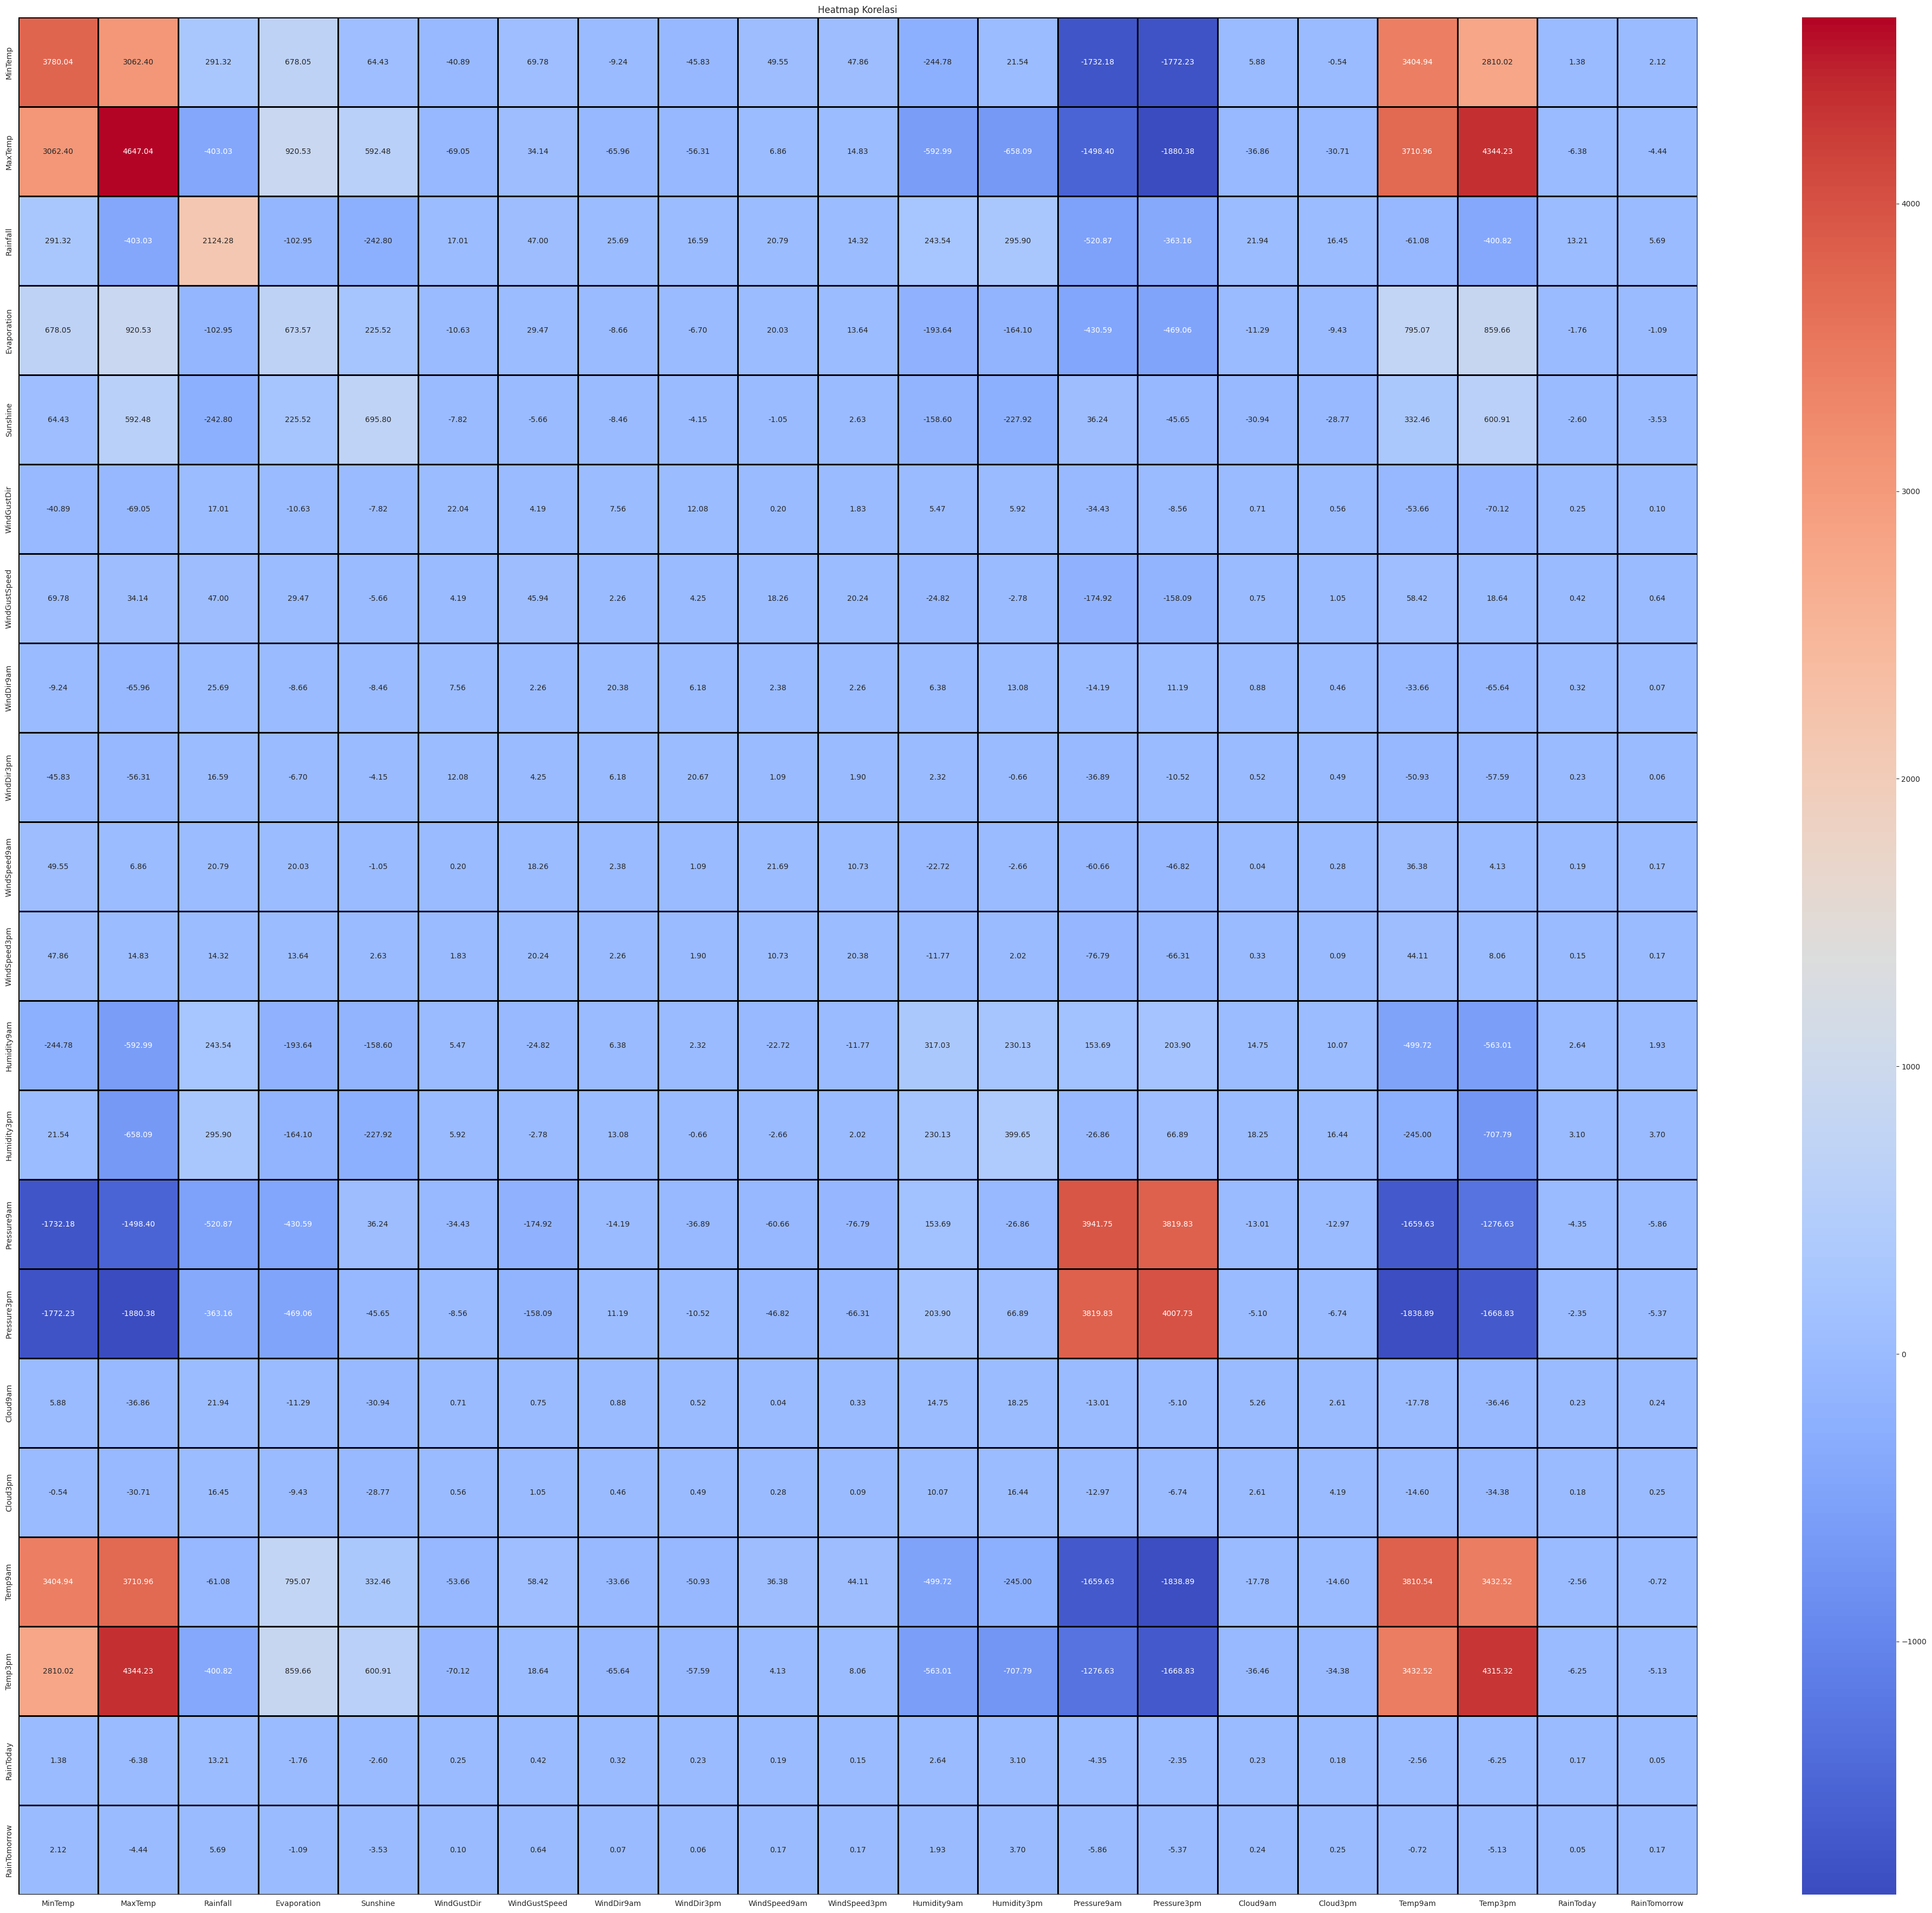

In [53]:
# Membuat Heatmap Correlation attribute

correlation_matrix = df_strategy.cov()

sns.set_style("whitegrid")

plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=1, linecolor='black')

plt.title("Heatmap Korelasi")
plt.show()

1. Heatmap diatas untuk memvisualisasikan matriks kovarian. Warna yang lebih terang atau lebih gelap dalam heatmap mengindikasikan tingkat kovarian yang berbeda antara pasangan atribut.
2. Berbeda dengan heatmap sebelumnya, sekarang dapat terlihat lebih jelas atribut-atribut yang memang memiliki kovarian df_strategy.

Visualisasi ini membantu kami memahami hubungan linier antara atribut dalam dataset. Ini dapat digunakan untuk mengevaluasi apakah ada hubungan positif atau negatif antara atribut dan dapat memengaruhi keputusan pemilihan atribut atau model analisis lebih lanjut.

### F.2.5 train_test_split() 

In [54]:
# Pisahkan atribut prediktor (x) dan target (y)

x_strategy = df_strategy.drop(columns=['RainTomorrow'])
y_strategy = df_strategy['RainTomorrow']

In [55]:
# Train-test split 80% train dan 20% Test

x_train_strategy, x_test_strategy, y_train_strategy, y_test_strategy = train_test_split(
    x_strategy, y_strategy, test_size=0.2)

### F.2.6 Smote()

In [56]:
smote = SMOTE()
x_train_strategy, y_train_strategy = smote.fit_resample(
    x_train_strategy, y_train_strategy)

### F.2.7 StandardScaler()

In [57]:
# Standarisasi atribut prediktor (x)

scaler = StandardScaler()
x_train_strategy = scaler.fit_transform(x_train_strategy)
x_test_strategy = scaler.transform(x_test_strategy)

In [58]:
print('x train (baris,kolom) : ', x_train_strategy.shape)
print('x test  (baris,kolom) : ', x_test_strategy.shape)
print('\ny train (baris,kolom) : ', y_train_strategy.shape)
print('y test  (baris,kolom) : ', y_test_strategy.shape)

x train (baris,kolom) :  (176628, 20)
x test  (baris,kolom) :  (28439, 20)

y train (baris,kolom) :  (176628,)
y test  (baris,kolom) :  (28439,)


# G. Model Definition & Training Model

Pada dataset weatherUAS.csv dengan  Logistic Regression dan Support Vector Machine untuk kasus classification dengan manfaatkan pada kondisi ketika semua requirement attribut diperlukan untuk memenuhi atribut target yakni RainTomorrow yang berisi output yes dan no.

**Logistic Regression** menggunakan persamaan linier dengan sigmoid function. Yakni fungsi matematika yang memiliki karakteristik kurva berbentuk S.
Adapun beberapa tipe model pada Logistic Regression seperti :
1. **Binary Logistic Regression** : Variabel dependen hanya memiliki dua output misal yes/no, 1/0, dan  Male/Female.
2. **Multinomial Logistic Regression** : Variabel dependen memiliki dua atau lebih tanpa urutan output misal Good,Great dan Bad.
3. **Ordinal Logistic Regression** : Variabel dependen memiliki dua atau lebih dengan urutan output misal rating makanan 1 sampai 5 bintang.

**Support Vector Machine** merupakan salah satu model classification dan menghasilkan hyperplane optiomal secara berulang untuk meminimalkan kesalahan. Tujuannya untuk memilih hyperplane dengan kemungkinan margin maksimum antara support vector dalam dataset yang diberikan. 
SVM mmeiliki bebera kernel untuk membuat klasifikasi yang lebih akurat yakni :
1. **Kernel Linear** kernel ini dapat digunakan untuk mencari dot product antara dua pengamatan, yang menghasilkan hasil perkalian dari setiap pasangan nilai masukan.
2. **Kernel Polynomial** mirip dengan kernel linear, kernel ini dapat memodelkan ruang masukan yang lengkung atau nonlinier.
3. **Kernel Radial Basis Function** kernel ini memetakan ruang masukan ke dalam ruang dimensi tak terhingga, yang memungkinkan pemetaan yang lebih kompleks dan akurat.

Adapun pada model **Logistic Regression** pada Final Project 2 ini kami menggunakan model ber tipe **Binary Logistic Regression** dikarenakan hanya memiliki output yes dan no yang tidak memiliki urutan tertentu. Serta pada model **Support Vector Machine** kami memilih menggunakan **Kernel Linear**

**DF_CLEAR**
Intercept adalah nilai konstan yang ditambahkan ke prediksi model Logistic Regression. Ini mewakili titik awal pada garis logistik yang menggambarkan hubungan antara fitur-fitur dan log-odds kelas target.

Slope adalah koefisien yang mengukur seberapa besar pengaruh setiap fitur terhadap prediksi dalam model Logistic Regression. Nilainya menunjukkan pengaruh relatif dari masing-masing fitur terhadap probabilitas prediksi kelas target.

Kesimpulannya,

Intercept = nilai awal dalam model,
Slope = pengaruh setiap fitur terhadap prediksi.


Intercept dalam SVM adalah nilai konstan yang menggeser posisi garis pemisah (hyperplane) dari titik nol.
Slope dalam SVM (kernel linear) adalah vektor koefisien yang menentukan kemiringan dan orientasi dari hyperplane pemisah data.
Kesimpulannya dalam SVM,

Intercept = mengatur pergeseran garis pemisah,
Slope = menentukan orientasi dan kemiringan hyperplane yang memisahkan kelas data.

**DF_STRATEGY**
Intercept dalam Logistic Regression adalah nilai konstan yang ditambahkan ke prediksi model. Ini menentukan titik awal pada garis logistik.
Slope dalam Logistic Regression adalah koefisien yang menunjukkan seberapa besar pengaruh setiap fitur terhadap prediksi kelas target. Koefisien ini menggambarkan pengaruh relatif masing-masing fitur.

Intercept dalam SVM (kernel linear) adalah nilai konstan yang menggeser posisi hyperplane dari titik nol untuk memisahkan kelas data.
Slope dalam SVM (kernel linear) adalah vektor koefisien yang menentukan orientasi dan kemiringan hyperplane pemisah. Koefisien ini berkaitan dengan setiap fitur dalam ruang fitur.

## G.1 df_clear

### G.1.2 Logistic Regression

In [59]:
df_clear_Logistic_Regression = LogisticRegression(
    random_state=0).fit(x_train, y_train)


# Akurasi df_clear pada Logistic Regression


print('Akurasi  df_clear pada Logistic Regression : ', accuracy_score(
    y_test, df_clear_Logistic_Regression.predict(x_test)))

Akurasi  df_clear pada Logistic Regression :  0.8067174760723148


In [60]:
print('Intercept : ', df_clear_Logistic_Regression.intercept_)
print('Slope     : ', df_clear_Logistic_Regression.coef_)

Intercept :  [0.11103436]
Slope     :  [[-0.04785363 -0.17467039  0.31823072 -0.15770369 -0.83971881  0.08602406
   0.96798307 -0.09207156 -0.05884945 -0.23625976 -0.29978706 -0.04986719
   1.22911879  0.86166751 -1.37118312 -0.26610593  0.16489949  0.08748833
   0.22872129 -0.03152211]]


### G.1.2 Support Vector Machine

In [61]:
df_clear_Support_Vector_Machine = SVC(random_state=0,
                                      kernel='linear',).fit(x_train, y_train)

# Akurasi df_clear pada Support Vector Machine
print('Akurasi df_clear pada Support Vector Machine : ', accuracy_score(
    y_test, df_clear_Support_Vector_Machine.predict(x_test)))

Akurasi df_clear pada Support Vector Machine :  0.8039702233250621


In [62]:
print('Intercept : ', df_clear_Support_Vector_Machine.intercept_)
print('Slope     : ', df_clear_Support_Vector_Machine.coef_)

Intercept :  [0.11197626]
Slope     :  [[-0.08671871 -0.15799956  0.25963482 -0.10712183 -0.67653798  0.06782805
   0.78253046 -0.0703356  -0.03600274 -0.18245054 -0.25951486 -0.02223151
   0.86582665  0.62386354 -0.98682411 -0.20427562  0.10527376  0.08449891
   0.23130044 -0.02487188]]


## G.2 df_strategy

### G.2.1 Logistic Regression

In [63]:
df_strategy_Logistic_Regression = LogisticRegression(random_state=0).fit(
    x_train_strategy, y_train_strategy)

# Akurasi df_strategy pada Logistic Regression
print('Akurasi df_strategy pada Logistic Regression : ', accuracy_score(
    y_test_strategy, df_strategy_Logistic_Regression.predict(x_test_strategy)))

Akurasi df_strategy pada Logistic Regression :  0.7881782059847393


In [64]:
print('Intercept : ', df_strategy_Logistic_Regression.intercept_)
print('Slope     : ', df_strategy_Logistic_Regression.coef_)

Intercept :  [0.08043159]
Slope     :  [[ 0.19902921 -0.46823748  0.25443491 -0.03098881 -0.43170808  0.02039849
   0.80949994 -0.09800345 -0.04837767 -0.17042596 -0.28035555  0.0641083
   1.14299815  0.81106239 -1.2926119  -0.10235826  0.16014058  0.0353322
   0.189408    0.02377578]]


### G.2.2 Support Vector Machine

In [65]:
df_strategy_Support_Vector_Machine = SVC(random_state=0,
                                         kernel='linear').fit(
    x_train_strategy, y_train_strategy)

# Akurasi df_strategy pada Support Vector Machine
print('Akurasi df_strategy pada Support Vector Machine : ', accuracy_score(
    y_test_strategy, df_strategy_Logistic_Regression.predict(x_test_strategy)))

Akurasi df_strategy pada Support Vector Machine :  0.7881782059847393


In [66]:
print('Intercept : ', df_strategy_Support_Vector_Machine.intercept_)
print('Slope     : ', df_strategy_Support_Vector_Machine.coef_)

Intercept :  [0.06941235]
Slope     :  [[ 0.12737737 -0.45097539  0.20117924 -0.01887731 -0.34741187  0.0100192
   0.68446153 -0.07775469 -0.02106799 -0.12435109 -0.2661417   0.04540322
   0.9069466   0.65178979 -1.02639183 -0.08460195  0.12131204  0.01548795
   0.26840483  0.0414742 ]]


# H. Evaluation Model

Di tahap **Evaluasi Model, Logistic Regression dan Support Vector Machine** melibatkan berbagai metrik evaluasi yang mendalam, termasuk :
1. **Accuracy** : Metrik ini mengukur sejauh mana model mampu memprediksi kelas dengan benar secara keseluruhan, yaitu berapa persen prediksi yang benar dari total data.
2. **Precision** : Precision mengukur sejauh mana model mampu mengidentifikasi kelas positif dengan benar. Dalam konteks Logistic Regression, ini mengukur berapa persen prediksi positif yang benar dari semua prediksi positif.
3. **Recall** : Recall (atau Sensitivity) mengukur sejauh mana model mampu menemukan semua instance dari kelas positif yang sebenarnya. Ini mengukur berapa persen instance positif yang ditemukan dari total instance positif yang sebenarnya.
4. **F1-Score** : F1-Score adalah perpaduan dari Precision dan Recall. Ini adalah metrik yang baik untuk digunakan jika kita ingin mencapai keseimbangan antara Precision dan Recall.
5. **ROC (Receiver Operating Characteristic) Curve** : Merupakan grafik yang digunakan untuk mengukur kinerja model pada berbagai threshold pengklasifikasian. Ini membantu kita memahami trade-off antara True Positive Rate (Recall) dan False Positive Rate.
6. **Confusion Matrix** : Confusion Matrix adalah tabel yang menampilkan jumlah True Positive, True Negative, False Positive, dan False Negative. Ini memberikan pandangan yang lebih rinci tentang kinerja model.

Dengan memanfaatkan semua metrik ini, kami berharap dapat dapat melakukan evaluasi yang komprehensif terhadap model yang telah dikembangkan, memahami kemampuan model dalam memprediksi dan mengidentifikasi kelas-kelas target, serta menganalisis tingkat kesalahan dan akurasi model secara keseluruhan.

## H.1 df_clear

### H.1.1 Evaluasi model Logistic Regression

#### H.1.1.1 Accuracy, Precision, Recall, F1-Score

In [67]:
# Evaluasi model x_test


y_pred = df_clear_Logistic_Regression.predict(x_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.6433360588716271
Recall    :  0.7821073558648112
Precision :  0.5463888888888889
Accuracy  :  0.8067174760723148

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      8769
           1       0.55      0.78      0.64      2515

    accuracy                           0.81     11284
   macro avg       0.74      0.80      0.76     11284
weighted avg       0.84      0.81      0.82     11284



In [68]:
# Evaluasi model x_train


y_pred_train = df_clear_Logistic_Regression.predict(x_train)

f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train, y_pred_train))

F1-Score  :  0.801372715132892
Recall    :  0.7922155348625937
Precision :  0.8107440657776228
Accuracy  :  0.8036424029071088

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     35224
           1       0.81      0.79      0.80     35224

    accuracy                           0.80     70448
   macro avg       0.80      0.80      0.80     70448
weighted avg       0.80      0.80      0.80     70448



#### H.1.1.2 Receiver Operating Characteristic (ROC)

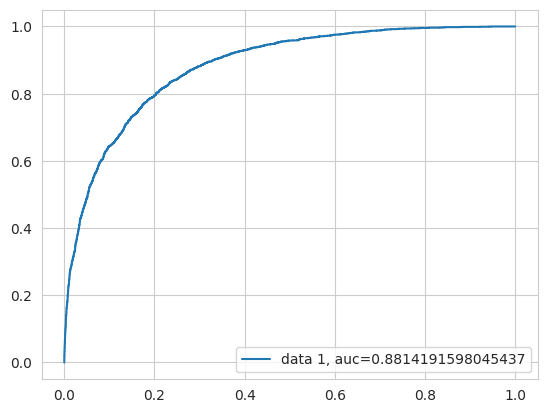

In [69]:
y_pred_proba = df_clear_Logistic_Regression.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Visualisasi kami lakukan pada ROC pada Model Logistic Regression pada dataset df_clear. Model kami mendapat nilai **Area Undert the Curve (AUC)** sebesar **0.88 dengan skala 0 sampai 1** yang berarti model kami memiliki kinerja baik dalam memisahkan kelas-kelas target.

#### H.1.1.3 Confusion Matrix

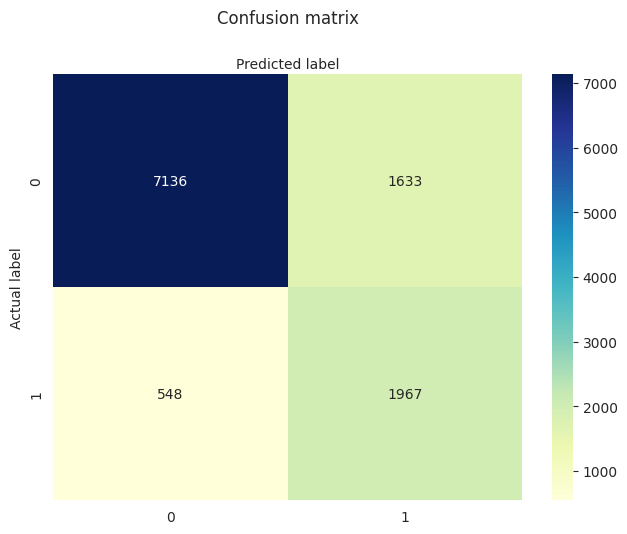

In [70]:
y_pred = df_clear_Logistic_Regression.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Visualisasi diatas merupakan Confusion Matrix yang digunakan untuk mengevaluasi kinerja model Logistic Regression pada dataset df_clear. Dengan membandingkan hasil Predicted label dengan Actual label dan mengukur empat metrik:
1. **True Positive (TP)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa hujan akan terjadi
2. **True Negative (TN)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa tidak akan ada hujan
3. **False Positive (FP)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa hujan akan terjadi.
4. **False Negative (FN)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa tidak akan ada hujan padahal sebenarnya hujan terjadi

Hal ini membantu kami dalam memahami sejauh mana model dapat mengklasifikasikan dengan benar dan salah, dan seberapa baik model dalam membedakan kelas positif dan negatif. Matriks dan nilai-nilai di setiap sel dan digambarkan dengan warna yang berbeda untuk memudahkan interpretasi.

### H.1.2 Evaluasi model Support Vector Machine

#### H.1.2.1 Accuracy, Precision, Recall, F1-Score

In [71]:
# Evaluasi model x_test


y_pred = df_clear_Support_Vector_Machine.predict(x_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.641025641025641
Recall    :  0.7852882703777336
Precision :  0.5415409925966548
Accuracy  :  0.8039702233250621

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      8769
           1       0.54      0.79      0.64      2515

    accuracy                           0.80     11284
   macro avg       0.74      0.80      0.75     11284
weighted avg       0.84      0.80      0.82     11284



In [72]:
# Evaluasi model x_train


y_pred_train = df_clear_Support_Vector_Machine.predict(x_train)

f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train, y_pred_train))

F1-Score  :  0.8016782175382325
Recall    :  0.7947138314785374
Precision :  0.8087657459840518
Accuracy  :  0.8034010901657961

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     35224
           1       0.81      0.79      0.80     35224

    accuracy                           0.80     70448
   macro avg       0.80      0.80      0.80     70448
weighted avg       0.80      0.80      0.80     70448



#### H.1.2.2 Confusion Matrix

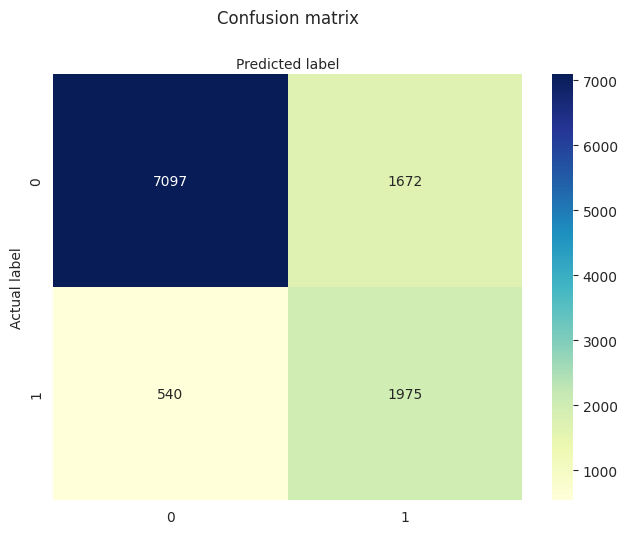

In [73]:
y_pred = df_clear_Support_Vector_Machine.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Visualisasi diatas merupakan Confusion Matrix yang digunakan untuk mengevaluasi kinerja model Support Vector Machine (SVM) pada dataset df_clear. Dengan membandingkan hasil Predicted label dengan Actual label dan mengukur empat metrik:
1. **True Positive (TP)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa hujan akan terjadi
2. **True Negative (TN)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa tidak akan ada hujan
3. **False Positive (FP)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa hujan akan terjadi.
4. **False Negative (FN)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa tidak akan ada hujan padahal sebenarnya hujan terjadi

Hal ini membantu kami dalam memahami sejauh mana model dapat mengklasifikasikan dengan benar dan salah, dan seberapa baik model dalam membedakan kelas positif dan negatif. Matriks dan nilai-nilai di setiap sel dan digambarkan dengan warna yang berbeda untuk memudahkan interpretasi.

## H.2 df_strategy

### H.2.1 Evaluasi model Logistic Regression

#### H.2.1.1 Accuracy, Precision, Recall, F1-Score

In [74]:
# Evaluasi model x_test


y_pred_strategy = df_strategy_Logistic_Regression.predict(x_test_strategy)

f1 = f1_score(y_test_strategy, y_pred_strategy)
recall = recall_score(y_test_strategy, y_pred_strategy)
precision = precision_score(y_test_strategy, y_pred_strategy)
accuracy = accuracy_score(y_test_strategy, y_pred_strategy)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test_strategy, y_pred_strategy))

F1-Score  :  0.6219405045813983
Recall    :  0.7697685257107348
Precision :  0.5217437085395388
Accuracy  :  0.7881782059847393

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     22002
           1       0.52      0.77      0.62      6437

    accuracy                           0.79     28439
   macro avg       0.72      0.78      0.74     28439
weighted avg       0.83      0.79      0.80     28439



In [75]:
# Evaluasi model x_train


y_pred_train_strategy = df_strategy_Logistic_Regression.predict(
    x_train_strategy)

f1_train = f1_score(y_train_strategy, y_pred_train_strategy)
recall_train = recall_score(y_train_strategy, y_pred_train_strategy)
precision_train = precision_score(y_train_strategy, y_pred_train_strategy)
accuracy_train = accuracy_score(y_train_strategy, y_pred_train_strategy)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train_strategy, y_pred_train_strategy))

F1-Score  :  0.7747104224898489
Recall    :  0.7626310664220848
Precision :  0.7871785881252922
Accuracy  :  0.778223158276151

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     88314
           1       0.79      0.76      0.77     88314

    accuracy                           0.78    176628
   macro avg       0.78      0.78      0.78    176628
weighted avg       0.78      0.78      0.78    176628



#### H.2.1.2 Receiver Operating Characteristic (ROC)

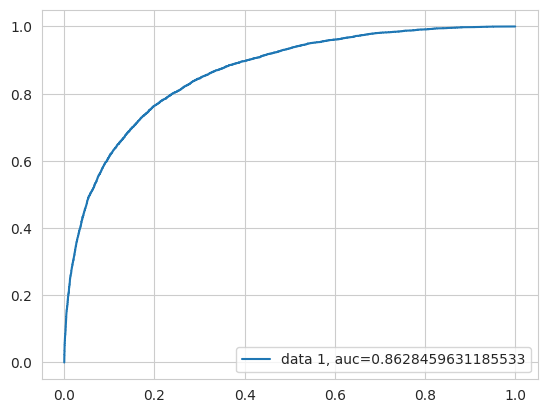

In [76]:
y_pred_proba = df_strategy_Logistic_Regression.predict_proba(x_test_strategy)[
    ::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_strategy,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_strategy, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Visualisasi kami lakukan pada ROC pada Model Logistic Regression pada dataset df_strategy. Model kami mendapat nilai **Area Undert the Curve (AUC)** sebesar **0.86 dengan skala 0 sampai 1** yang berarti model kami memiliki kinerja baik dalam memisahkan kelas-kelas target.

#### H.2.1.3 Confusion Matrix

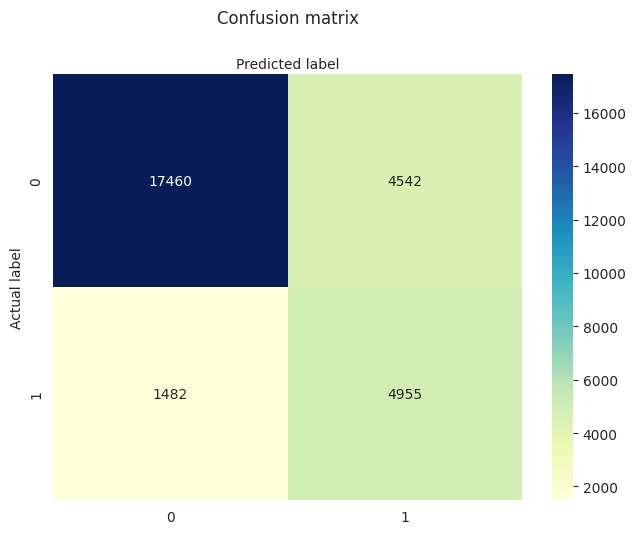

In [77]:
y_pred_strategy = df_strategy_Logistic_Regression.predict(x_test_strategy)

cnf_matrix = metrics.confusion_matrix(y_test_strategy, y_pred_strategy)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Visualisasi diatas merupakan Confusion Matrix yang digunakan untuk mengevaluasi kinerja model Logistic Regression pada dataset df_strategy. Dengan membandingkan hasil Predicted label dengan Actual label dan mengukur empat metrik (kategori positif = 1 dan negatif = 0 :
1. **True Positive (TP)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa hujan akan terjadi
2. **True Negative (TN)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa tidak akan ada hujan
3. **False Positive (FP)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa hujan akan terjadi.
4. **False Negative (FN)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa tidak akan ada hujan padahal sebenarnya hujan terjadi

### H.2.1 Evaluasi model Support Vector Machine

#### H.2.1.1 Accuracy, Precision, Recall, F1-Score

In [78]:
# Evaluasi model x_test


y_pred_strategy = df_strategy_Support_Vector_Machine.predict(x_test_strategy)

f1 = f1_score(y_test_strategy, y_pred_strategy)
recall = recall_score(y_test_strategy, y_pred_strategy)
precision = precision_score(y_test_strategy, y_pred_strategy)
accuracy = accuracy_score(y_test_strategy, y_pred_strategy)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test_strategy, y_pred_strategy))

F1-Score  :  0.623466498899025
Recall    :  0.7697685257107348
Precision :  0.5238951152463523
Accuracy  :  0.7895495622208939

              precision    recall  f1-score   support

           0       0.92      0.80      0.85     22002
           1       0.52      0.77      0.62      6437

    accuracy                           0.79     28439
   macro avg       0.72      0.78      0.74     28439
weighted avg       0.83      0.79      0.80     28439



In [79]:
# Evaluasi model x_train


y_pred_train_strategy = df_strategy_Support_Vector_Machine.predict(
    x_train_strategy)

f1_train = f1_score(y_train_strategy, y_pred_train_strategy)
recall_train = recall_score(y_train_strategy, y_pred_train_strategy)
precision_train = precision_score(y_train_strategy, y_pred_train_strategy)
accuracy_train = accuracy_score(y_train_strategy, y_pred_train_strategy)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train_strategy, y_pred_train_strategy))

F1-Score  :  0.7741385271407167
Recall    :  0.7606042077133863
Precision :  0.7881632365709995
Accuracy  :  0.7780872794800371

              precision    recall  f1-score   support

           0       0.77      0.80      0.78     88314
           1       0.79      0.76      0.77     88314

    accuracy                           0.78    176628
   macro avg       0.78      0.78      0.78    176628
weighted avg       0.78      0.78      0.78    176628



#### H.2.1.2 Confusion Matrix

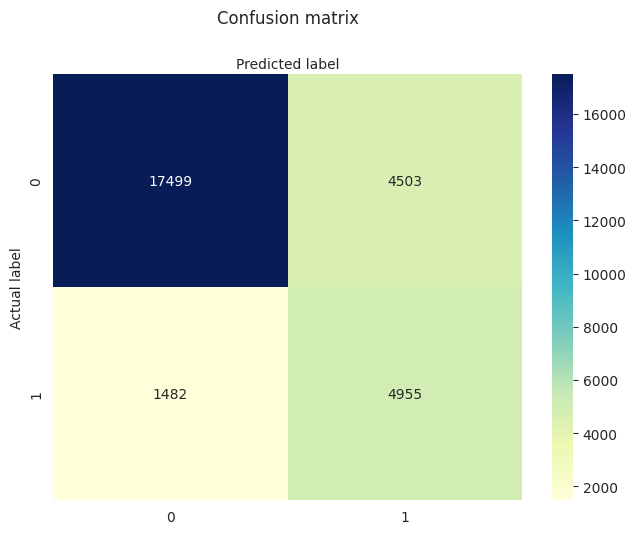

In [80]:
y_pred_strategy = df_strategy_Support_Vector_Machine.predict(x_test_strategy)


cnf_matrix = metrics.confusion_matrix(y_test_strategy, y_pred_strategy)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Visualisasi diatas merupakan Confusion Matrix yang digunakan untuk mengevaluasi kinerja model Support Vector Machine (SVM) pada dataset df_strategy. Dengan membandingkan hasil Predicted label dengan Actual label dan mengukur empat metrik (kategori positif = 1 dan negatif = 0 :

1. **True Positive (TP)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa hujan akan terjadi
2. **True Negative (TN)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa tidak akan ada hujan
3. **False Positive (FP)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa hujan akan terjadi.
4. **False Negative (FN)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa tidak akan ada hujan padahal sebenarnya hujan terjadi

Hal ini membantu kami dalam memahami sejauh mana model dapat mengklasifikasikan dengan benar dan salah, dan seberapa baik model dalam membedakan kelas positif dan negatif. Matriks dan nilai-nilai di setiap sel dan digambarkan dengan warna yang berbeda untuk memudahkan interpretasi.

# I. Model Inference

In [81]:
model_inference = {
    'MinTemp': [95, 136, 90, 33],
    'MaxTemp': [162, 70, 57, 51],
    'Rainfall': [0, 36, 146, 0],
    'Evaporation': [36, 36, 36, 36],
    'Sunshine': [71, 71, 71, 71],
    'WindGustDir': [6, 6, 13, 10],
    'WindGustSpeed': [8, 14, 9, 0],
    'WindDir9am': [2, 5, 15, 0],
    'WindDir3pm': [6, 6, 13, 8],
    'WindSpeed9am': [4, 6, 6, 2],
    'WindSpeed3pm': [5, 12, 8, 2],
    'Humidity9am': [55, 61, 38, 44],
    'Humidity3pm': [17, 69, 23, 32],
    'Pressure9am': [139, 68, 96, 199],
    'Pressure3pm': [97, 43, 134, 188],
    'Cloud9am': [1, 8, 5, 5],
    'Cloud3pm': [4, 7, 4, 4],
    'Temp9am': [84, 101, 74, 34],
    'Temp3pm': [163, 70, 68, 53],
    'RainToday': [0, 1, 1, 0]
}

model_inference = pd.DataFrame(model_inference)
model_inference

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0       95      162         0           36        71            6   
1      136       70        36           36        71            6   
2       90       57       146           36        71           13   
3       33       51         0           36        71           10   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0              8           2           6             4             5   
1             14           5           6             6            12   
2              9          15          13             6             8   
3              0           0           8             2             2   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0           55           17          139           97         1         4   
1           61           69           68           43         8         7   
2           38           23           96          134         5         4   
3           44           32          199          188         5         4   

   Temp9am  Temp3pm  RainToday  
0       84      163          0  
1      101       70          1  
2       74       68          1  
3       34       53          0

## I.1 Test dengan dataset buatan model Logistic Regression pada dataset df_strategy

In [82]:
prediksi_logRes = df_strategy_Logistic_Regression.predict(model_inference)
prediksi_logRes  # RainTomorrow yang seharusnya : 1,1,0,0

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 1, 0, 0])

## I.2 Test dengan dataset buatan model Support Vector Machine pada dataset df_strategy

In [83]:
prediksi_logRes = df_strategy_Support_Vector_Machine.predict(model_inference)
prediksi_logRes  # RainTomorrow yang seharusnya : 1,1,0,0

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 1, 0, 0])

# J. Conclusion

Conclusion yang dapat kami capai mengenai project perbandingan LinearRegression vs SVM ini yaitu :

- Melalui analisis proyek ini menggunakan dataset "weatherAUS.csv" dengan 145.460 entitas dengan 23 atribut yang berpotensi memengaruhi prediksi hujan besok. Terdapat atribut dataset mencakup berbagai data cuaca seperti temperatur, curah hujan, kecepatan angin, kelembaban, tekanan udara, dan lainnya. Atribut "RainTomorrow" adalah variabel target yang akan diprediksi, mengindikasikan apakah akan hujan besok atau tidak.
- Lalu, kami menilai kinerja model machine learning, seperti Logistic Regression dan Support Vector Machine (SVM), dalam prediksi cuaca. Evaluasi model melibatkan metrik akurasi, presisi, recall, F1-Score, kurva ROC, matriks konfusi, serta analisis kinerja model pada data pelatihan dan data pengujian.
- Dan tahap pengujian model memiliki hasil diantaranya :

**Evaluasi Model Logistic Regression:**
- Akurasi Tinggi: Model Logistic Regression pada dataset "df_clear" dan "df_strategy" memiliki akurasi yang tinggi, menunjukkan kemampuannya dalam memprediksi cuaca dengan baik.
- Confusion Matrix: Digunakan untuk menilai sejauh mana model mampu membedakan antara situasi "hujan besok" dan "tidak hujan besok."

**Evaluasi Model Support Vector Machine (SVM):**
- Akurasi Tinggi: Model Support Vector Machine pada dataset "df_clear" dan "df_strategy" juga memiliki akurasi yang tinggi, menunjukkan kemampuannya dalam memprediksi cuaca dengan baik.
- Kurva ROC dan AUC: Digunakan untuk mengukur kemampuan model SVM dalam membedakan antara kelas positif (hujan besok) dan kelas negatif (tidak hujan besok).

**Meskipun** keduanya menunjukkan akurasi yang tinggi, hasil evaluasi menunjukkan bahwa model df_strategy lebih unggul dalam hal akurasi dan kinerja dalam membedakan antara situasi "hujan besok" dan "tidak hujan besok." Mencerminkan bahwa model df_strategy adalah pilihan yang lebih baik dibandingkan dengan df_clear, tetapi memberikan fleksibilitas dengan mempertimbangkan bahwa kedua model masih memiliki kemampuan yang baik dalam memprediksi cuaca. Kesimpulannya, baik model Logistic Regression maupun Support Vector Machine (SVM) dapat digunakan untuk membuat prediksi cuaca yang akurat.

**Model yang kami pilih yaitu, Logistic Regression** dengan alasan, karena hasil akurasinya tidak berbeda secara signifikan maka model Logistic Regression akan menjadi pilihan tepat, karena bersifat praktis dan mudah untuk dikelola dibandingkan dengan SVM yang memakan lebih banyak waktu dalam mengelola maupun menjalankan programnya, sehingga SVM terkesan tidak praktis.

- Proyek ini memberikan pemahaman yang lebih baik tentang bagaimana data dari cuaca diberbagai daerah Australia dapat dimanfaatkan dengan regresi linear maupun SVM untuk meningkatkan manajemen layanan dan pengambilan keputusan yang lebih baik. Dengan pemahaman ini, kami dapat memanfaatkan informasi yang berharga dalam berbagai konteks, seperti perencanaan luar ruangan, pertanian, dan manajemen sumber daya alam.Evaluasi Model Logistic Regression:

# K. Pickle

## K.1 Pickle model Logistic Regression

In [84]:
# filename = 'RainTomorrow_Logistic_Regression.sav'

# # Simpan model Logistic Regression ke dalam file pickle
# with open(filename, 'wb') as file:
#     pickle.dump(df_clear_Logistic_Regression, file)

## K.2 Pickle model Support Vector Machine

In [85]:
# filename = 'RainTomorrow_Support_Vector_Machine.sav'

# # Simpan model Support Vector Machine ke dalam file pickle
# with open(filename, 'wb') as file:
#     pickle.dump(df_clear_Support_Vector_Machine, file)